# Изучение закономерностей, определяющих успешность игр

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


В нашем распоряжении данные до 2016 года. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


### Описание данных:

- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



### Цель исследования:

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Изучение данных из файла

In [1]:
!pip install --upgrade seaborn

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from scipy import stats as st

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# сделаем настройку для удобства и наглядности

# снимем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

# снимем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# игнорируем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# выставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# устанавим стиль графиков
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')
clr = '#8CA0D7'

In [4]:
# загрузим датасет и сохраним его в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [5]:
# выведем 10 случайных строк на экран
data.sample(10)

Name Platform  Year_of_Release  \
885                           FIFA Soccer 09     X360         2,008.00   
5236                        South Park Rally       PS         1,998.00   
7835                        Puyo Puyo Sun 64      N64         1,997.00   
7180        Petz Rescue: Endangered Paradise       DS         2,008.00   
6257               Motocross Maniacs Advance      GBA         2,002.00   
3337                      Dynasty Warriors 8      PS3         2,013.00   
6740   Final Fantasy XI: Chains of Promathia      PS2         2,004.00   
3205                     Angry Birds Trilogy      3DS         2,012.00   
14645                          GTR Evolution       PC         2,008.00   
11919  Game Center CX: Arino no Chousenjou 2       DS         2,009.00   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
885          Sports      0.49      1.26      0.01         0.18         87.00   
5236         Racing      0.20      0.13      0.00         0.02           NaN   
7835         Puzzle      0.00      0.00      0.16         0.03           NaN   
7180      Adventure      0.21      0.00      0.00         0.02           NaN   
6257         Racing      0.20      0.07      0.00         0.00         69.00   
3337         Action      0.12      0.10      0.34         0.05         68.00   
6740   Role-Playing      0.12      0.09      0.00         0.03         77.00   
3205         Action      0.38      0.20      0.00         0.05         62.00   
14645        Racing      0.00      0.02      0.00         0.00         83.00   
11919        Action      0.00      0.00      0.07         0.00           NaN   

      User_Score Rating  
885            8      E  
5236         NaN    NaN  
7835         NaN    NaN  
7180         tbd      E  
6257         tbd      E  
3337         8.5      T  
6740           8      T  
3205         4.6      E  
14645        8.2      E  
11919        NaN    NaN

In [6]:
# изучим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# определим процент пропущенных значений в каждом столбце
data.isna().sum().sort_values(ascending=False) \
    / data.shape[0] * 100

Critic_Score      51.32
Rating            40.48
User_Score        40.09
Year_of_Release    1.61
Name               0.01
Genre              0.01
Platform           0.00
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
dtype: float64

In [8]:
# проверим наличие дубликатов
data.duplicated().sum()

0

In [9]:
# изучим детальнее числовые признаки
data.describe()

Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
count        16,446.00 16,715.00 16,715.00 16,715.00    16,715.00   
mean          2,006.48      0.26      0.15      0.08         0.05   
std               5.88      0.81      0.50      0.31         0.19   
min           1,980.00      0.00      0.00      0.00         0.00   
25%           2,003.00      0.00      0.00      0.00         0.00   
50%           2,007.00      0.08      0.02      0.00         0.01   
75%           2,010.00      0.24      0.11      0.04         0.03   
max           2,016.00     41.36     28.96     10.22        10.57   

       Critic_Score  
count      8,137.00  
mean          68.97  
std           13.94  
min           13.00  
25%           60.00  
50%           71.00  
75%           79.00  
max           98.00

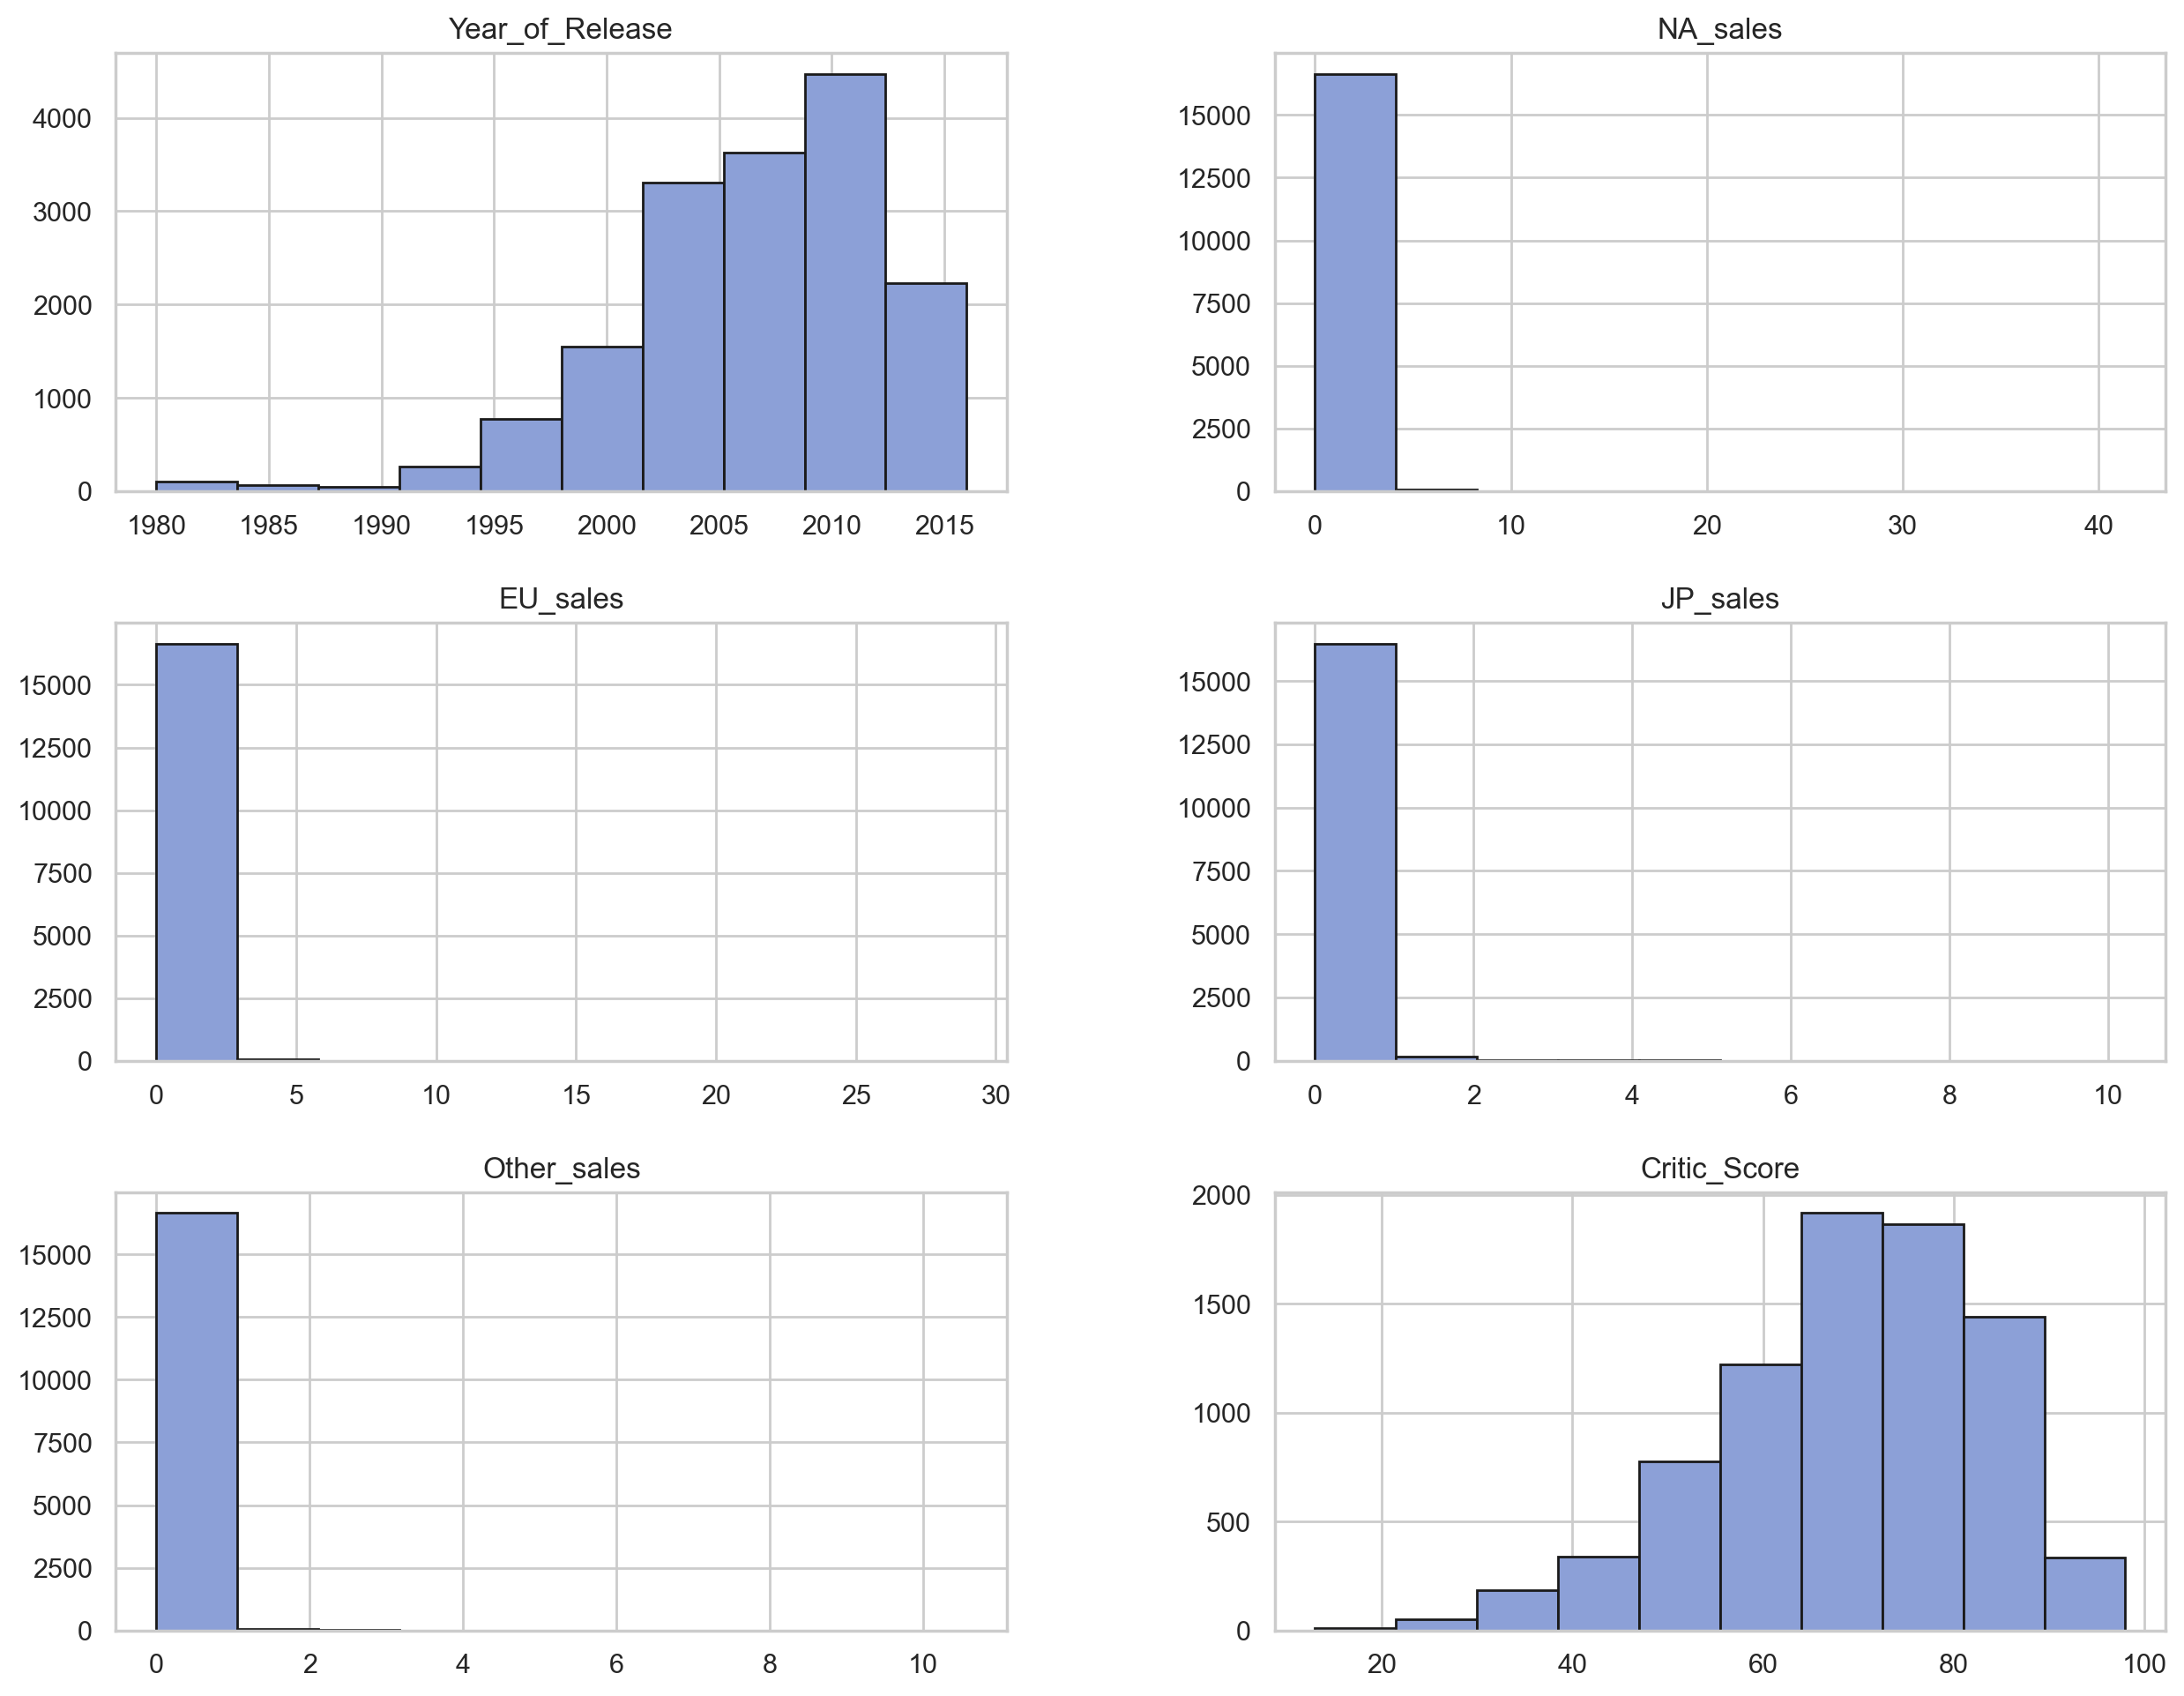

In [10]:
# проверим распределения числовых признаков
data.hist(figsize=(15, 20), layout=(5, 2), color = clr, ec='k')
plt.show()

### Вывод "Изучение данных из файла": 

1. Файл содержит данные по 16715 игр, каждая из которых описывается 11-ю признаками (6 количественных, 4 категориальных и 1 временной). В нашем распоряжении данные с 1980 по 2015 год.

2. Данные требуют дополнительной предобработки. Необходима обработка пропущенных значений, изменение типов некоторых данных, приведение названий признаков к нижнему регистру. 

## Предобработка данных 

На этом этапе:

1. Изменим названия столбцов
2. Преобразуем данные в нужные типы
3. Обработаем пропущенные значения
4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [11]:
# получим названия столбцов
data.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [12]:
# приведем названия к нижнему регистру и проверим результат
data.columns=data.columns.str.lower()
data.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Преобразование типов данных 

Изменим тип данных в столбцах:
- год выпуска - это целое число (заменим float на int);
- оценка пользователей - это вещественное число (заменим object на float);
- оценка критиков - это целое число (заменим float на int).

In [13]:
# убедимся, что год выпуска содержит в себе целые числа
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
# изменим тип данных в столбце year_of_release 
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].dtype

Int64Dtype()

In [15]:
# убедимся, что critic_score содержит в себе целые числа
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
# убедимся, что critic_score содержит в себе целые числа
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
# проверим уникальные значения user_score
data['user_score'].value_counts().head()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: count, dtype: int64

Обратим внимание на аббревиатуру `tbd` (2424 значений). Абревиатура tbd (To Be Determined) означает 'Будет определено'. Это то же самое, что неизвестное значение. Поэтому, можем заменить значение 'tbd' на 'NaN'.

In [18]:
# заменим tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'].value_counts().head()

user_score
7.8    324
8      290
8.2    282
8.3    254
8.5    253
Name: count, dtype: int64

In [19]:
# изменим тип данных в столбце user_score 
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

**Вывод:**

- Тип данных в годе выпуска и оценке критиков заменен с float на int.
- Тип данных в оценке пользователей заменен с object на float. Аббревиатура `tbd` заменена на `NaN`.

### Обработка пропущенных значений

Обработаем пропущенные значения в признаках: год выпуска, оценка пользователей, оценка критиков, рейтинг, жанр игры и название игры.

In [20]:
# еще раз выведем процент пропущенных значений в каждом столбце
data.isna().sum().sort_values(ascending=False) \
    / data.shape[0] * 100

user_score        54.59
critic_score      51.32
rating            40.48
year_of_release    1.61
name               0.01
genre              0.01
platform           0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
dtype: float64

**1. Год выпуска**

Заменим пропущенные значения года выпуска для игр, которые выпускались на других платформах. Оставшиеся пропуски удалим из датафрейма.

In [21]:
# посмотрим строки с пропущенным годом выпуска
data[data['year_of_release'].isna()].head()

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2             <NA>    Sports      4.26   
377            FIFA Soccer 2004      PS2             <NA>    Sports      0.59   
456  LEGO Batman: The Videogame      Wii             <NA>    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2             <NA>  Fighting      1.57   
609              Space Invaders     2600             <NA>   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  
183      0.26      0.01         0.71         94.00        8.50      E  
377      2.36      0.04         0.51         84.00        6.40      E  
456      0.97      0.00         0.29         74.00        7.90   E10+  
475      1.02      0.00         0.41           NaN         NaN    NaN  
609      0.14      0.00         0.03           NaN         NaN    NaN

In [22]:
# проверим, выпускалась ли одна из игр на других платформах
data[data['name'] == 'FIFA Soccer 2004']

name platform  year_of_release   genre  na_sales  eu_sales  \
377    FIFA Soccer 2004      PS2             <NA>  Sports      0.59      2.36   
2606   FIFA Soccer 2004       XB             2003  Sports      0.24      0.49   
12029  FIFA Soccer 2004       GC             2003  Sports      0.05      0.01   
13086  FIFA Soccer 2004      GBA             2003  Sports      0.04      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
377        0.04         0.51         84.00        6.40      E  
2606       0.00         0.05         82.00        8.20      E  
12029      0.00         0.00         83.00        6.20      E  
13086      0.00         0.00         82.00        7.90      E

In [23]:
# заменим пропущенные значения year_of_release для игр, которые выпускались на других платформах 
for i in data[data['year_of_release'].isna() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [24]:
# проверим, сколько пропущенных значений осталось незаполненными
data['year_of_release'].isna().sum()

146

In [25]:
# удалим оставшиеся пропуски с годом выпуска
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'].isna().sum()

0

**2. Название игры**

Наблюдаем всего две строки с пропущенными значениями. Удалим строки с пропусками.

In [26]:
# посмотрим строки с пропущенным названием игр
data[data['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
656    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14127  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
656           0.08           NaN         NaN    NaN  
14127         0.00           NaN         NaN    NaN

In [27]:
# удалим пропуски с названием игр
data = data.dropna(subset=['name']).reset_index(drop=True)
data['name'].isna().sum()

0

**3. Оценка пользователей и оценка критиков**

Пропущенные значения наблюдаем в различных годах выпуска игр. Вероятно, критики ставили оценки далеко не всем играм. То же самое справедливо и для пользователей. Кроме этого, данные не за полный 2016 год, там логично наблюдать пустые значения. Пропущенные значения оставим без изменений.

In [28]:
# посмотрим строки с пропущенной оценкой критиков
data[data['critic_score'].isna()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN

In [29]:
# посмотрим, как пропущенные значения распределились по годам выпуска
data[data['critic_score'].isna()].groupby('year_of_release')['year_of_release'].count().sort_values(ascending=False).head(10)

year_of_release
2009    777
2010    760
2008    715
2011    646
2007    506
2006    388
2015    381
1998    351
2012    334
2014    320
Name: year_of_release, dtype: Int64

In [30]:
# посмотрим строки с пропущенной оценкой пользователей
data[data['user_score'].isna()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN

In [31]:
# посмотрим, как пропущенные значения распределились по годам выпуска
data[data['user_score'].isna()].groupby('year_of_release')['year_of_release'].count().sort_values(ascending=False).head(10)

year_of_release
2009    815
2010    795
2008    772
2011    645
2007    569
2006    458
2002    369
2005    358
1998    348
2012    317
Name: year_of_release, dtype: Int64

**4. Рейтинг**

Крупнейшая негосударственная организация (ESRB), присуждающая рейтинги играм была основана в 1994 году. Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг. Организация присуждает рейтинг для игр в США и Канаде, поэтому наличие пропусков здесь логически обосновано. Заменим пропущенные значения на "undefined" (Не определено).

In [32]:
# посмотрим строки с пропущенным рейтингом
data[data['rating'].isna()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN

In [33]:
# заменим пропущенные значения рейтинга на "undefined"
data = data.assign(rating = data['rating'].fillna('undefined'))

**Вывод:**

- Пропуски в годе выпуска заменены значением года выпуска для игр, которые выпускались на других платформах. Оставшиеся пропуски удалены из датафрейма.

- Строки с пропусками в названии игры удалены.

- Пропущенные значения оценок пользователей и критиков оставлены без изменений.

- Пропуски в рейтинге заменены на "undefined" (Не определено).

### Определение суммарных продаж игр во всех регионах 

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [34]:
# посчитаем суммарные продажи
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)
data.sample(5)

name platform  year_of_release  \
15287                    Fallout Trilogy       PC             2004   
12190                   World Poker Tour       XB             2005   
12983  Hysteria Hospital: Emergency Ward      Wii             2009   
13673                           Terraria     XOne             2014   
11950         BlazBlue: Chrono Phantasma      PSV             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
15287  Role-Playing      0.00      0.02      0.00         0.00           NaN   
12190          Misc      0.05      0.01      0.00         0.00         63.00   
12983        Action      0.05      0.00      0.00         0.00         53.00   
13673        Action      0.00      0.04      0.00         0.00         84.00   
11950      Fighting      0.03      0.00      0.03         0.01           NaN   

       user_score rating  total_sales  
15287        8.90      M         0.02  
12190        7.80      T         0.06  
12983         NaN      E         0.05  
13673        7.70      T         0.04  
11950        7.80      T         0.07

**Вывод:**

- В данные добавлен признак с суммарными продажами игр во всех регионах.

### Вывод по шагу "Предобработка данных"

1. Данные требовали дополнительной предобработки. Обработаны пропущенные значения, изменены названия столбцов и изменены типы некоторых данных. 

2. Пропущенные значения рейтинга организации ESRB заменены на "undefined". Обработаны пропущенные значения в столбце с годом выпуска. Что касается остальных пропусков, для их заполнения у нас недостаточно данных, поэтому пропуски оставлены без изменений.

3. Добавлен новый признак с суммарными продажами во всех регионах.

## Исследовательский анализ данных 

На этом этапе:

1. Определим, сколько игр выпускалось в разные годы.
2. Посмотрим, как менялись продажи по платформам.
3. Определим актуальный период для построения прогноза на 2017 год.
4. Выявим потенциально прибыльные платформы.
5. Оценим влияние на продажи отзывов пользователей и критиков.
6. Оценим общее распределение игр по жанрам.

### Анализ количества выпущенных игр по годам

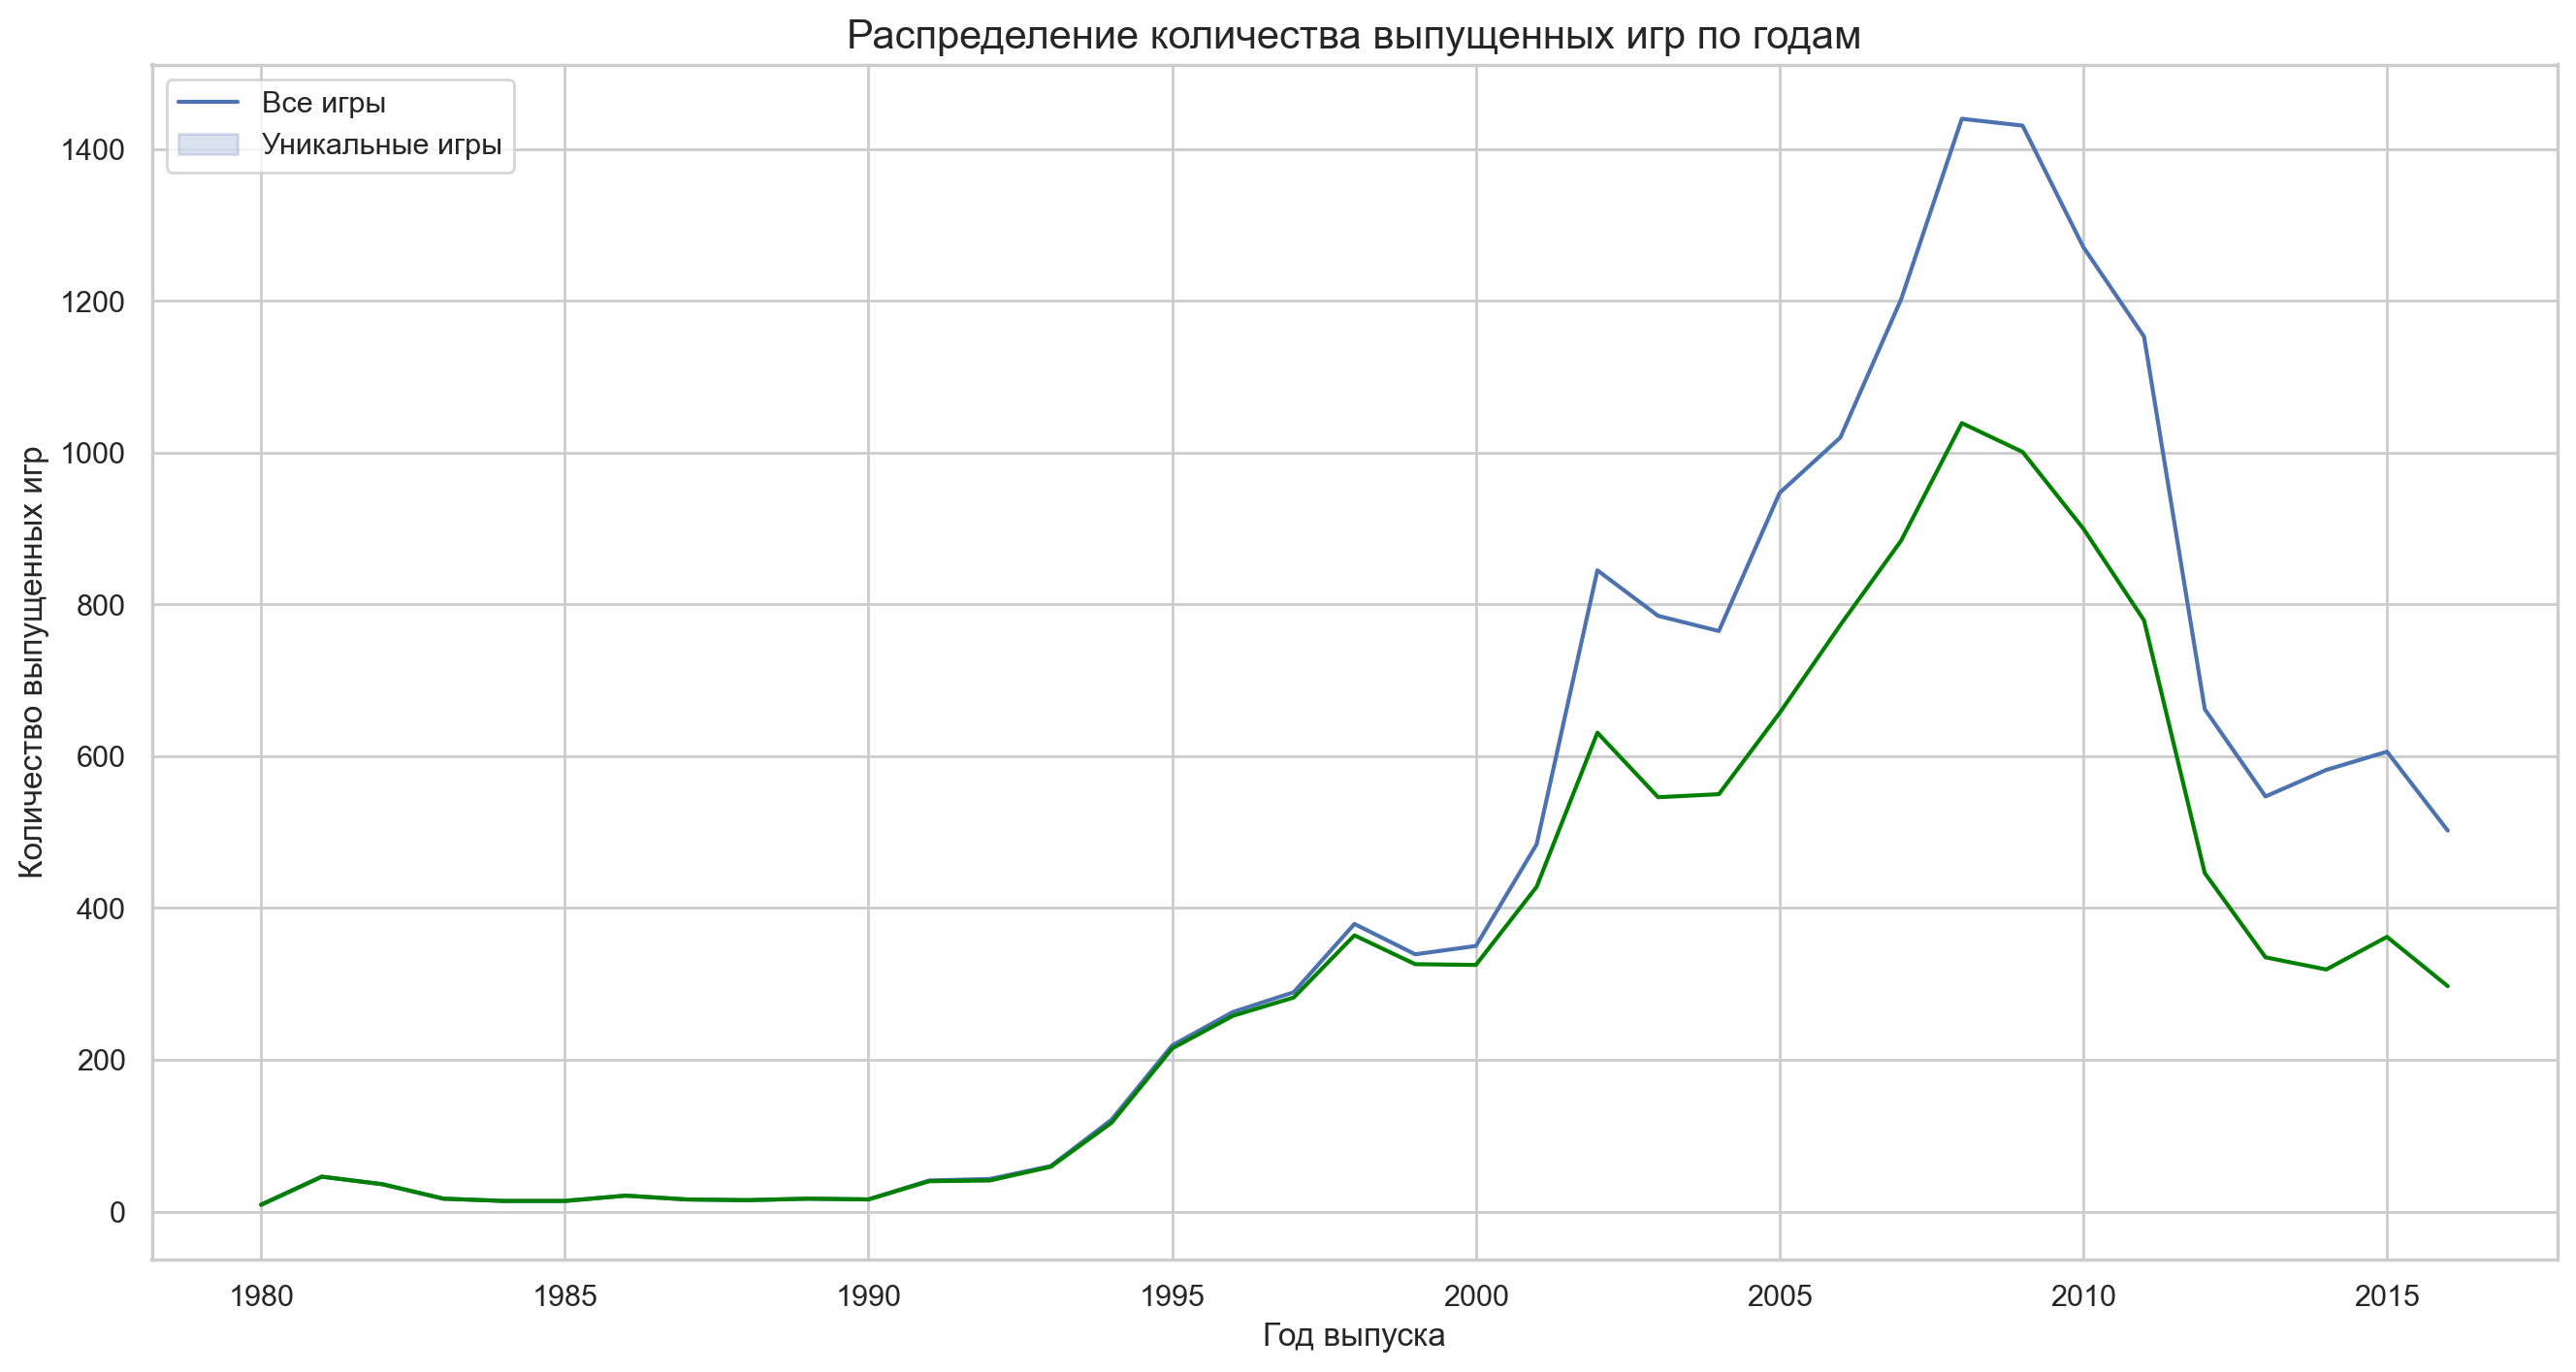

In [38]:
# построим график распределения всех игр и уникальных игр по годам
plt.figure(figsize=(16, 8))

# график распределения всех игр
sns.lineplot(data.pivot_table(index='year_of_release', values='name', aggfunc='count'), 
    color=clr)

# график распределения уникальных игр
unique_games_df = data.groupby(['year_of_release', 'name']).genre.count().reset_index().rename_axis(None, axis=1)
number_of_unique_games = unique_games_df.groupby('year_of_release').name.nunique()
sns.lineplot(
    x=number_of_unique_games.index, 
    y=number_of_unique_games.values, 
    color='green'
)

# добавим заголовок и подписи осей
plt.title("Распределение количества выпущенных игр по годам", fontsize=15)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество выпущенных игр", fontsize=12)

# добавим легенду
plt.legend(loc='upper left', labels=['Все игры', 'Уникальные игры'])

plt.show()

**Вывод:**

- Из графиков видно, что до 1993 года количество игр было малым. Это может быть связано с тем, что мощности ОС не позволяли придумывать много игр и компьютеры были далеко не у всех. 
- Количество выпущенных игр начинает расти в 90-е годы. С начала 2000-х наблюдается резкий рост, который достигает максимума в 2008 году. Именно в этот период началось развитие компьютеров.
- С 2008 года наблюдаем спад выпуска консольных игр. Это можно объяснить появлением мобильных платформ iOS и Android, что послужило частичной смене акцентов в пользу мобильных приложений и мобильных игр.

### Оценка изменений продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?".

In [39]:
# посчитаем общее количество продаж для каждой платформы
sales_by_platform = data.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

sales_by_platform.head()

platform  total_sales
0      PS2     1,247.16
1     X360       966.61
2      PS3       935.19
3      Wii       903.31
4       DS       804.28

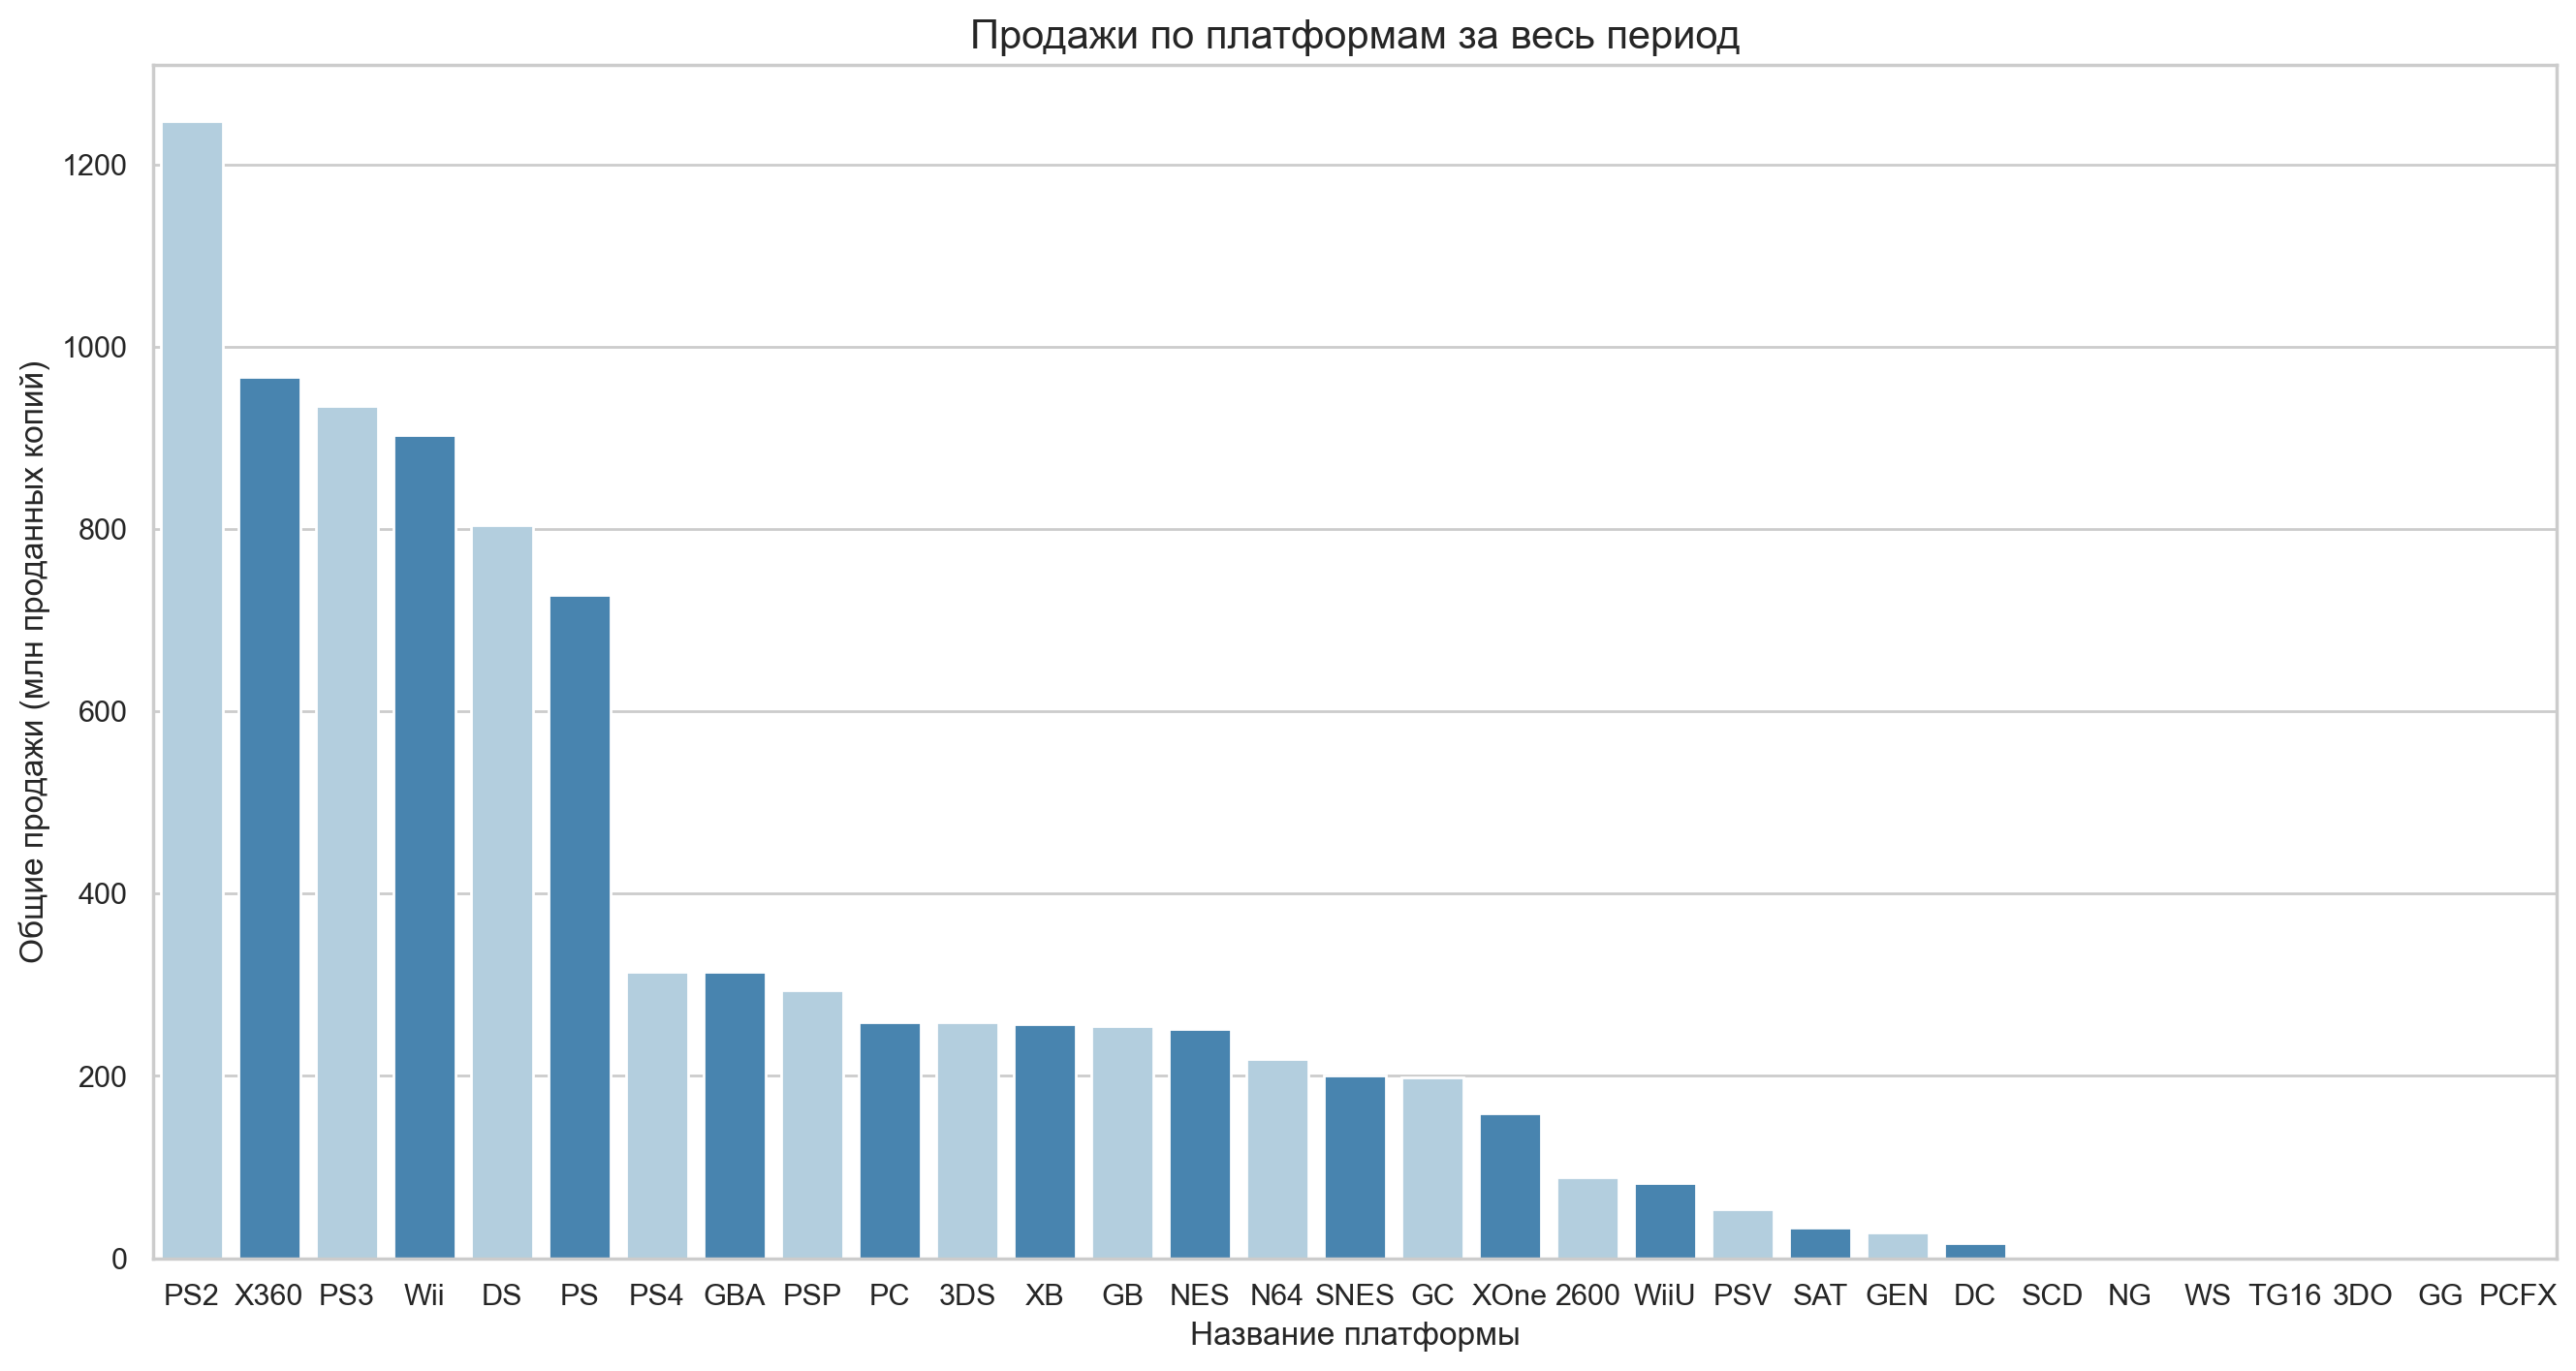

In [40]:
# построим распределение
plt.figure(figsize=(16, 8))
sns.barplot(x=sales_by_platform['platform'], y=sales_by_platform['total_sales'], palette = 
            sns.color_palette('Blues', 2))

# добавим заголовок и подписи осей
plt.title("Продажи по платформам за весь период", fontsize=15)
plt.xlabel("Название платформы", fontsize=12)
plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)

plt.show()

Из графика видим, что самыми популярными платформами являются: PS2, X360, PS3, Wii, DS и PS. Именно эти платформы будем использовать для дальнейшего анализа.

In [41]:
# создадим список самых популярных платформ
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

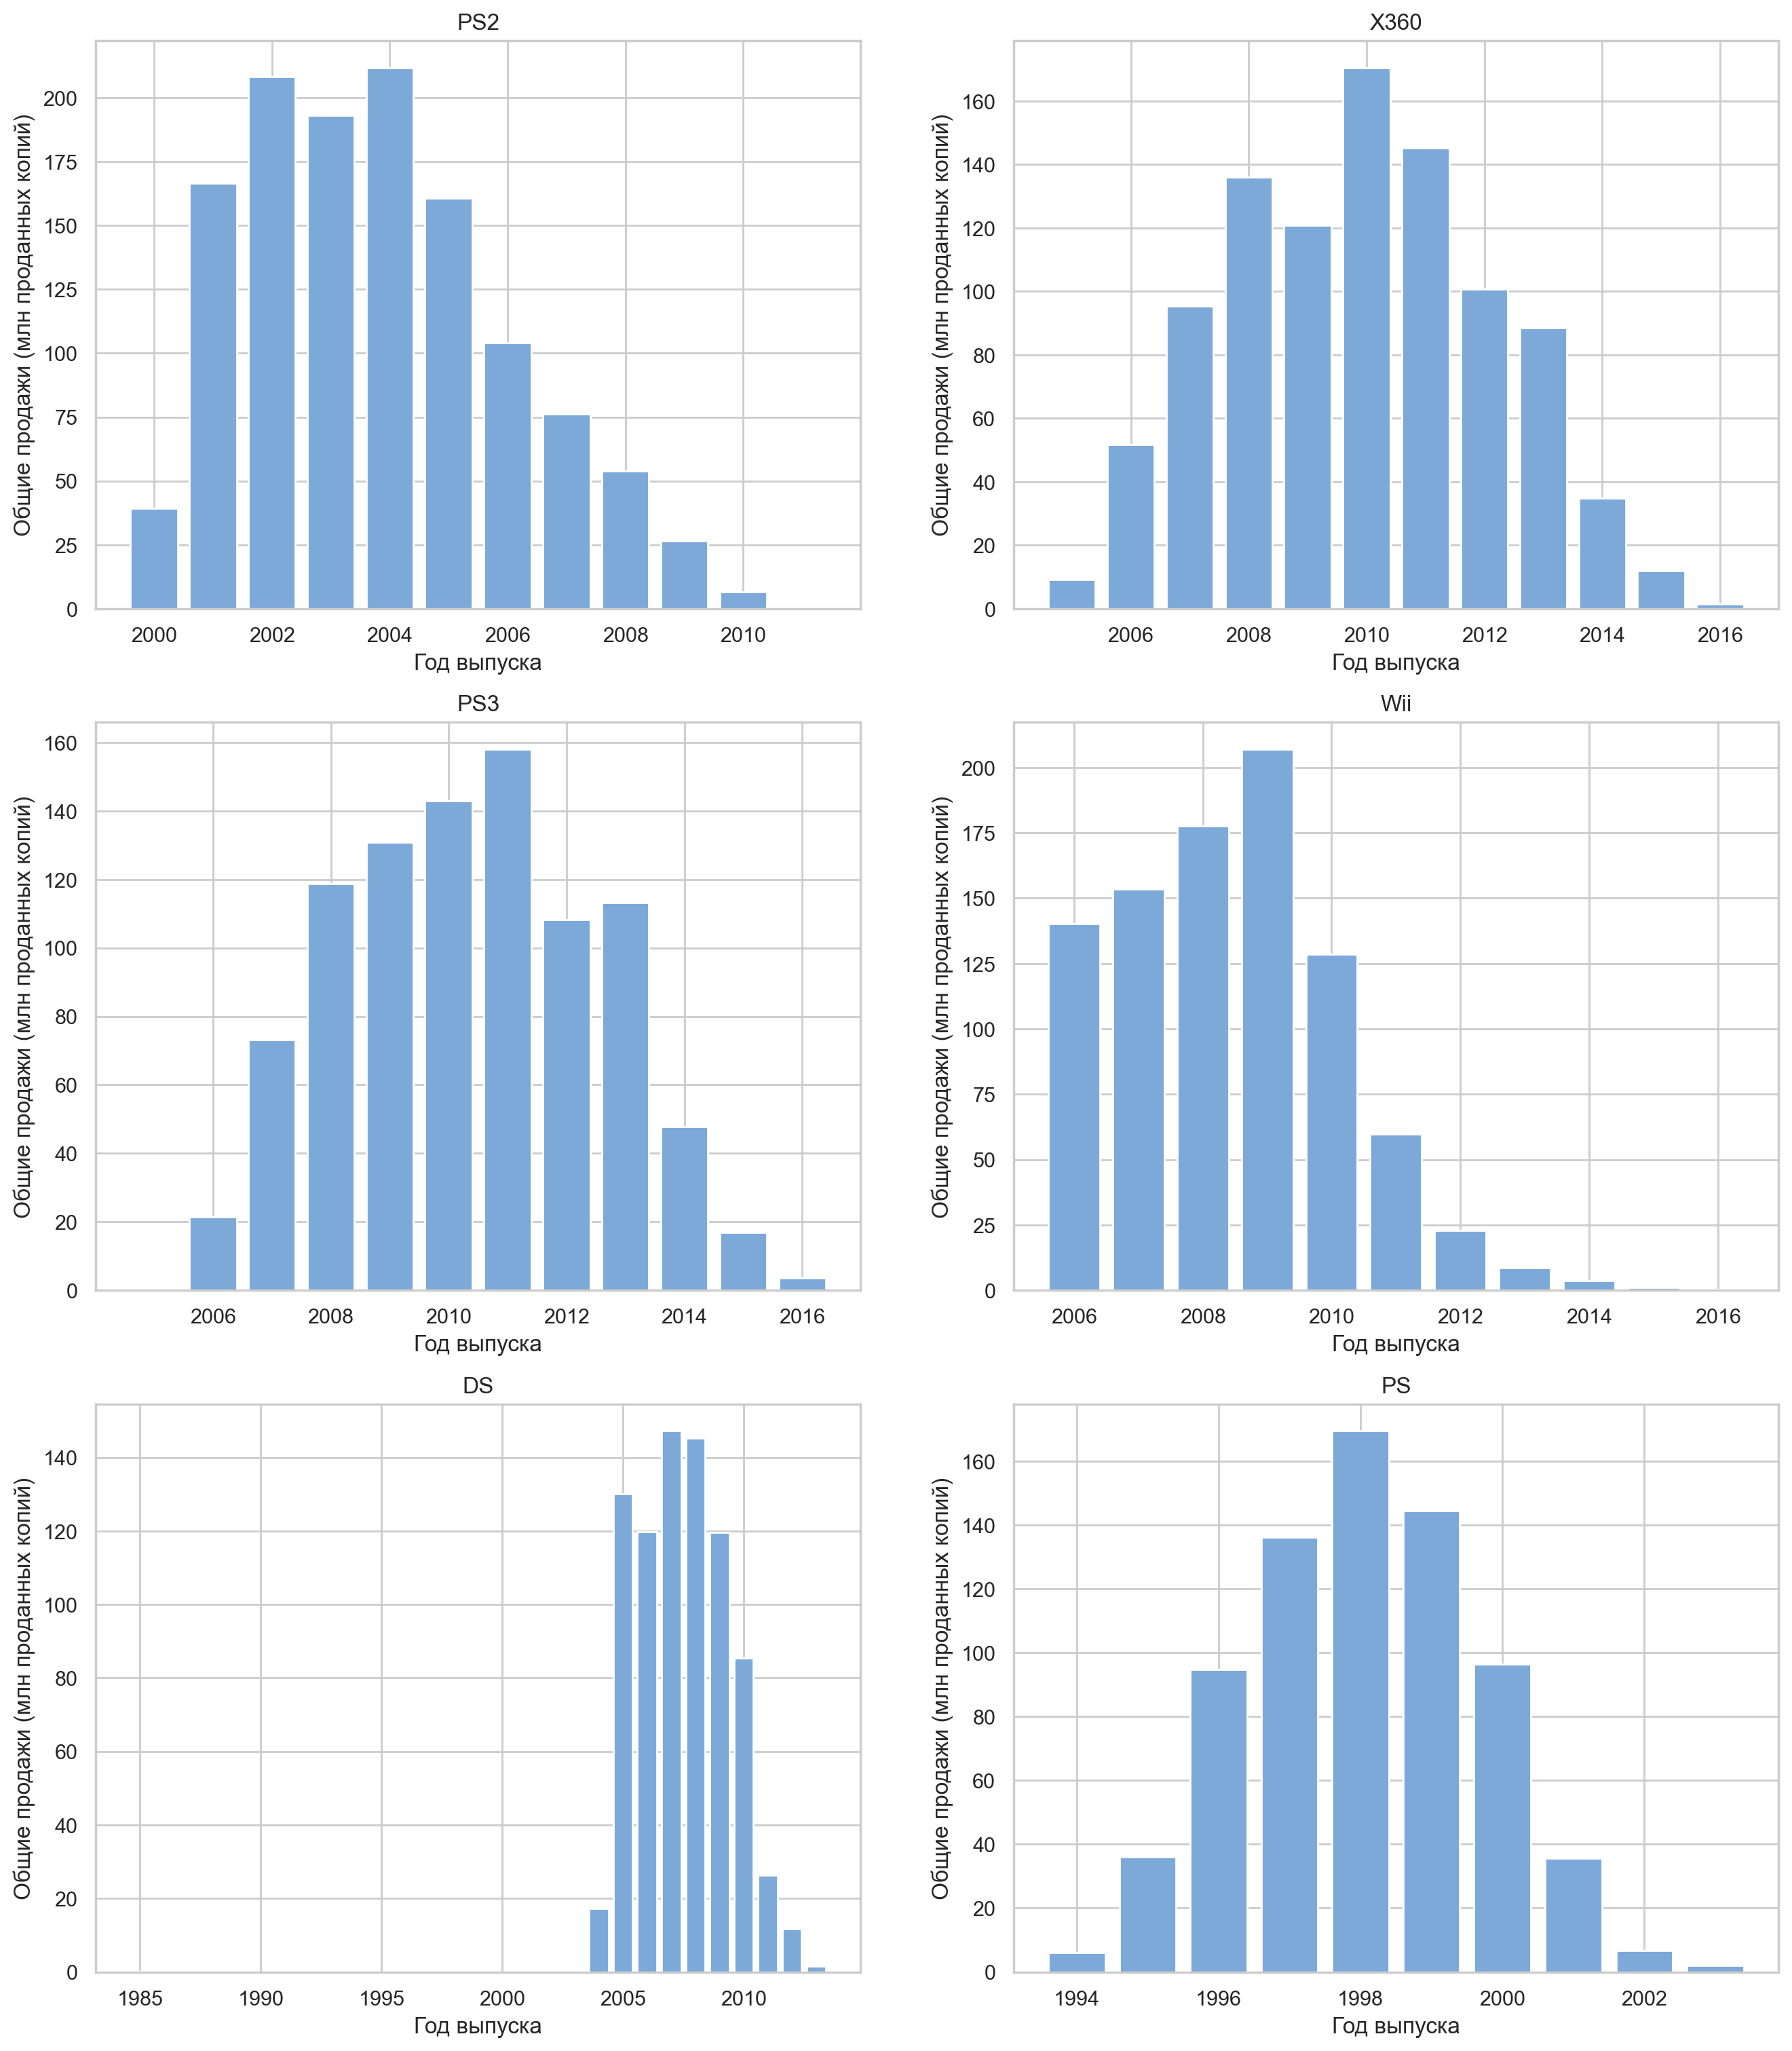

In [42]:
# для каждой платформы построим распределение по годам
plt.figure(figsize=(16, 25))
for i, platform in enumerate(top_platforms):
    plt.subplot(4, 2, i+1)
    data_platform = data[data['platform'] == platform]
    sales_by_year = data_platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.bar(x=sales_by_year.index, height=sales_by_year['total_sales'], color='#7ca9d8')
    plt.title(platform)
    plt.xlabel("Год выпуска")
    plt.ylabel("Общие продажи (млн проданных копий)")
plt.show()

**Вывод:**

- Из распределений видим, что игровые платформы существуют в среднем 10 лет;
- 6 лидирующих по продажам платформ к 2016 году потеряли свою актуальность;
- В среднем пика продаж каждая платформа достигает через 5 лет, после чего продажи начинают падать.

### Определение актуального периода для построения прогноза на 2017 год

Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

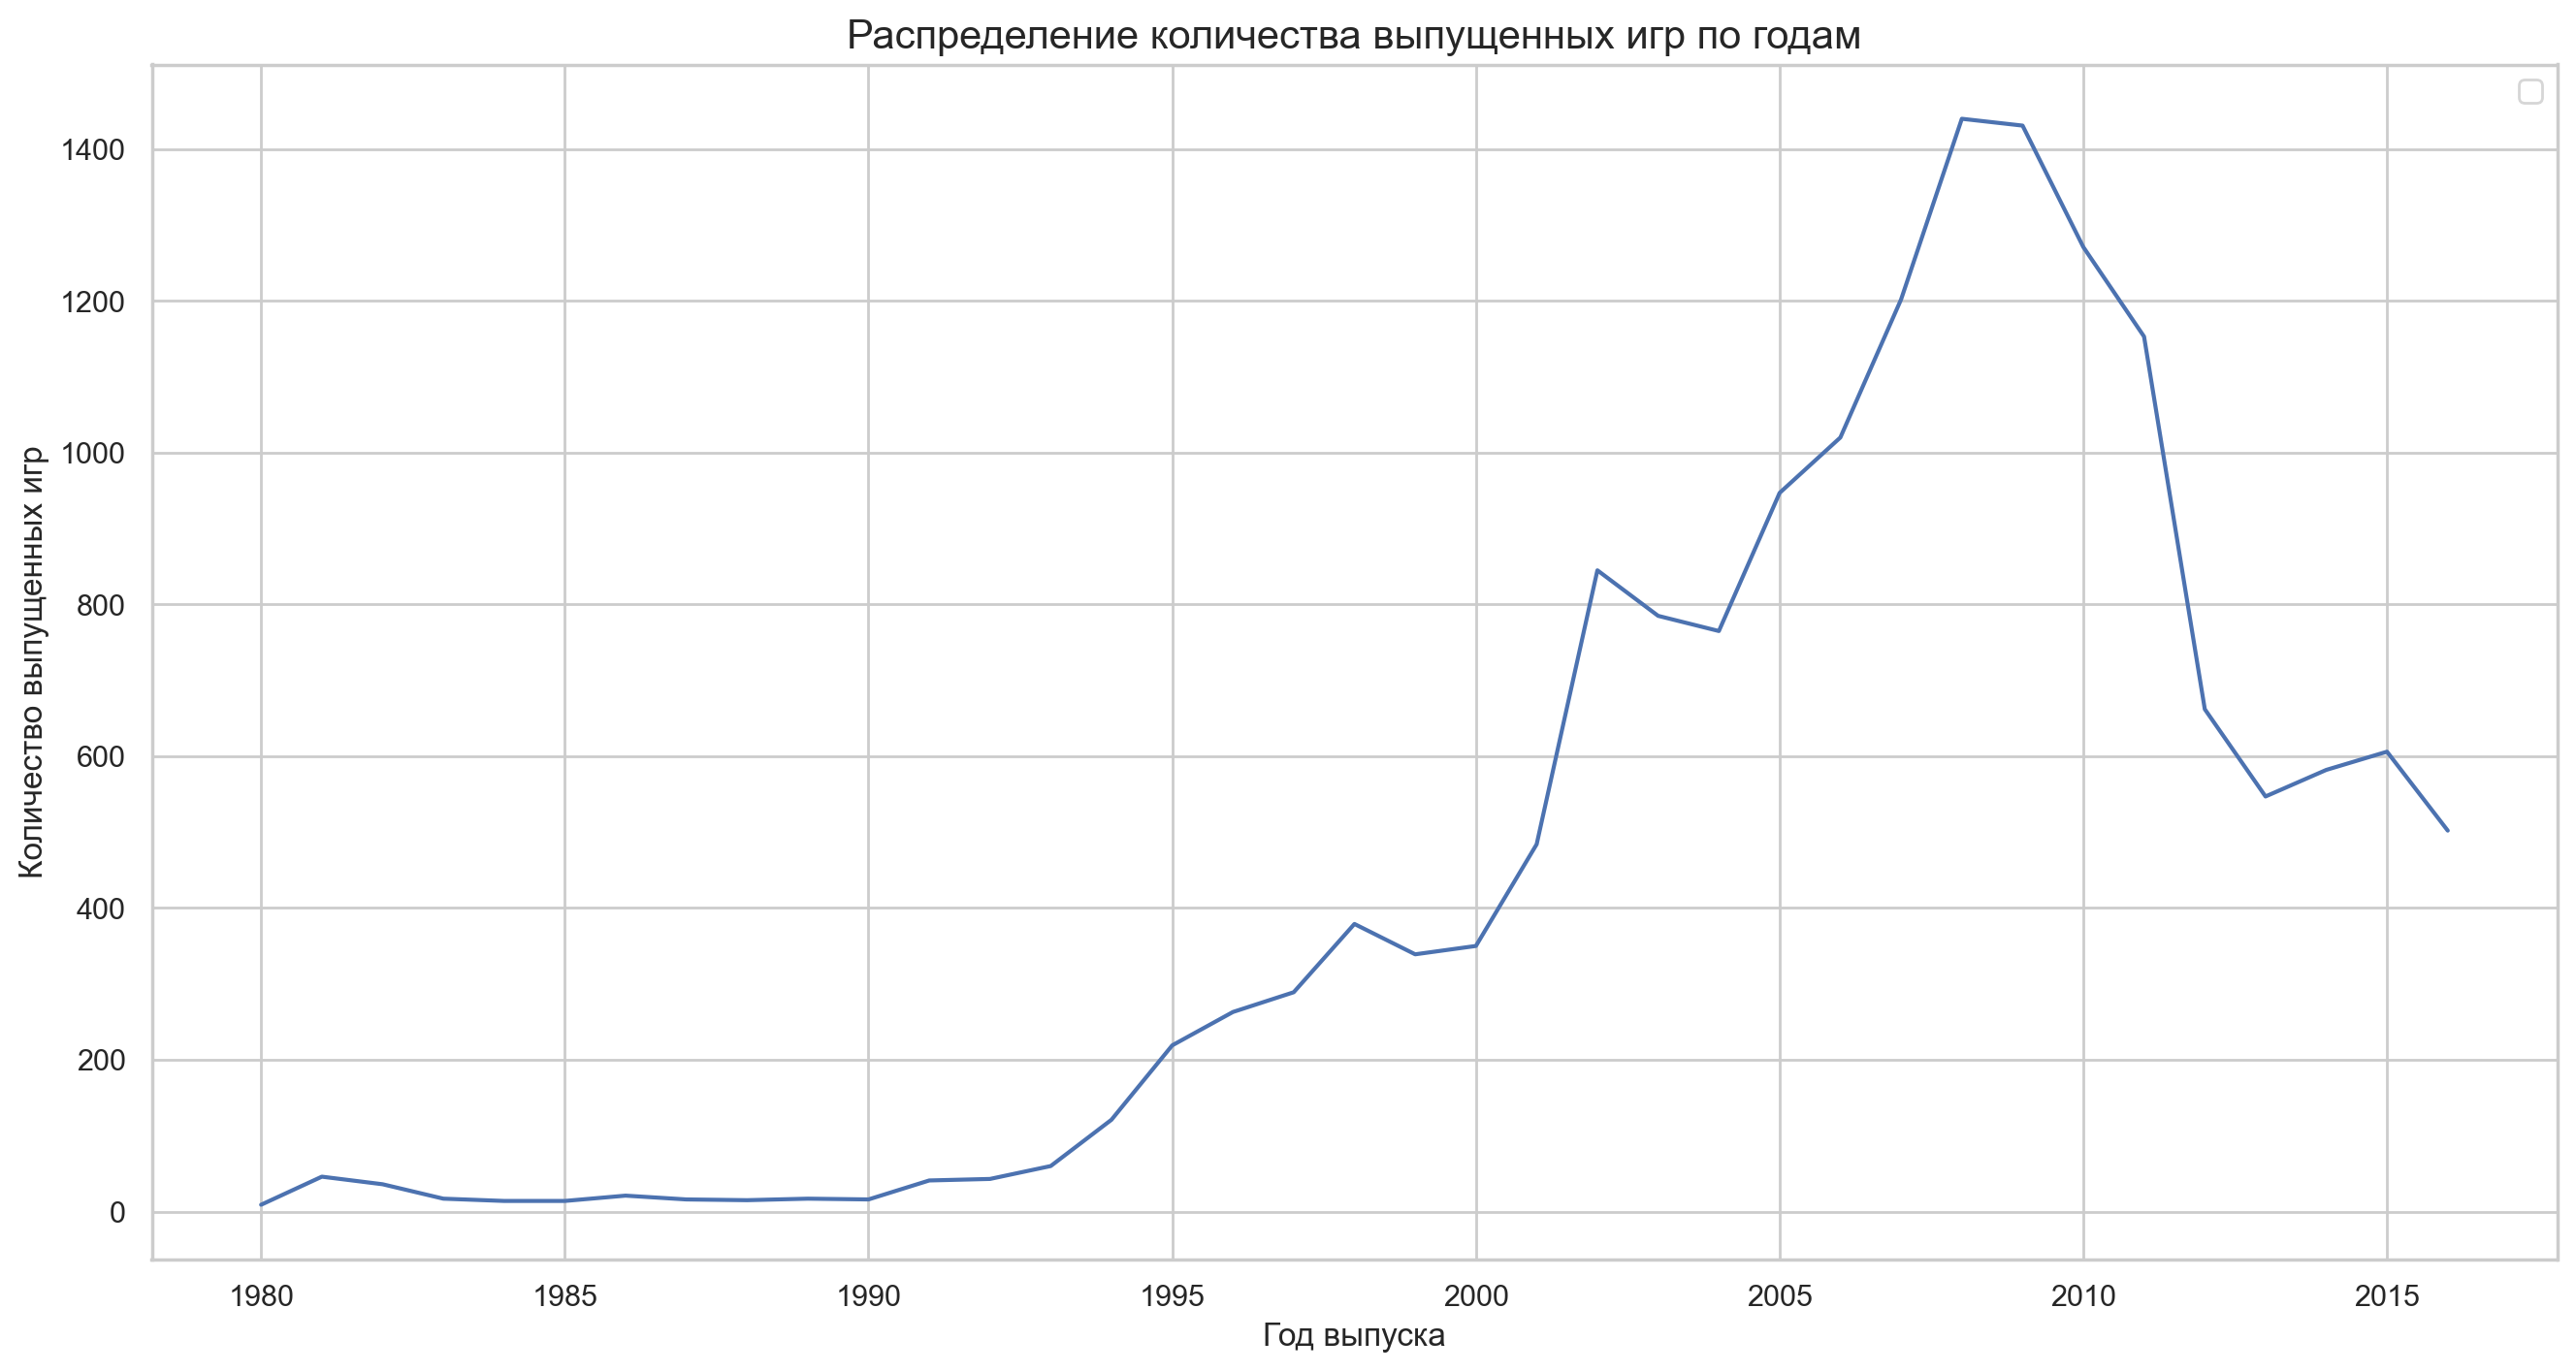

In [43]:
# вернемся к графику распределения количества игр по годам
plt.figure(figsize=(16, 8))

sns.lineplot(data=data.pivot_table(index='year_of_release', values='name', aggfunc='count'))

# добавим заголовок и подписи осей
plt.title("Распределение количества выпущенных игр по годам", fontsize=15)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество выпущенных игр", fontsize=12)

plt.legend('')
plt.show()

In [44]:
# отфильтруем данные
actual_data = data[data['year_of_release'] >= 2013]
actual_data.sample(5)

name platform  year_of_release         genre  \
12361                  Grand Kingdom      PSV             2015  Role-Playing   
14535             Megpoid the Music#      PSP             2013          Misc   
14147  Medabots 9: Metabee / Rokusho      3DS             2015  Role-Playing   
11660               Yoru no Nai Kuni      PSV             2015  Role-Playing   
12681                    Remember Me       PC             2013        Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
12361      0.01      0.01      0.04         0.01         76.00        8.80   
14535      0.00      0.00      0.03         0.00           NaN         NaN   
14147      0.00      0.00      0.03         0.00           NaN         NaN   
11660      0.00      0.00      0.08         0.00           NaN         NaN   
12681      0.00      0.05      0.00         0.00         65.00        7.40   

          rating  total_sales  
12361          T         0.07  
14535  undefined         0.03  
14147  undefined         0.03  
11660  undefined         0.08  
12681          M         0.05

**Вывод:**

- С 2008 года по 2016 год трендовая линия продаж падает. Однако учитывая динамику развития игровой индустрии, актуальный период будет составлять 2-5 лет. Возьмем актуальный период в 4 года с 2013 года включительно.

### Поиск потенциально прибыльных в актуальный период платформ

- Ответим на вопрос "Какие платформы лидируют по продажам, растут или падают?". Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [45]:
# создадим сводную таблицу суммарного числа проданных копий для каждой платформы по годам начиная с 2013 года
sales_by_each_year = actual_data.pivot_table(
    index='year_of_release', 
    columns='platform',
    values='total_sales',
    aggfunc='sum')

sales_by_each_year = sales_by_each_year.reset_index().rename_axis(None, axis=1)

sales_by_each_year

year_of_release   3DS   DS    PC    PS3    PS4  PSP   PSV  Wii  WiiU  X360  \
0             2013 56.57 1.54 12.66 113.25  25.99 3.38 10.59 8.59 21.65 88.58   
1             2014 43.76  NaN 13.63  47.76 100.00 0.24 11.90 3.75 22.03 34.74   
2             2015 27.78  NaN  8.52  16.82 118.90 0.12  6.25 1.14 16.35 11.96   
3             2016 15.14  NaN  5.25   3.60  69.25  NaN  4.25 0.18  4.60  1.52   

   XOne  
0 18.96  
1 54.07  
2 60.14  
3 26.15

<Figure size 3200x1600 with 0 Axes>

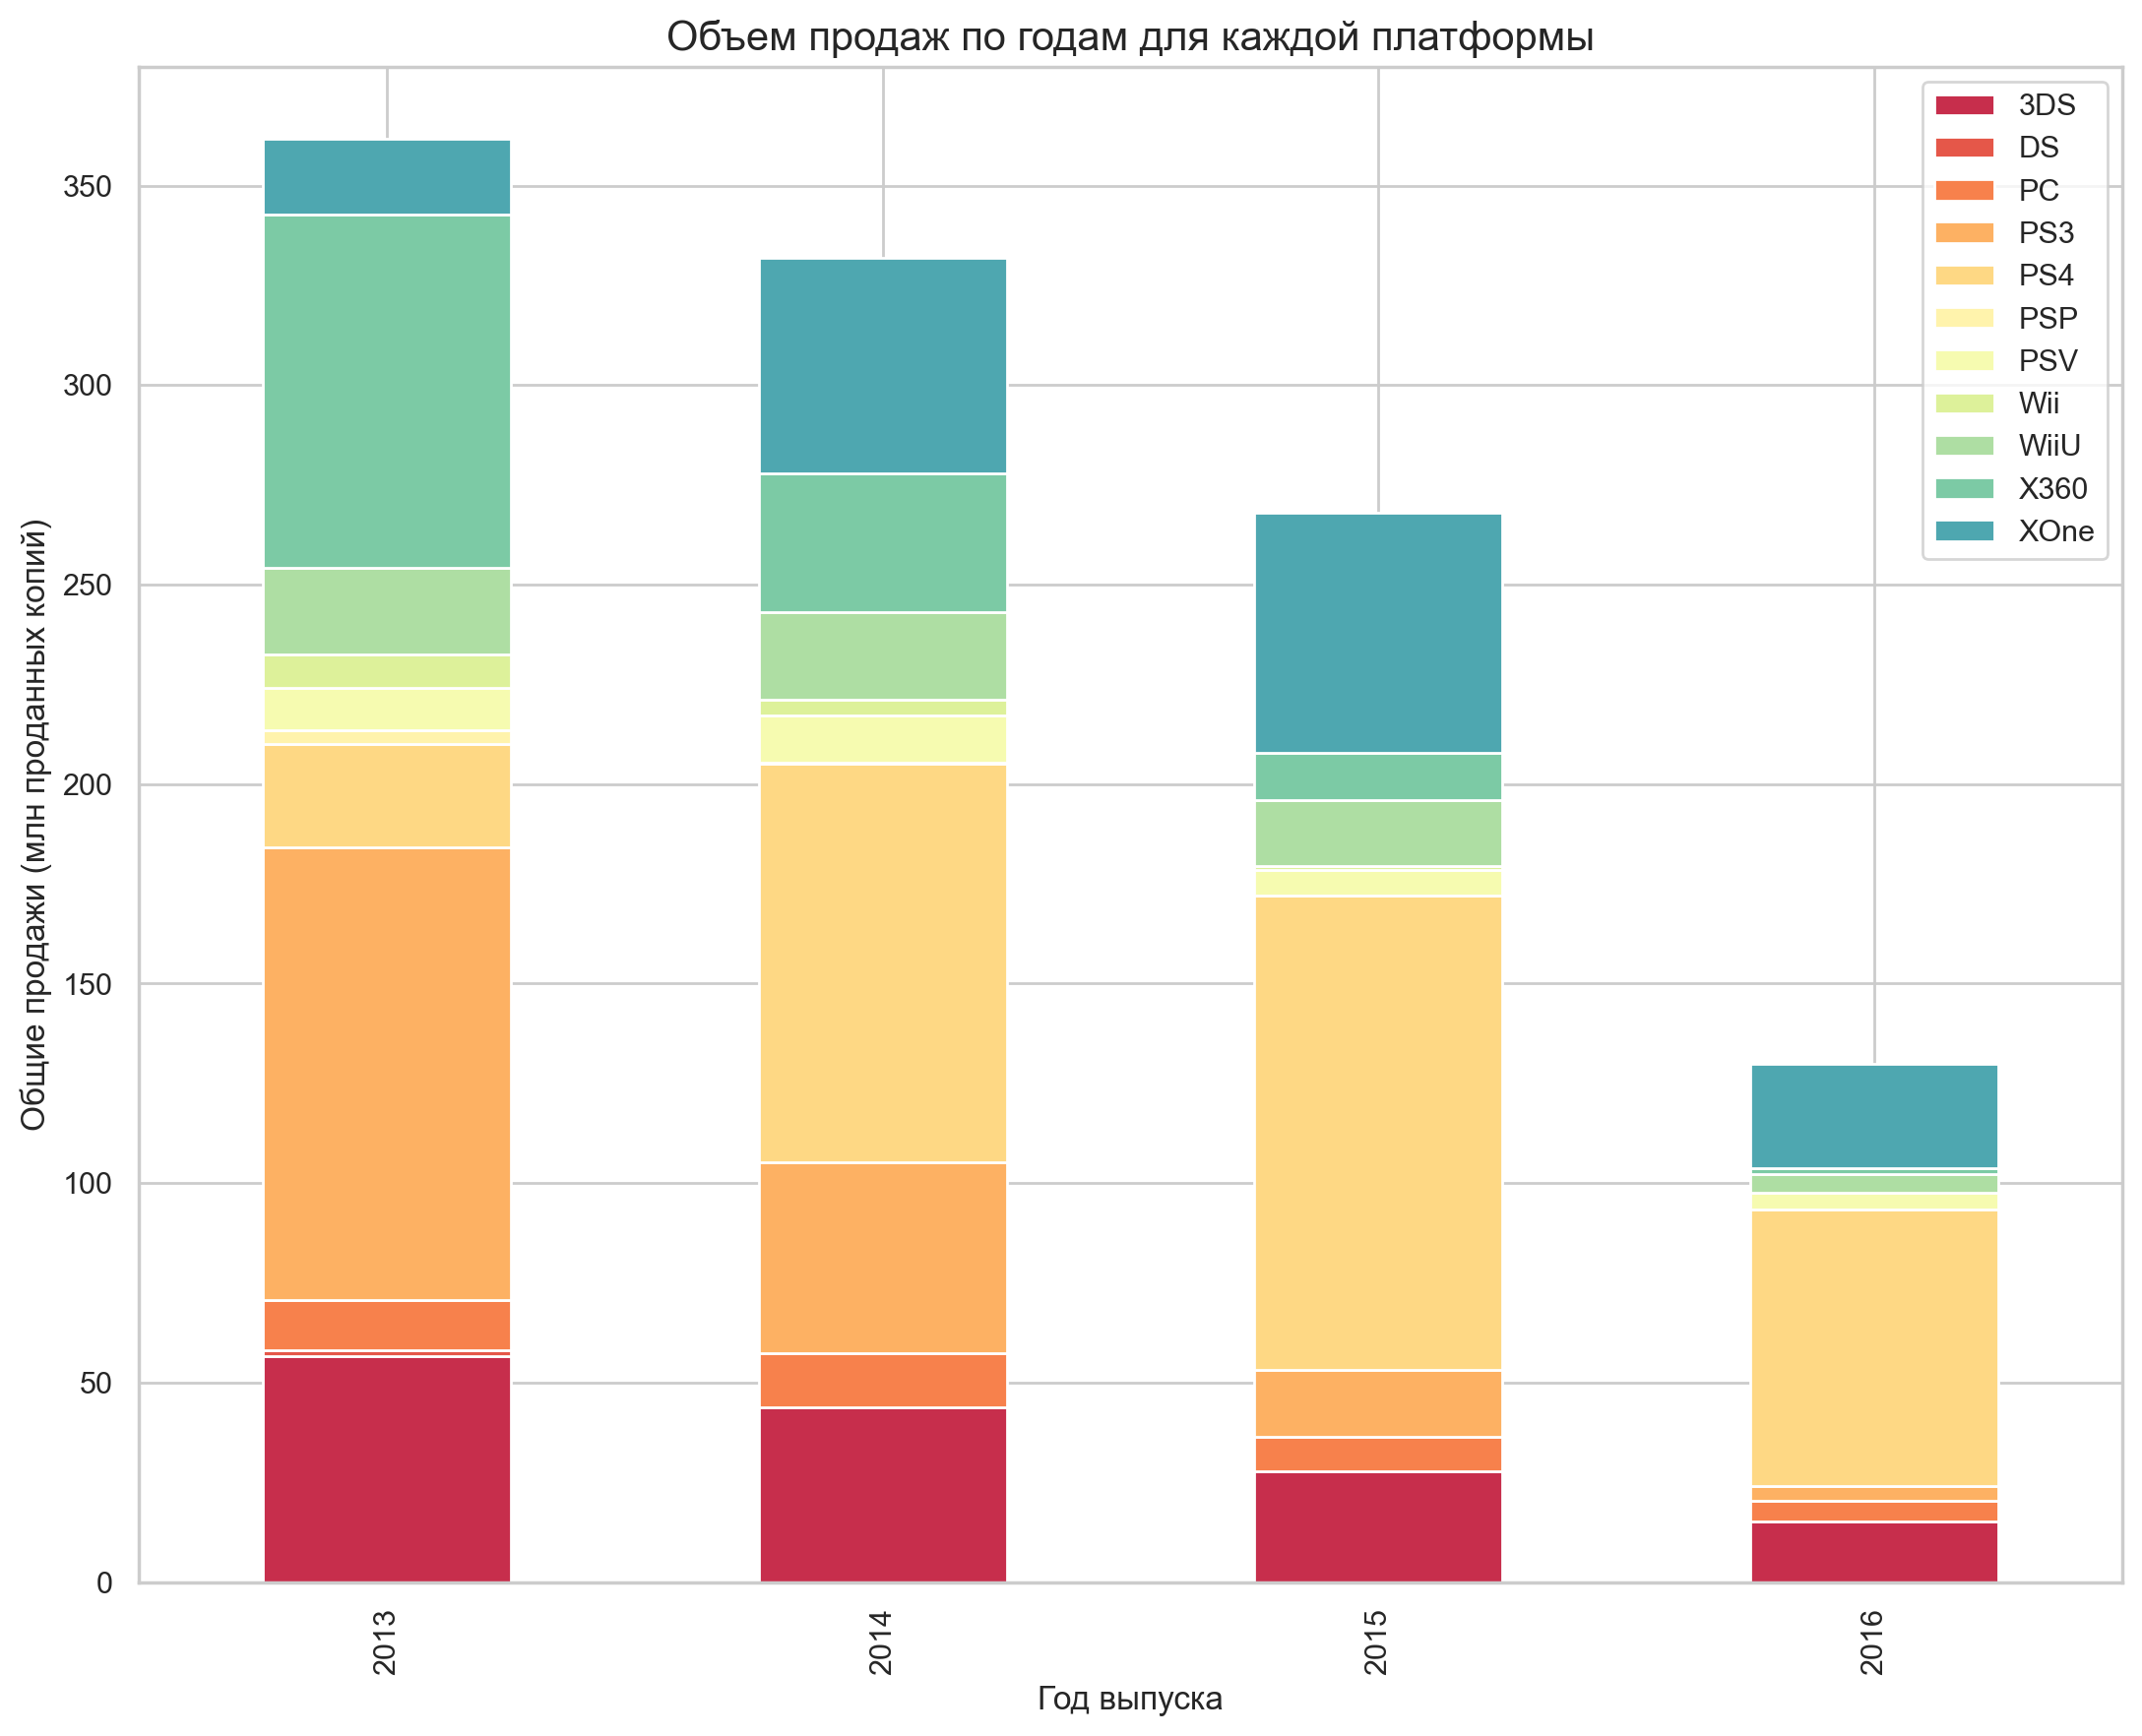

In [46]:
# построим распределение объема продаж по годам для каждой платформы
plt.figure(figsize=(16, 8))

sales_by_each_year.plot(kind='bar', x='year_of_release', stacked=True, figsize=(13,10), 
                        color = sns.color_palette('Spectral', 12))

# добавим заголовок и подписи осей
plt.title("Объем продаж по годам для каждой платформы", fontsize=15)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)

plt.show()

**Вывод:**

- Из тех, кто продолжает оставаться на плаву в 2016 году, можно отметить: на первом месте PlayStation 4, XBOX One на втором, далее Nintendo 3DS, PC, Nintendo Wii U, PlayStation Vita, PlayStation 3 на последнем месте.
- У каждой из перечисленных плафторм к 2016 году продажи падают. Учитывая, что данные за неполный 2016 год, можно отметить 2 плафтормы, у которых растут продажи к 2015 году - это PlayStation 4 и XBOX One.

In [47]:
# сохраним в переменной data_top_7_platforms только последние поколения платформ и избавимся от выбросов
list_of_top_7 = ['PS4','XOne','PC','WiiU','3DS', 'PSV', 'PS3']
data_top_7_platforms = actual_data[actual_data['platform'].isin(list_of_top_7)]
data_top_7_platforms.sample(5)

name platform  \
14683         Himoutou! Umaru-Chan: Himoutou Ikusei Keikaku      PSV   
242                                       Halo 5: Guardians     XOne   
2621   Mario & Sonic at the Sochi 2014 Olympic Winter Games     WiiU   
4004                                       Sonic Lost World      3DS   
7732                                         Fighter Within     XOne   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
14683             2015  Simulation      0.00      0.00      0.03         0.00   
242               2015     Shooter      2.78      1.27      0.03         0.41   
2621              2013      Sports      0.37      0.22      0.13         0.06   
4004              2013    Platform      0.24      0.14      0.07         0.03   
7732              2013    Fighting      0.11      0.07      0.00         0.02   

       critic_score  user_score     rating  total_sales  
14683           NaN         NaN  undefined         0.03  
242           84.00        6.40          T         4.49  
2621            NaN         NaN  undefined         0.78  
4004          59.00        6.50       E10+         0.48  
7732          23.00        3.00          T         0.20

In [48]:
# посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.
data_top_7_platforms.groupby('platform')['total_sales'].describe()

count  mean  std  min  25%  50%  75%   max
platform                                            
3DS      303.00  0.47 1.38 0.01 0.04 0.09 0.28 14.60
PC       192.00  0.21 0.35 0.01 0.03 0.08 0.23  3.05
PS3      345.00  0.53 1.45 0.01 0.04 0.15 0.51 21.05
PS4      392.00  0.80 1.61 0.01 0.06 0.20 0.73 14.63
PSV      358.00  0.09 0.15 0.01 0.02 0.04 0.11  1.96
WiiU     115.00  0.56 1.04 0.01 0.06 0.20 0.60  7.09
XOne     247.00  0.65 1.04 0.01 0.06 0.22 0.69  7.39

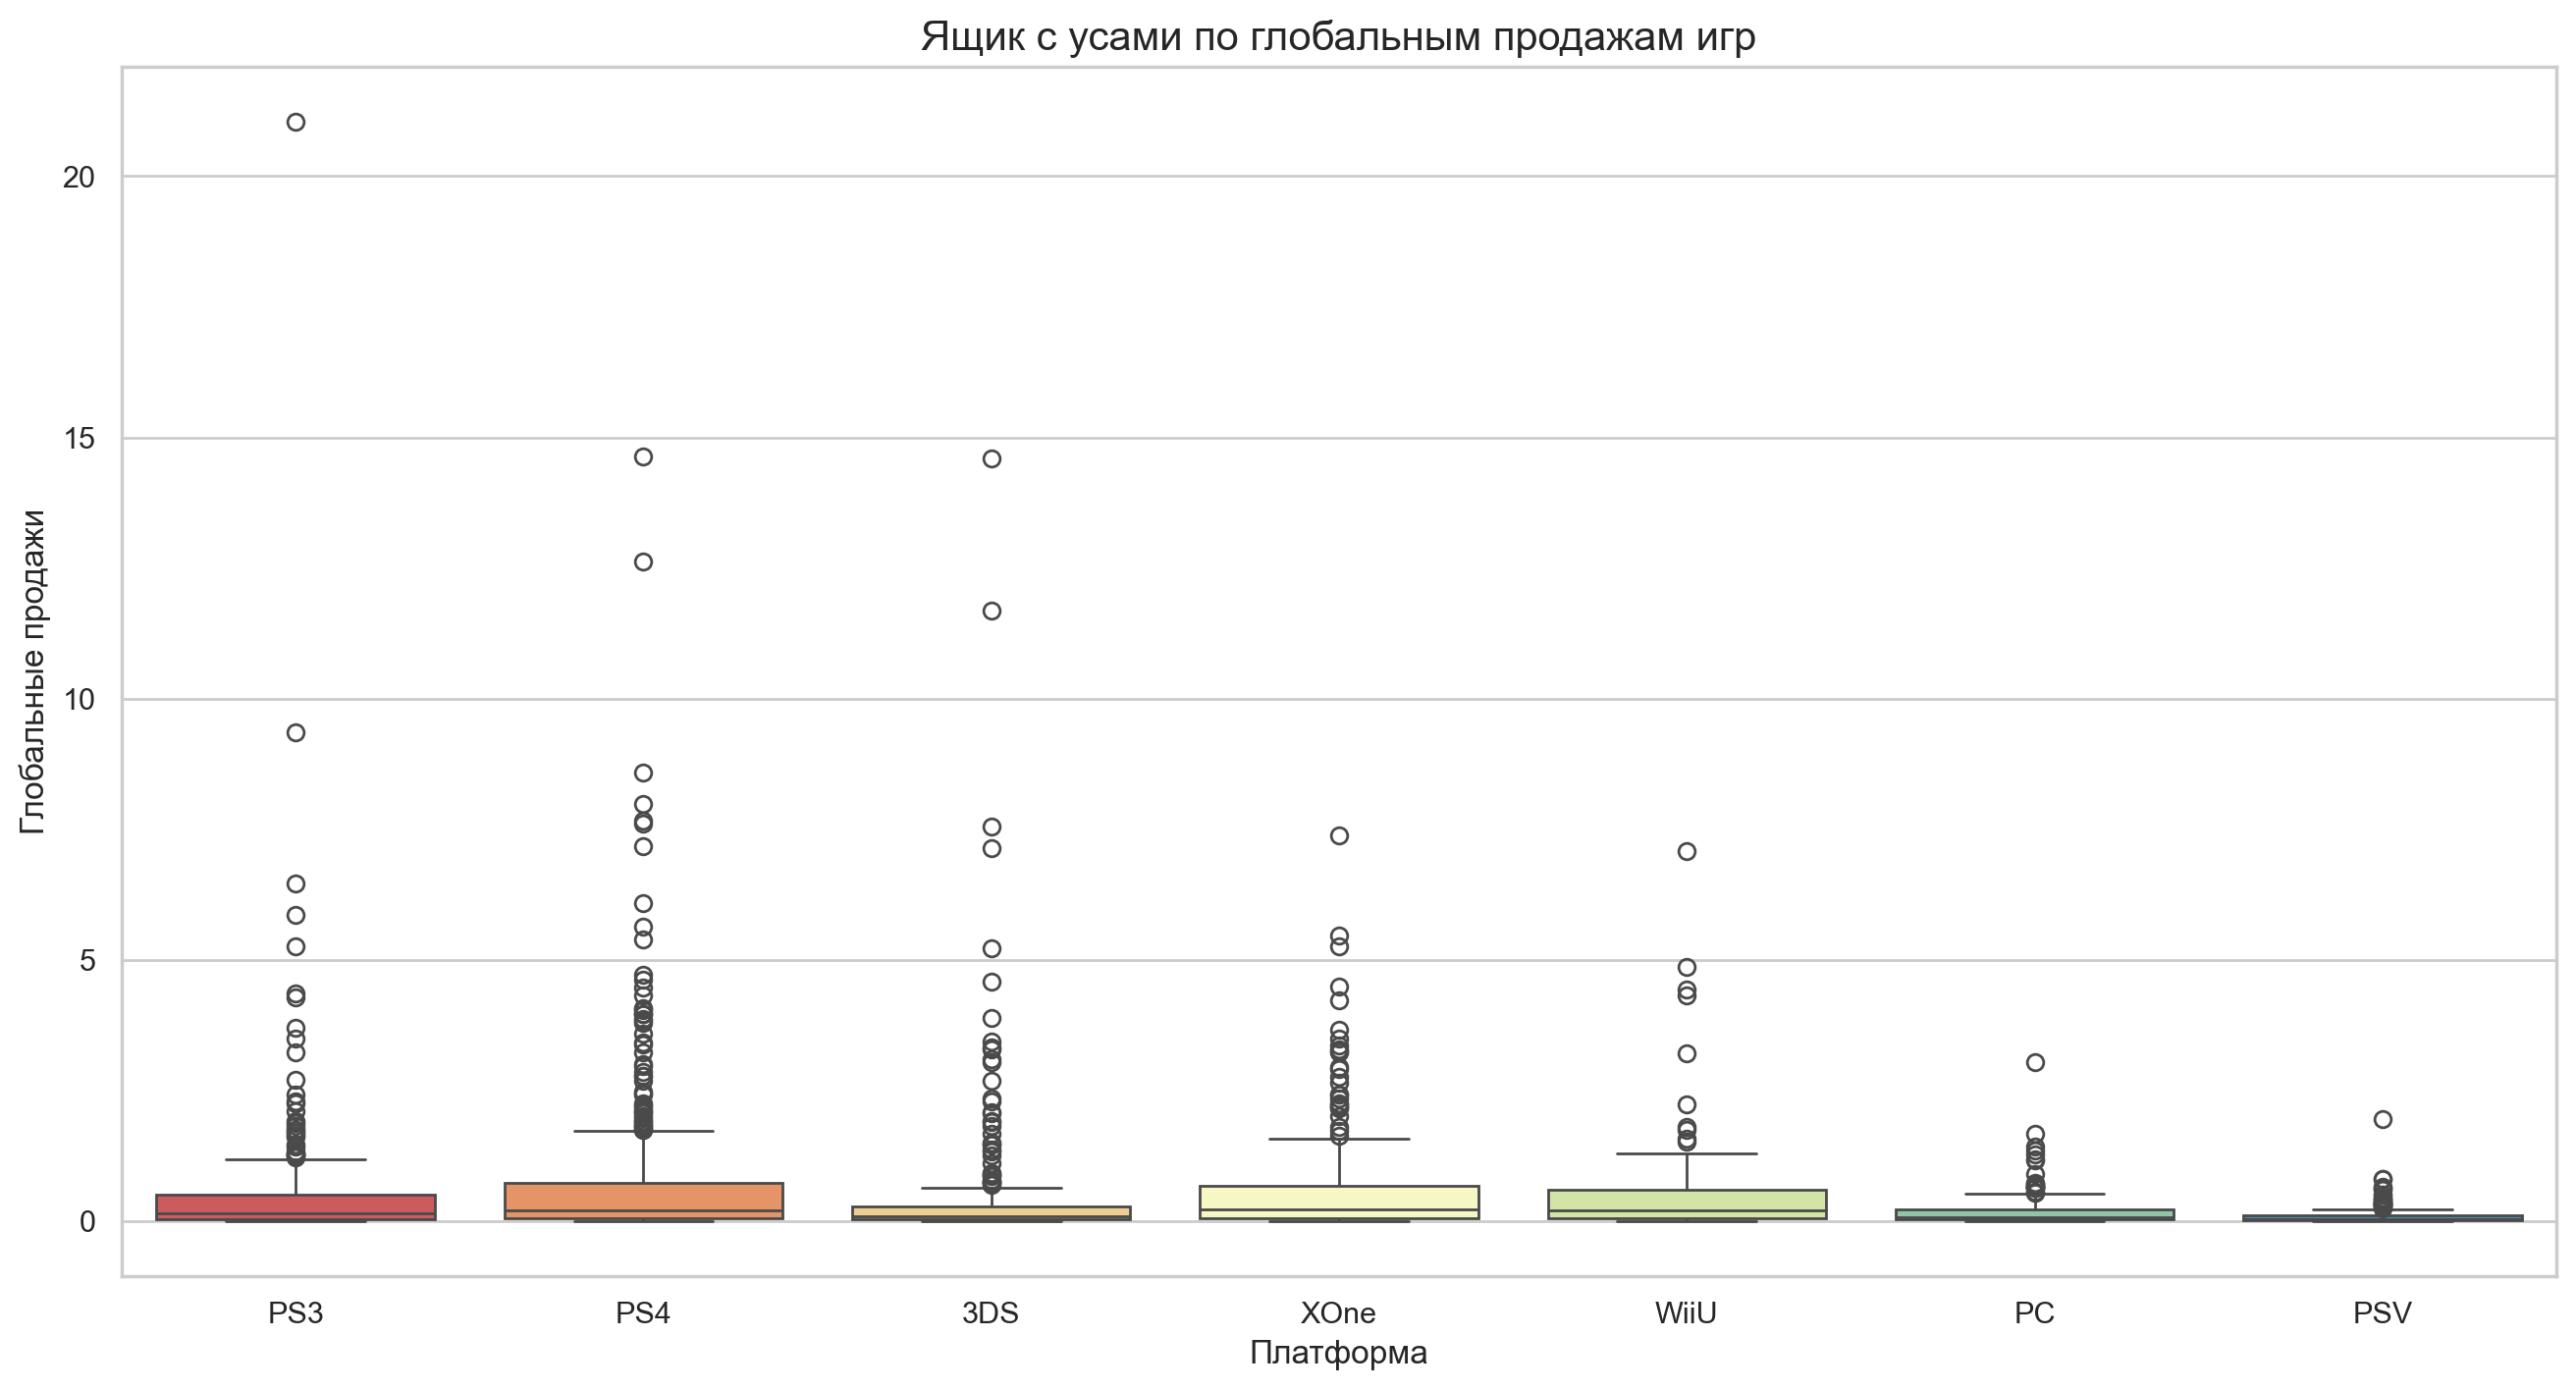

In [49]:
# построим график
plt.figure(figsize=(16, 8))

sns.boxplot(data=data_top_7_platforms, x='platform', y='total_sales', palette = sns.color_palette('Spectral', 7))

# добавляем заголовок и подписи осей
plt.title('Ящик с усами по глобальным продажам игр', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

In [50]:
# уберем выбросы
data_top_7_platforms = data_top_7_platforms[data_top_7_platforms['total_sales'] < 0.9]

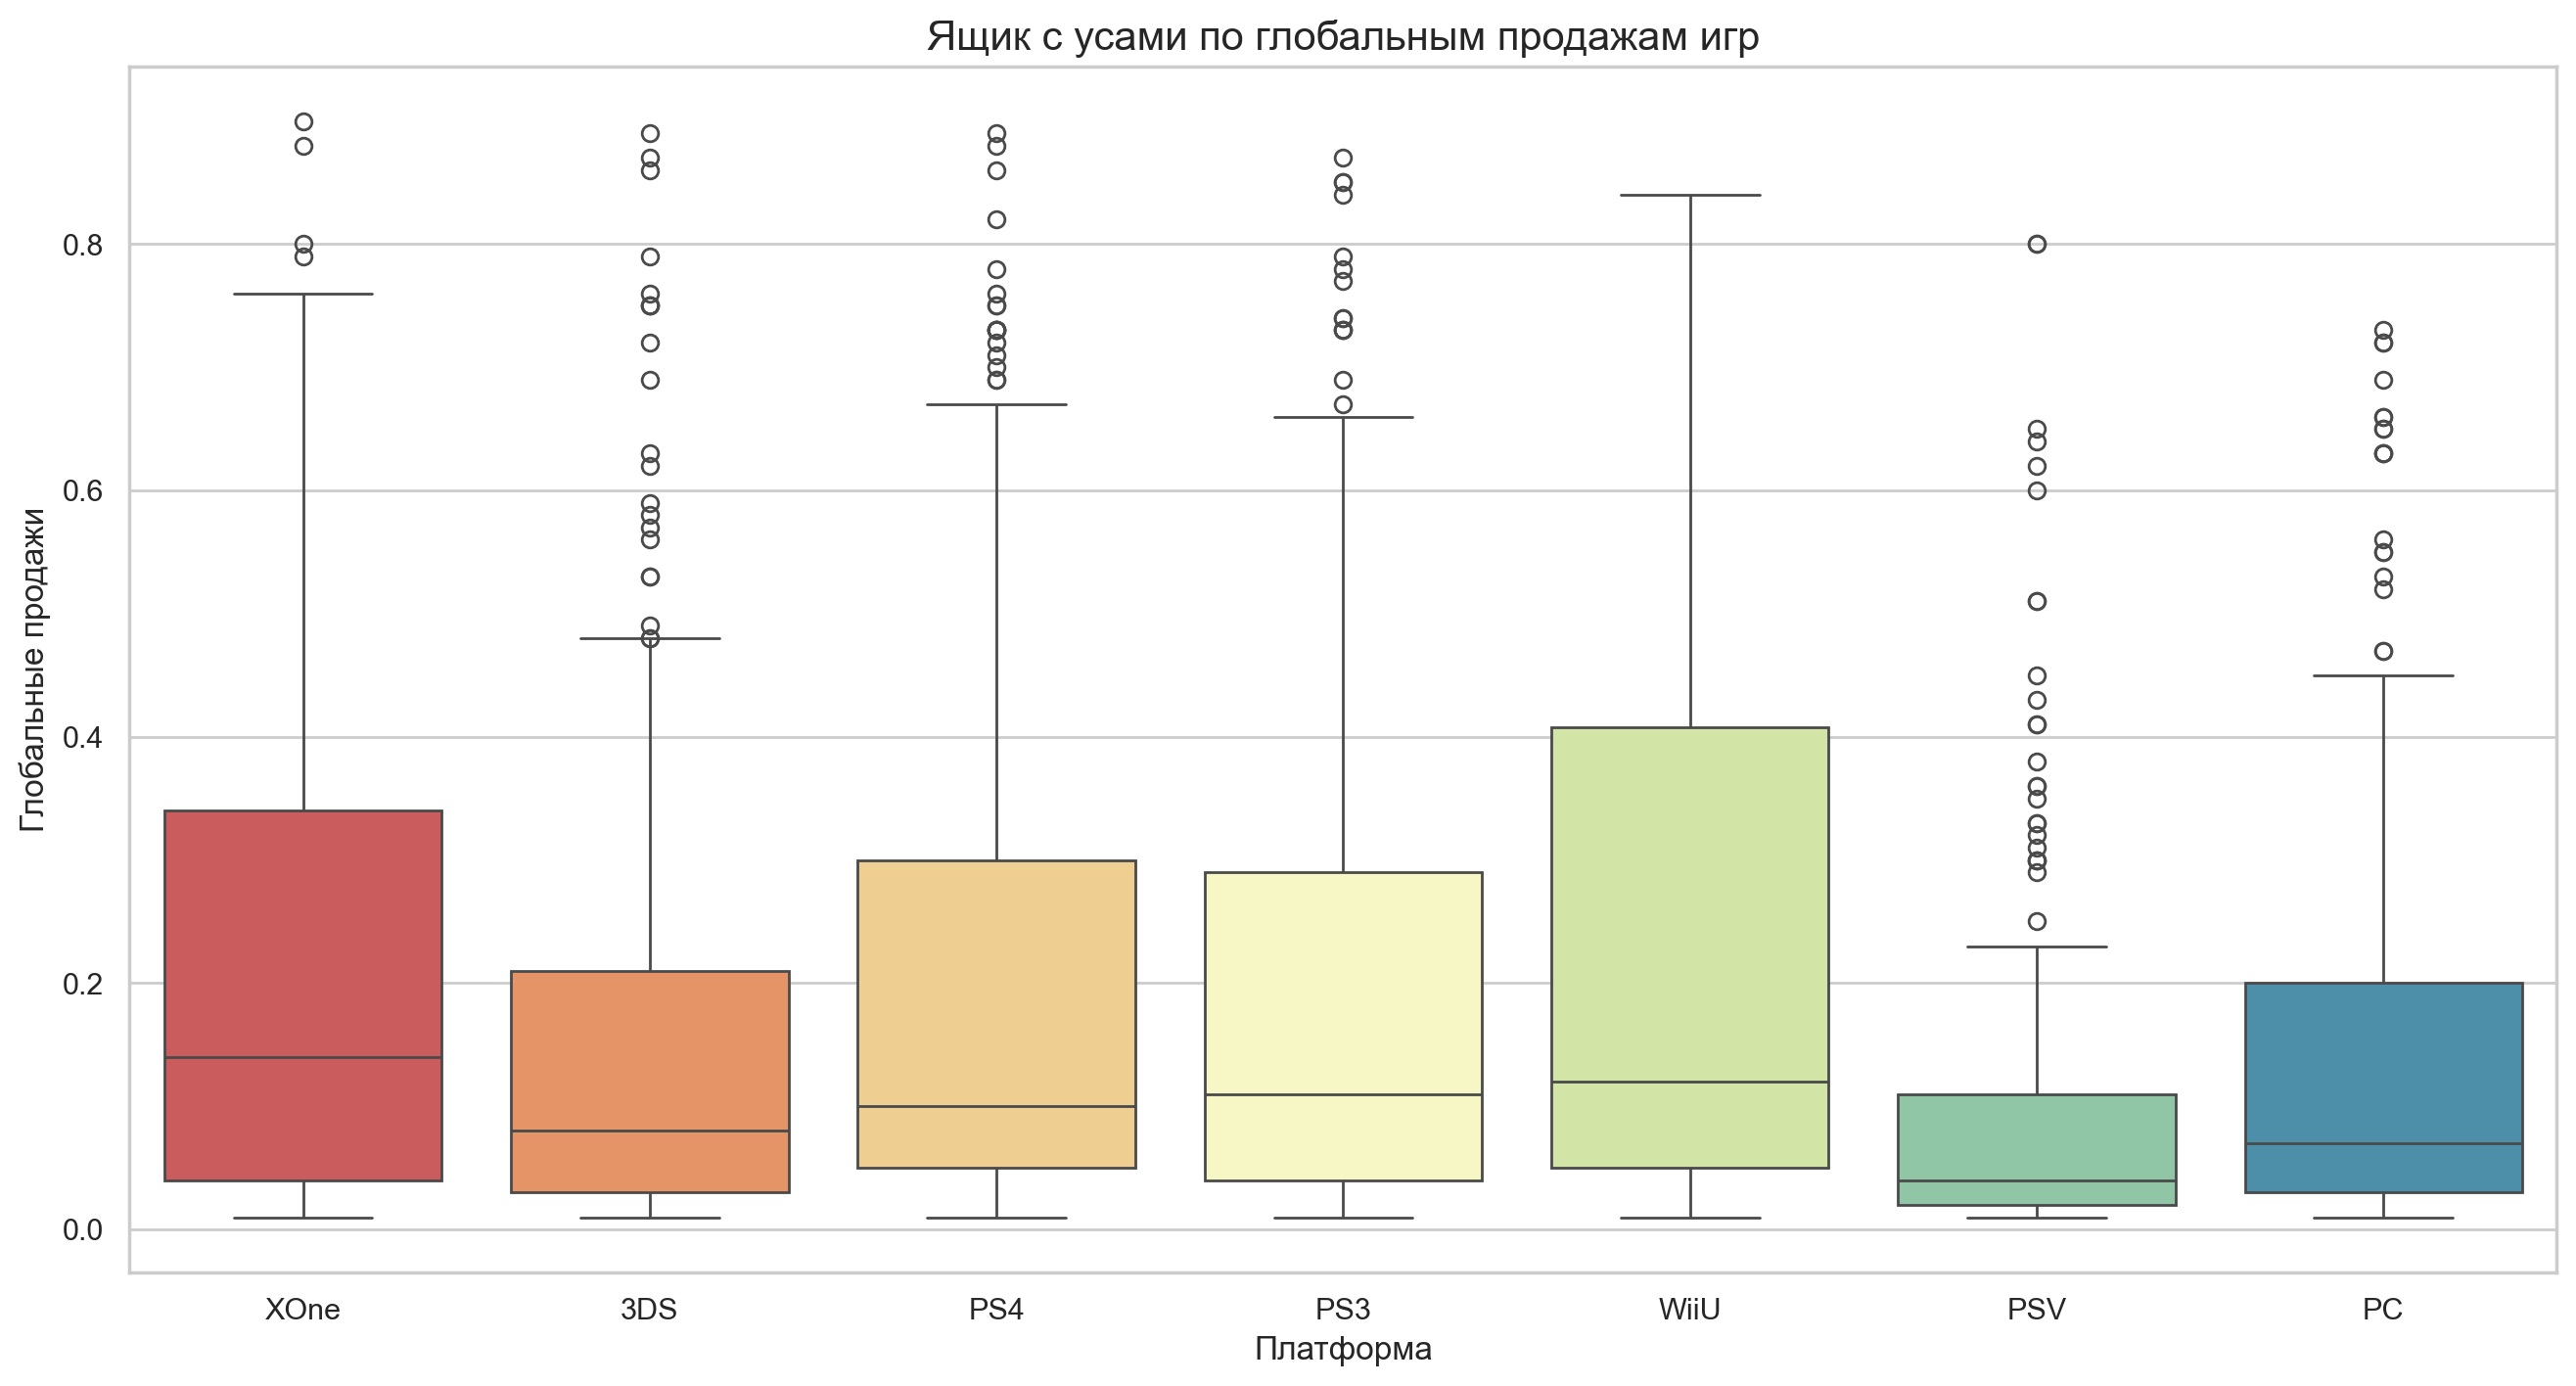

In [51]:
# построим график без выбросов
plt.figure(figsize=(16, 8))

sns.boxplot(data=data_top_7_platforms, x='platform', y='total_sales', palette = sns.color_palette('Spectral', 7))

# добавляем заголовок и подписи осей
plt.title('Ящик с усами по глобальным продажам игр', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

**Вывод:**

- Из графиков видим, что наибольшее число продаж у WiiU, XOne, PS4, PS3, 3DS, PC и PSV на последнем месте;
- Медиана протекает у всех по разному;
- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014;
- Почти у всех платформ есть много выбросов - скорее всего это игры, которые многим понравились, раздавались беслпатно и пр.;
- ПК на данном промежутке времени отошли на второй план.

### Оценка влияния на продажи отзывов пользователей и критиков

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.

In [52]:
# возьмем самую популярную платформу на 2016 год - PS4
data_ps4 = actual_data[actual_data['platform'] == 'PS4']
data_ps4.head()

name platform  year_of_release    genre  \
31       Call of Duty: Black Ops 3      PS4             2015  Shooter   
42              Grand Theft Auto V      PS4             2014   Action   
77                         FIFA 16      PS4             2015   Sports   
87    Star Wars Battlefront (2015)      PS4             2015  Shooter   
92  Call of Duty: Advanced Warfare      PS4             2014  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
31      6.03      5.86      0.36         2.38           NaN         NaN   
42      3.96      6.31      0.38         1.97         97.00        8.30   
77      1.12      6.12      0.06         1.28         82.00        4.30   
87      2.99      3.49      0.22         1.28           NaN         NaN   
92      2.81      3.48      0.14         1.23         83.00        5.70   

       rating  total_sales  
31  undefined        14.63  
42          M        12.62  
77          E         8.58  
87  undefined         7.98  
92          M         7.66

In [53]:
# посчитаем коэффициенты корреляции
print('Корреляция между оценками пользователей и продажами:', \
      data_ps4['user_score'].corr(data_ps4['total_sales']))
print('Корреляция между оценками критиков и продажами:', \
      data_ps4['critic_score'].astype(float).corr(data_ps4['total_sales']))

Корреляция между оценками пользователей и продажами: -0.03195711020455644
Корреляция между оценками критиков и продажами: 0.40656790206178123


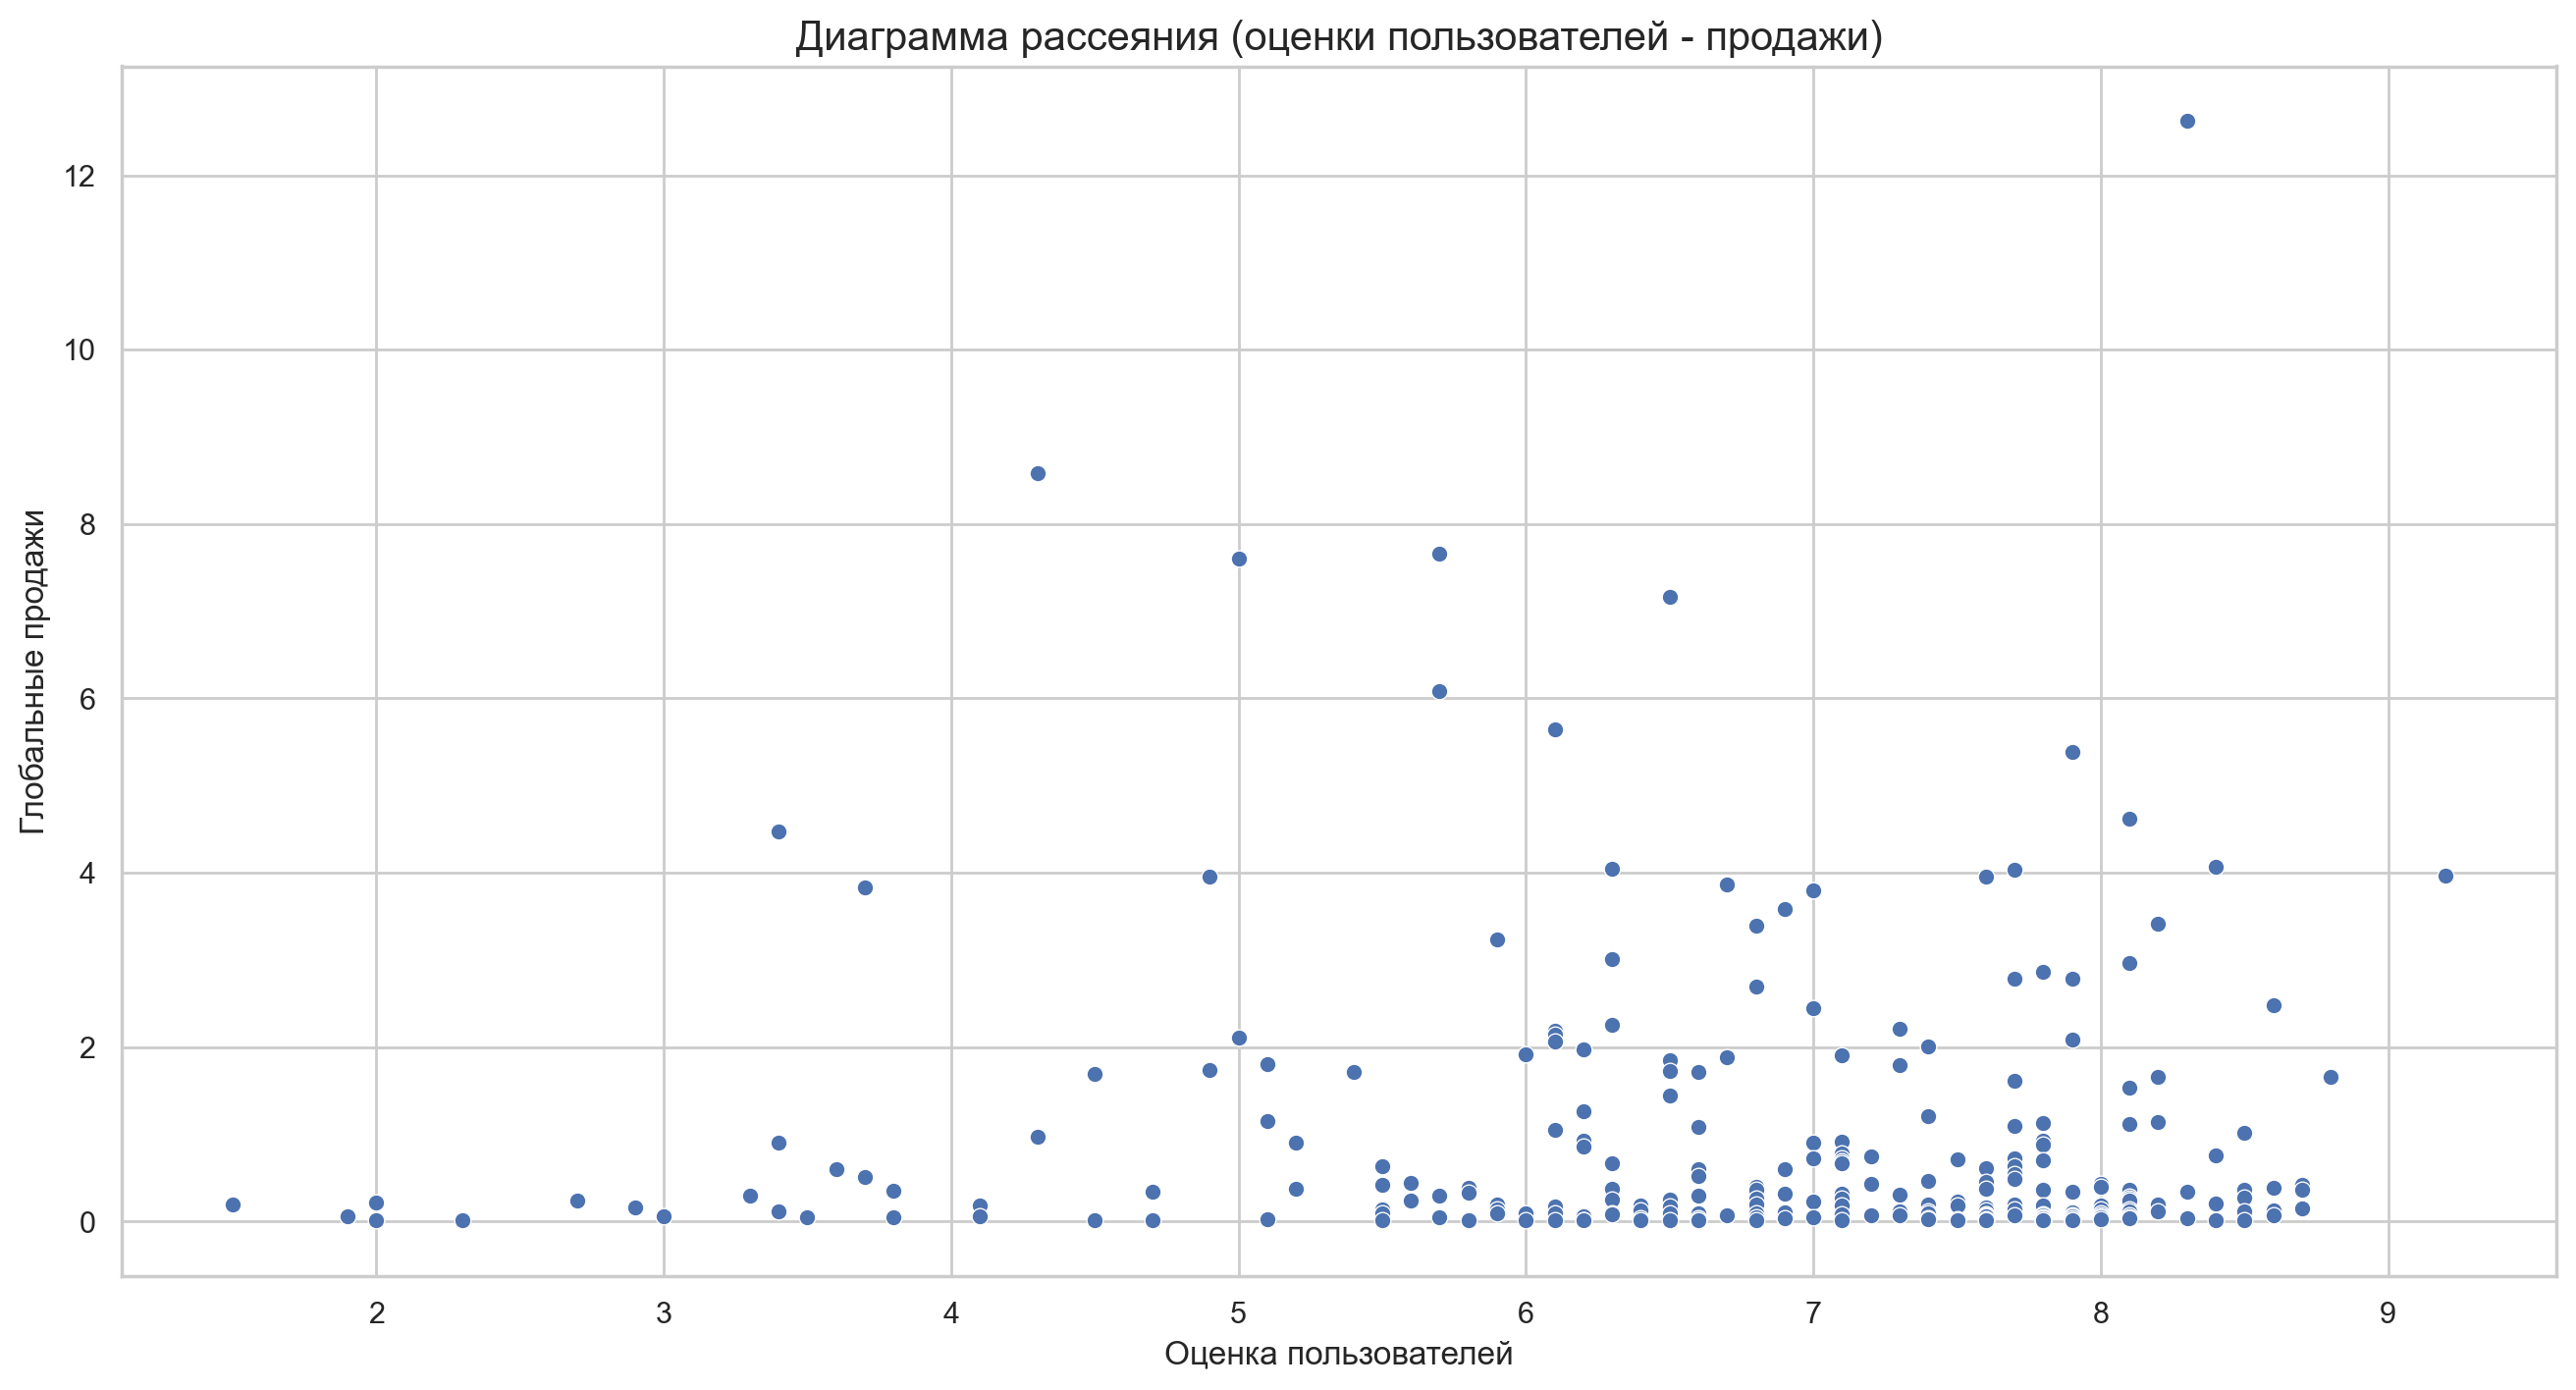

In [54]:
# построим диаграмму рассеяния между оценками пользователей и продажами
plt.figure(figsize=(16, 8))

sns.scatterplot(x='user_score', y='total_sales', data=data_ps4, palette='#7ca9d8')

# добавим заголовок и подписи осей
plt.title('Диаграмма рассеяния (оценки пользователей - продажи)', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

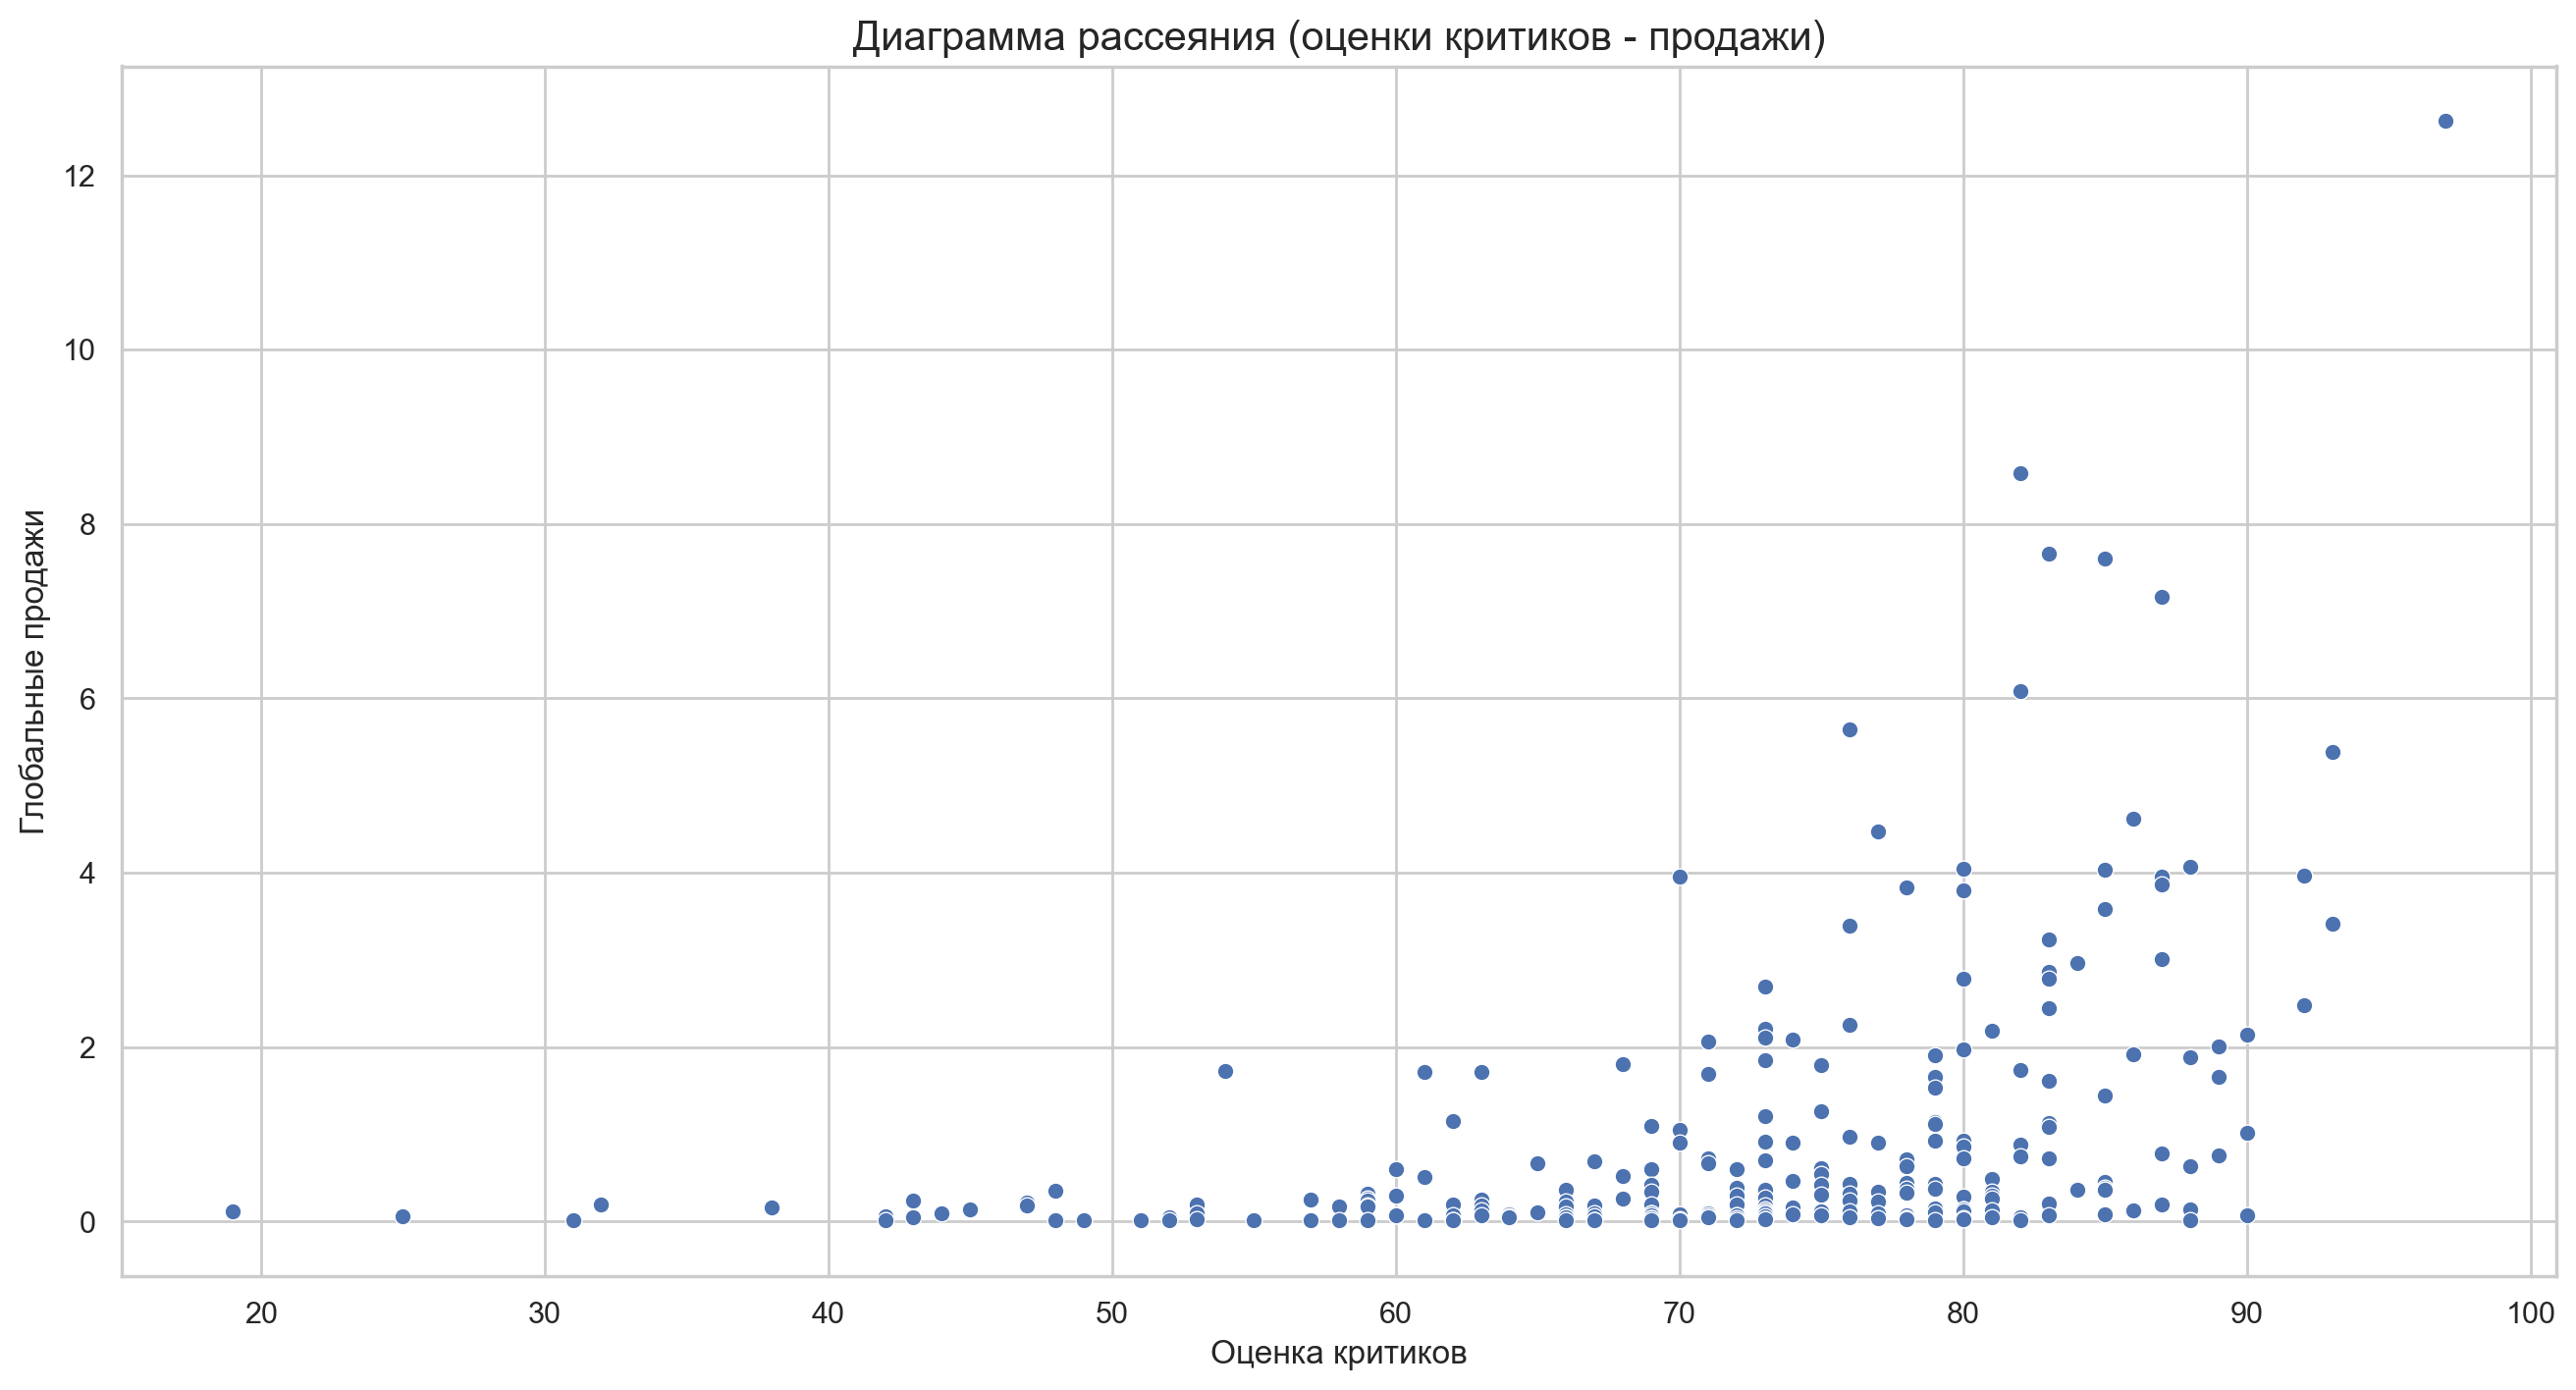

In [55]:
# построим диаграмму рассеяния между оценками критиков и продажами
plt.figure(figsize=(16, 8))

sns.scatterplot(x='critic_score', y='total_sales', data=data_ps4, palette='#7ca9d8')

# добавим заголовок и подписи осей
plt.title('Диаграмма рассеяния (оценки критиков - продажи)', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

У PS4 наблюдается умеренная связь между оценками критиков и продажами. Связь между оценками пользователей и продажами отсутствует. 

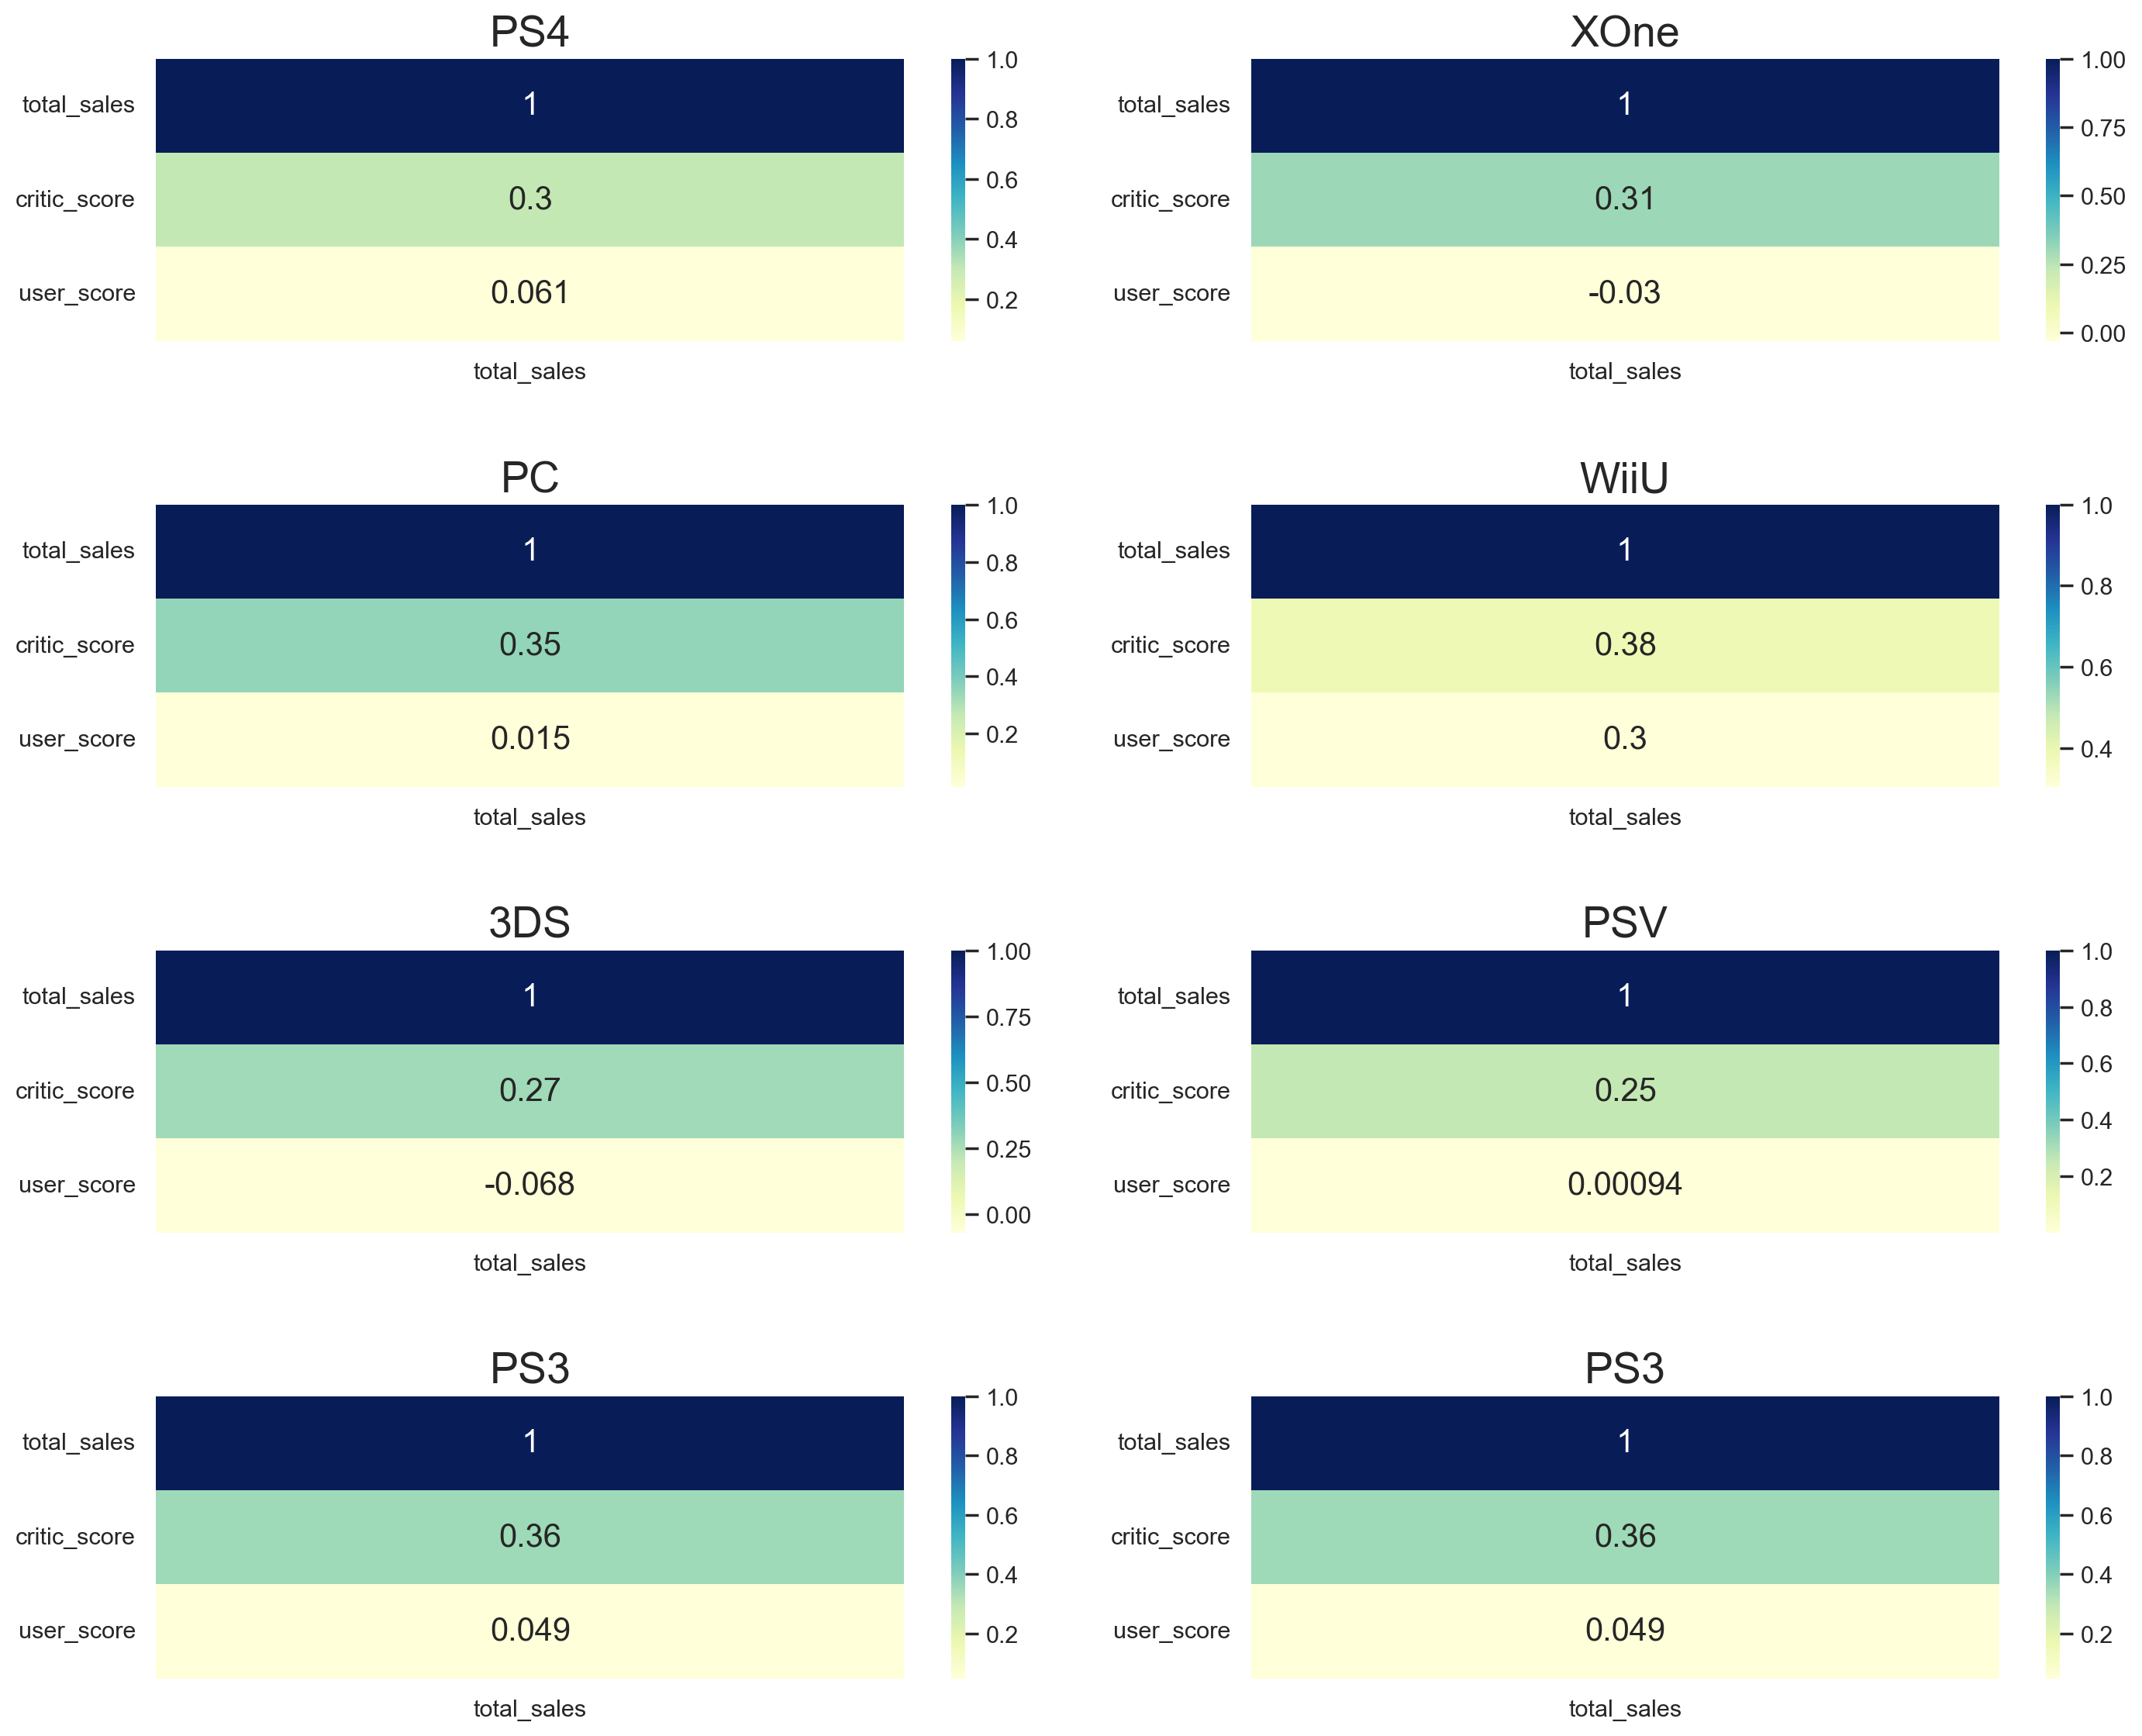

In [56]:
# посчитаем коэффициенты корреляции для каждой платформы
rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,12))
count = 0

for r in range(rows):
    for c in range(cols):
        if count == 7:
            count = 6   
        curr_platform = list_of_top_7[count]
        df_prep = data_top_7_platforms[(data_top_7_platforms['platform'] == curr_platform)].copy()
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="YlGnBu", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

In [57]:
# напишем функцию для построения диаграмм рассеяния
def platform_scatterplot (platform):
    data_platform = data_top_7_platforms[data_top_7_platforms['platform'] == platform]
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=data_platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=data_platform, ax=ax[1])
    fig.suptitle(platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()

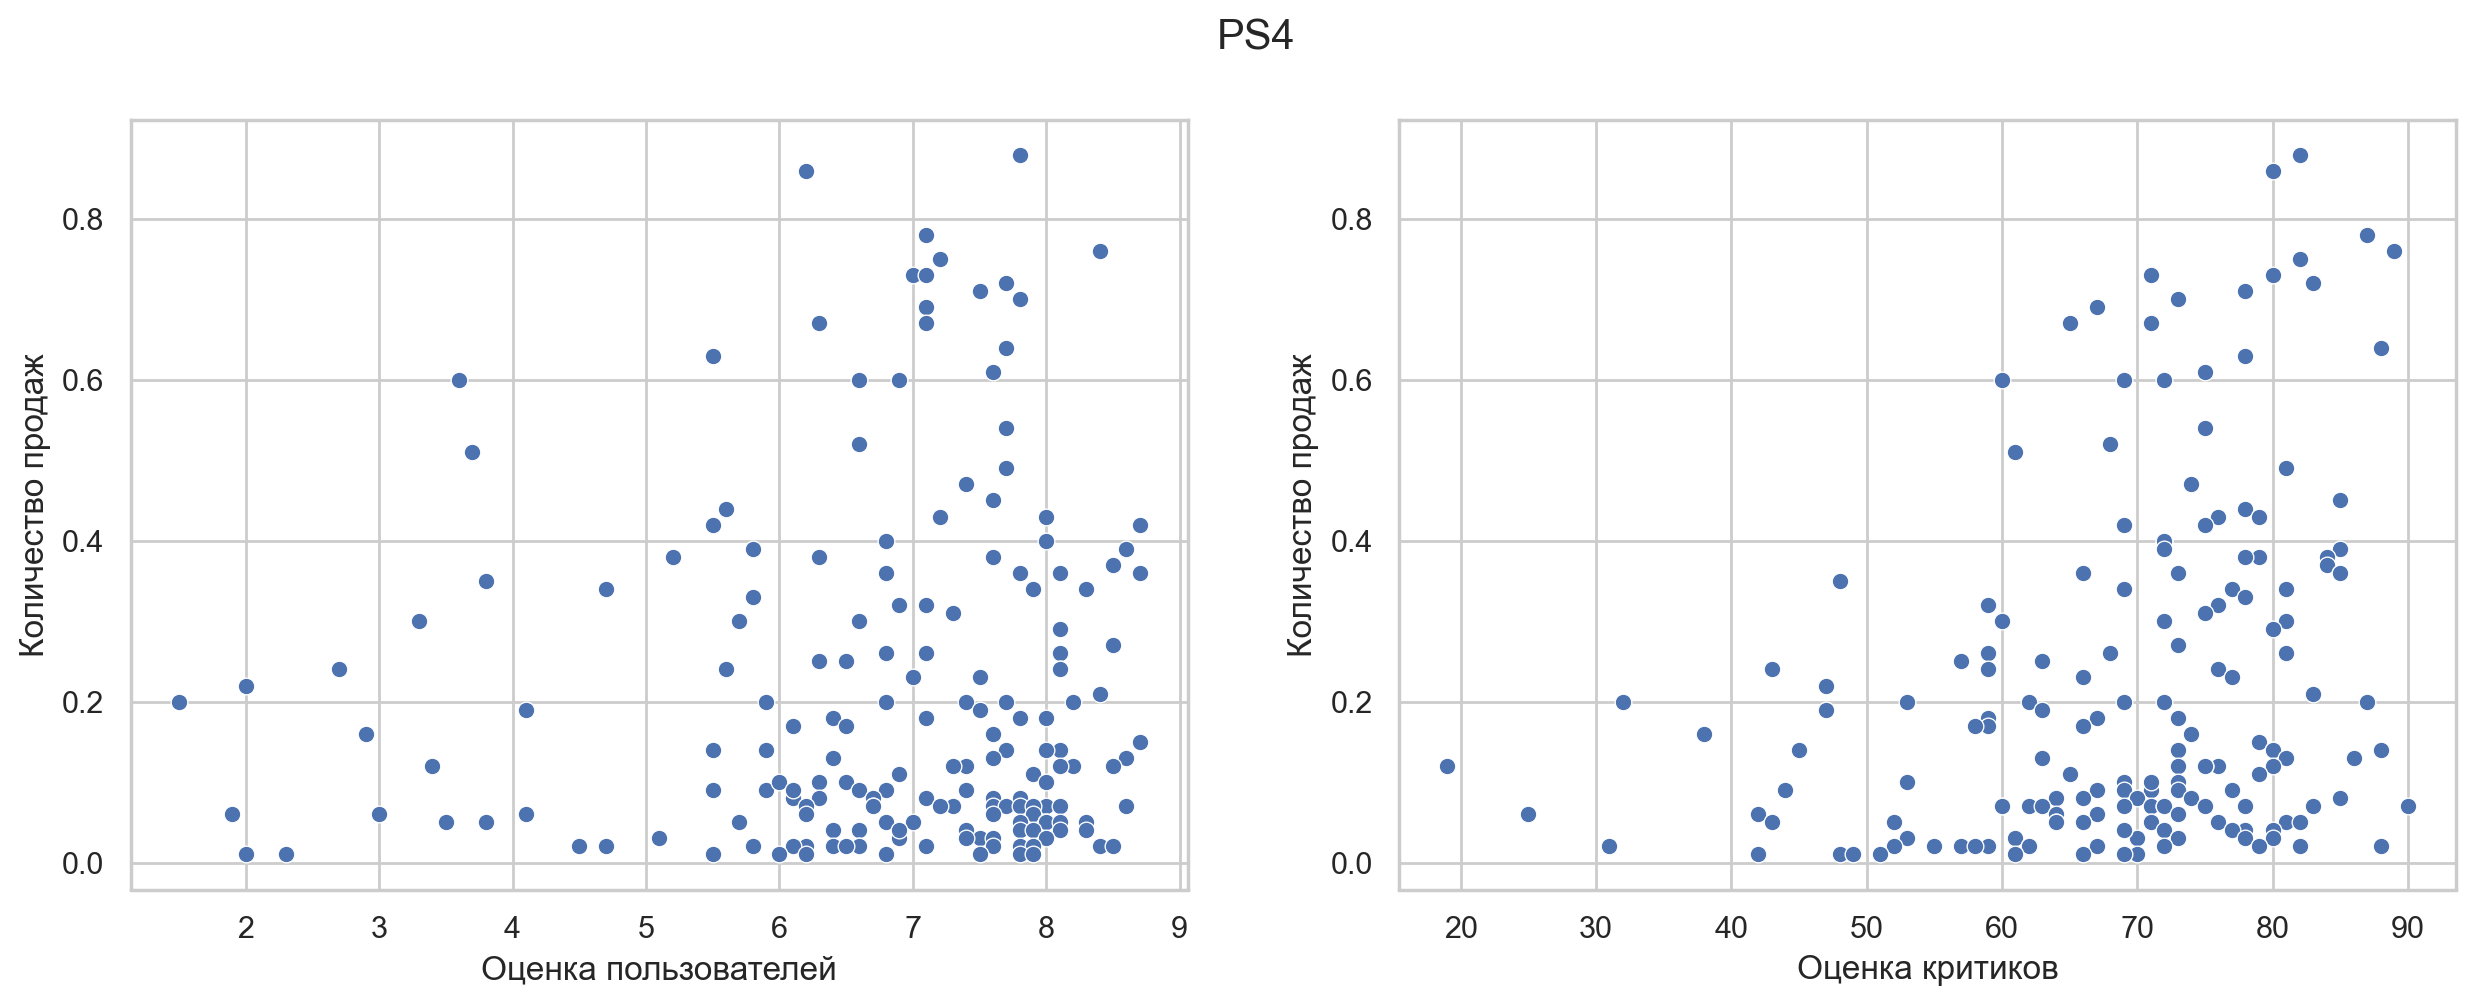

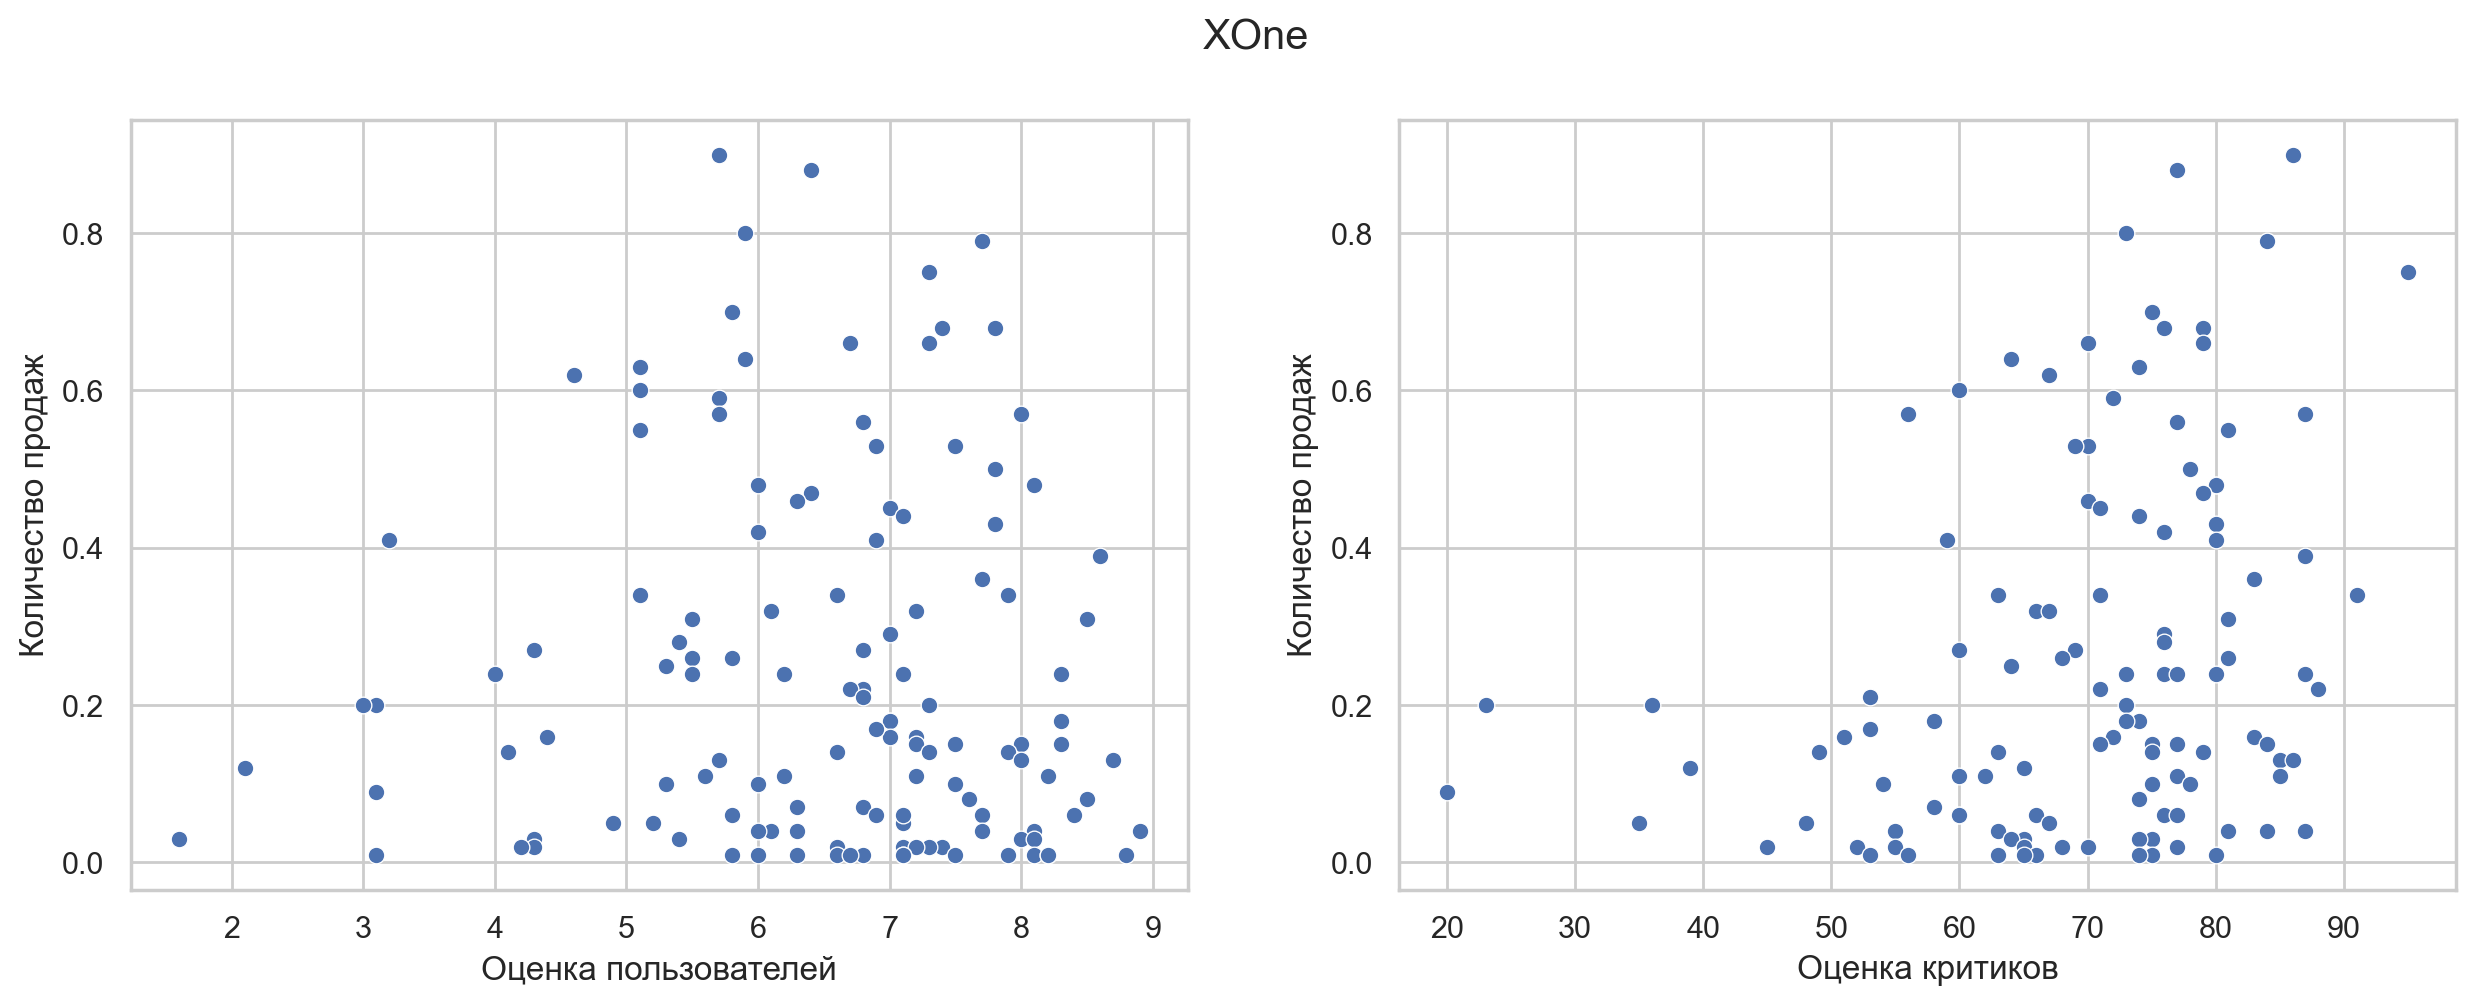

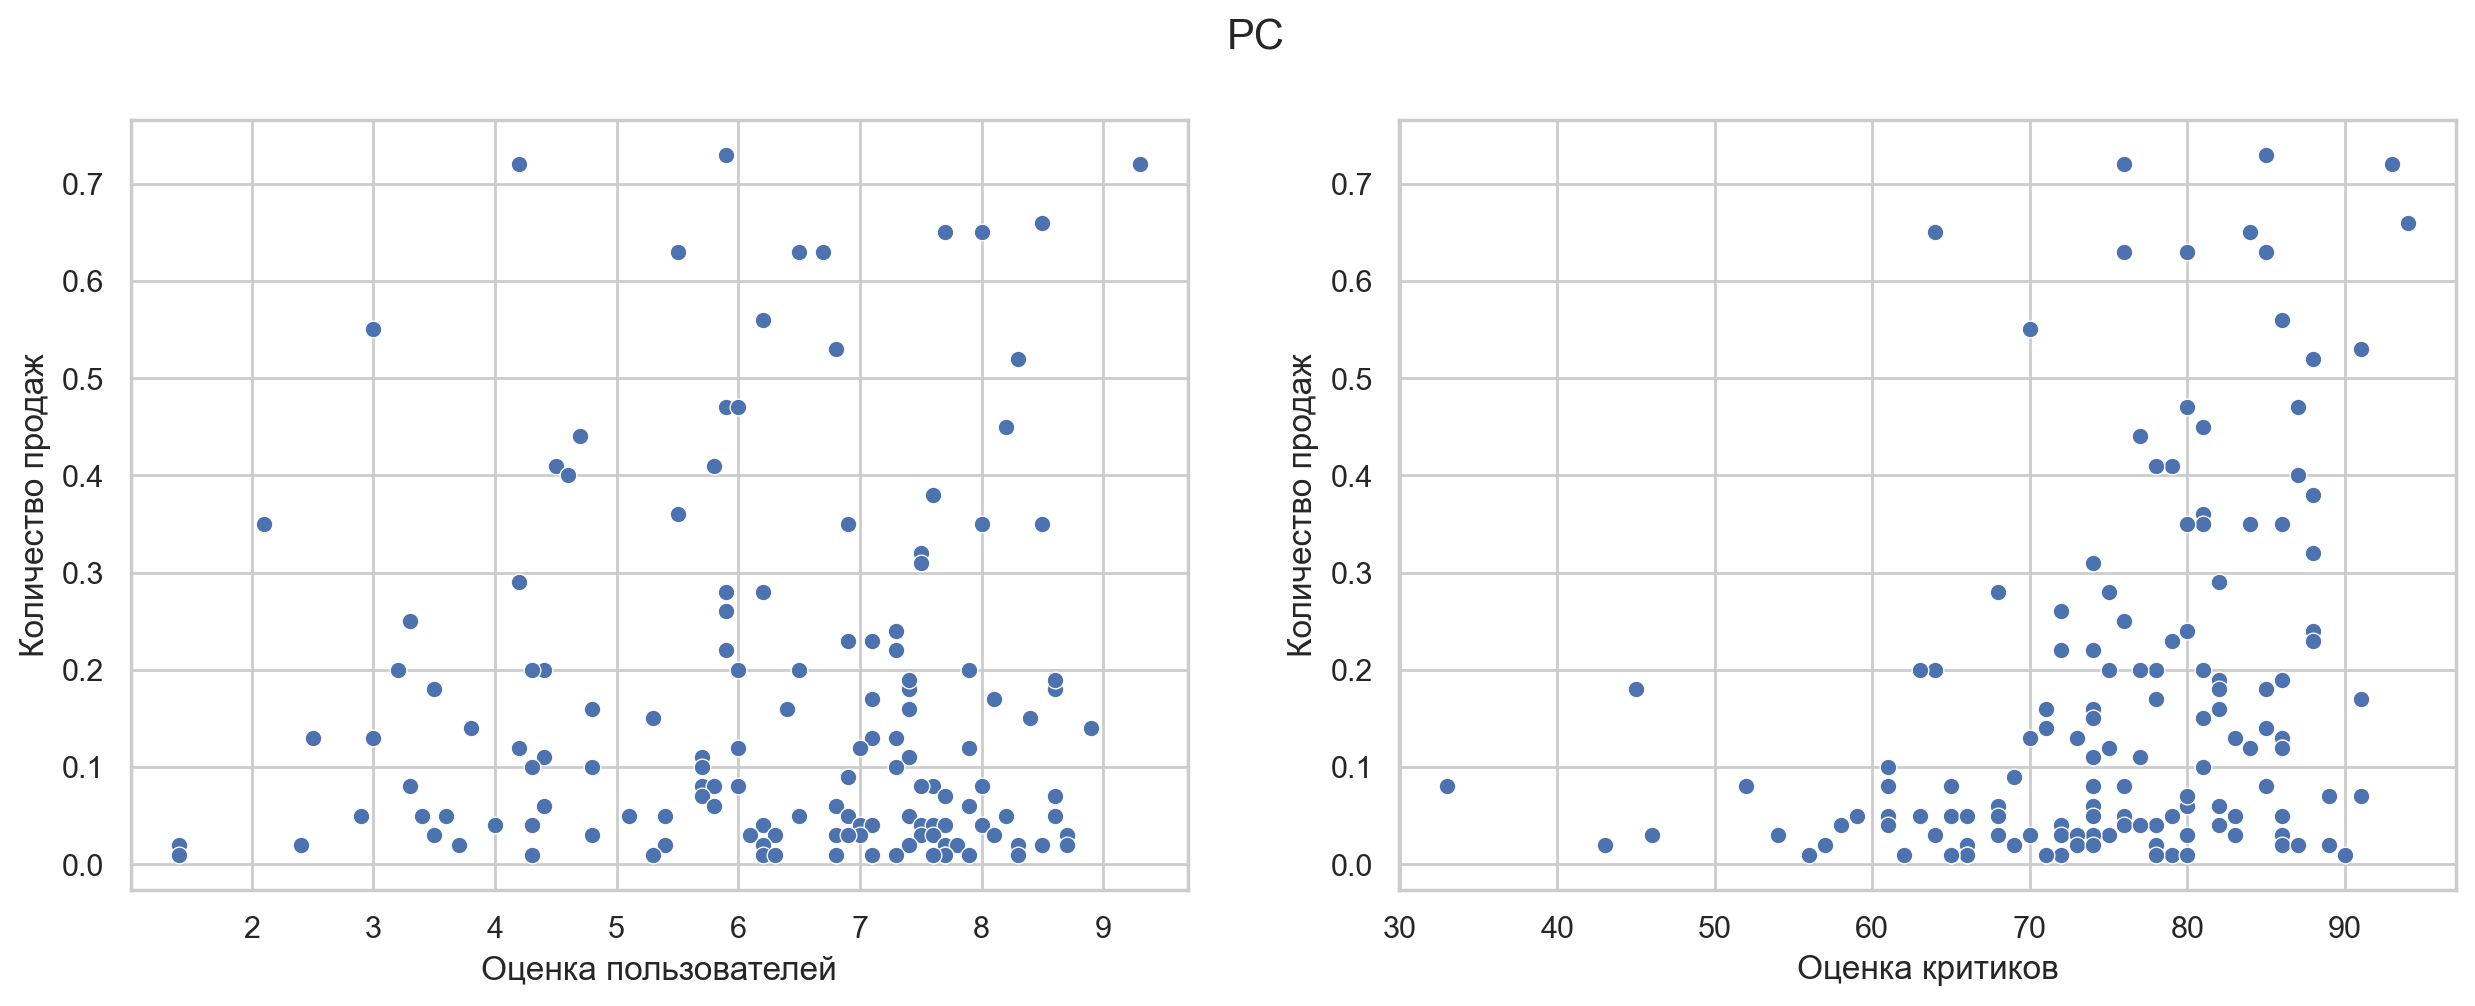

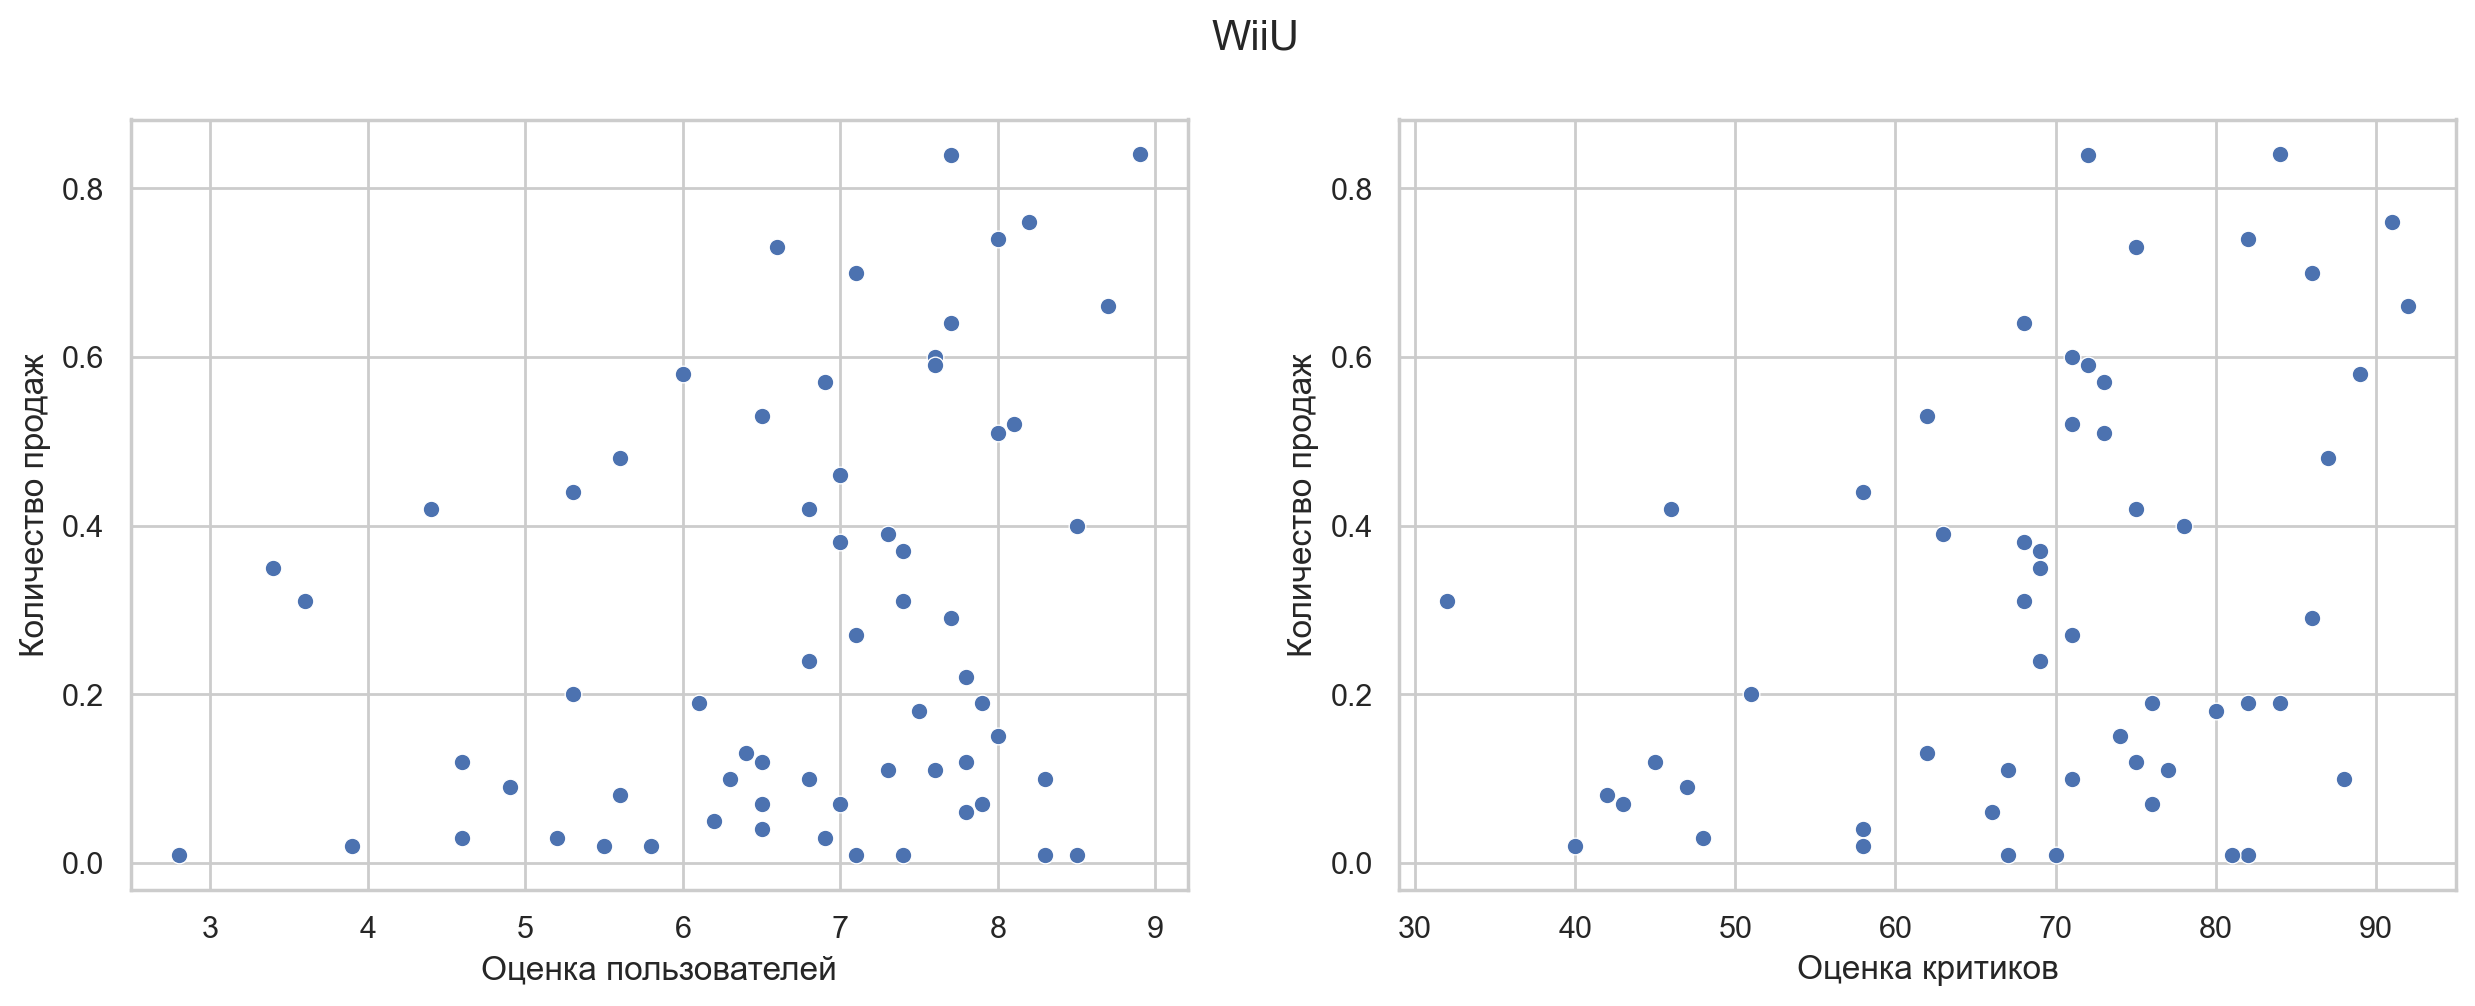

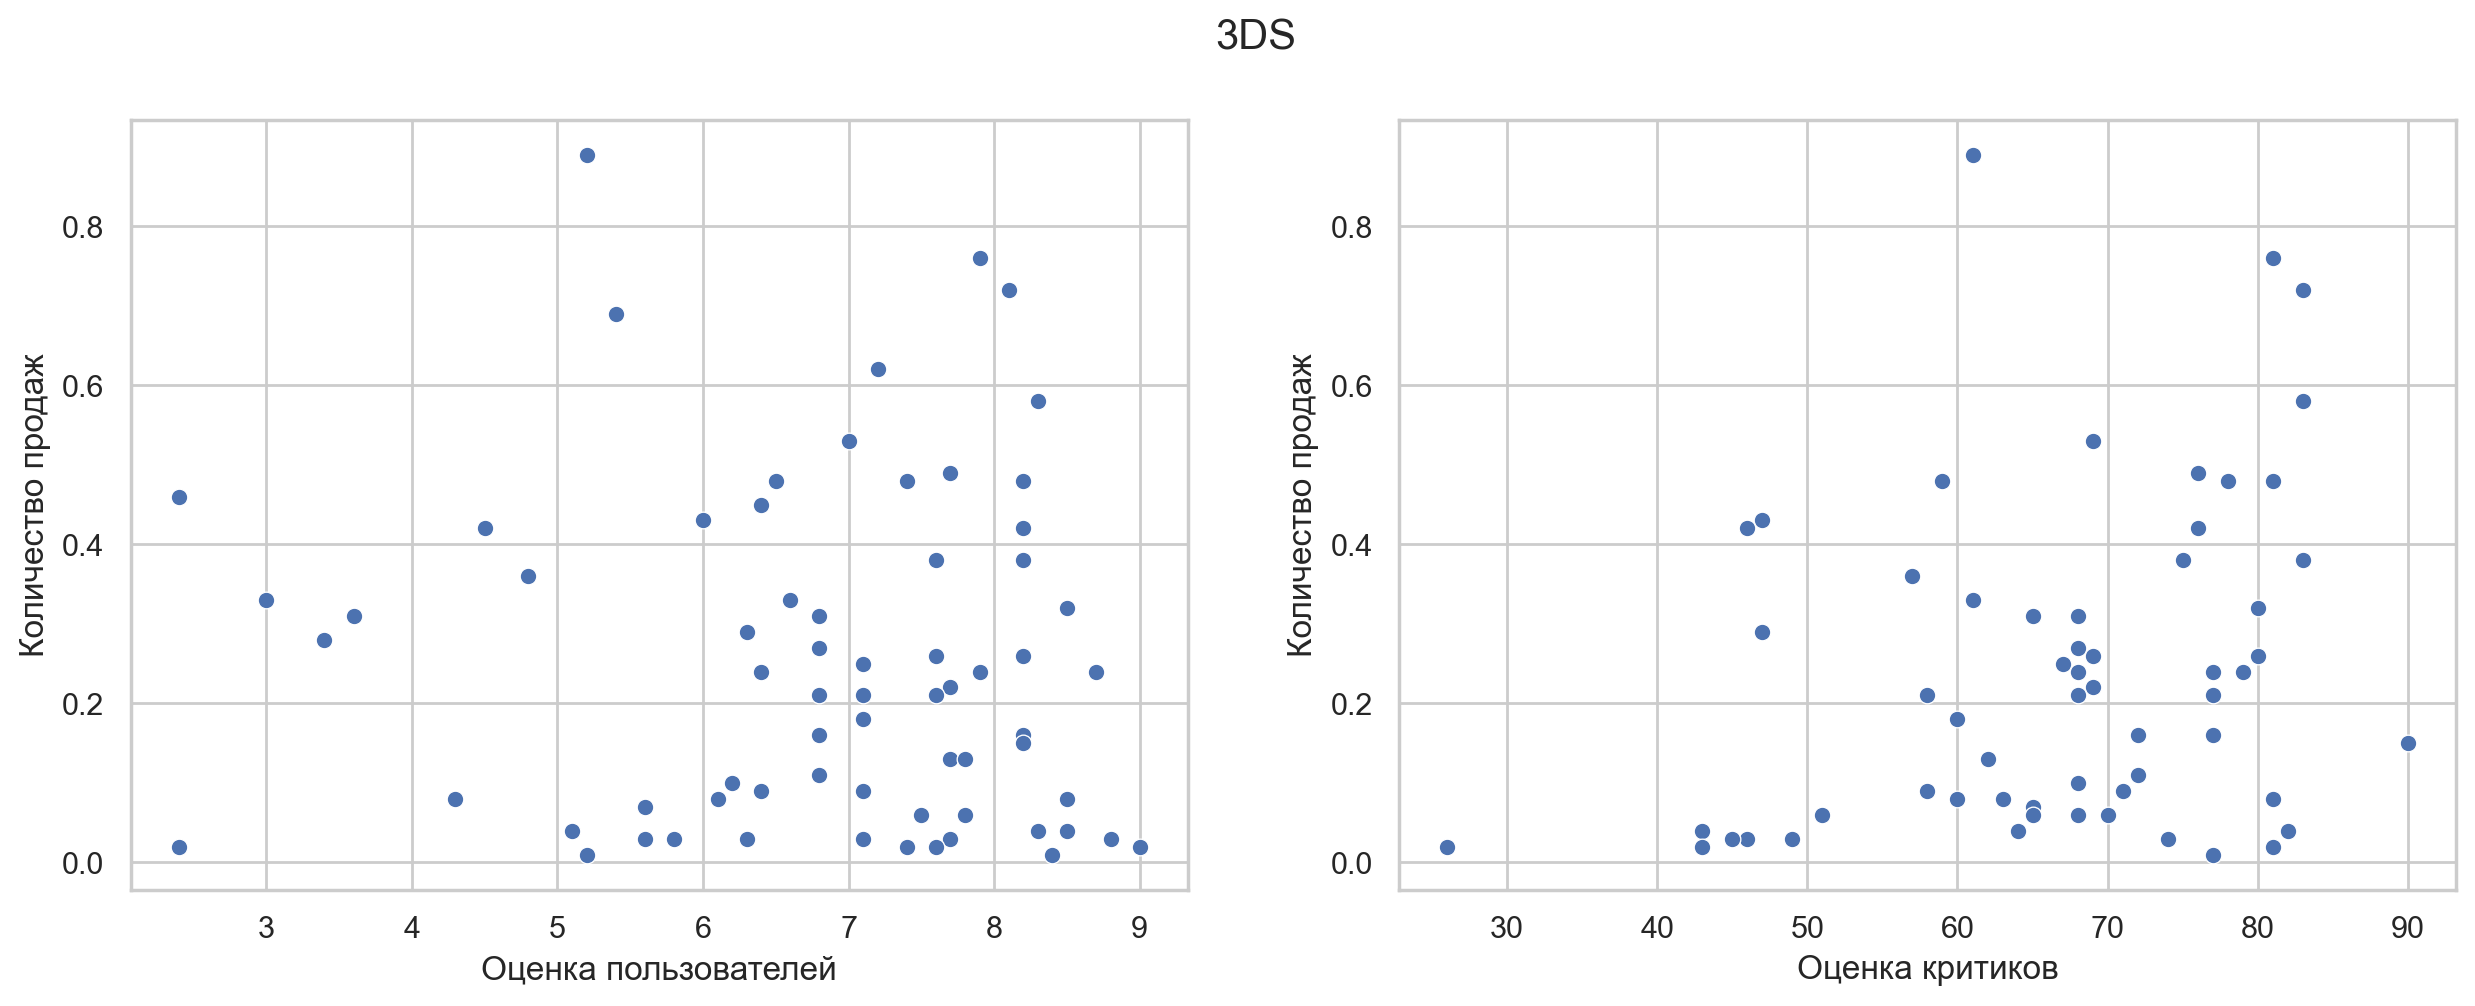

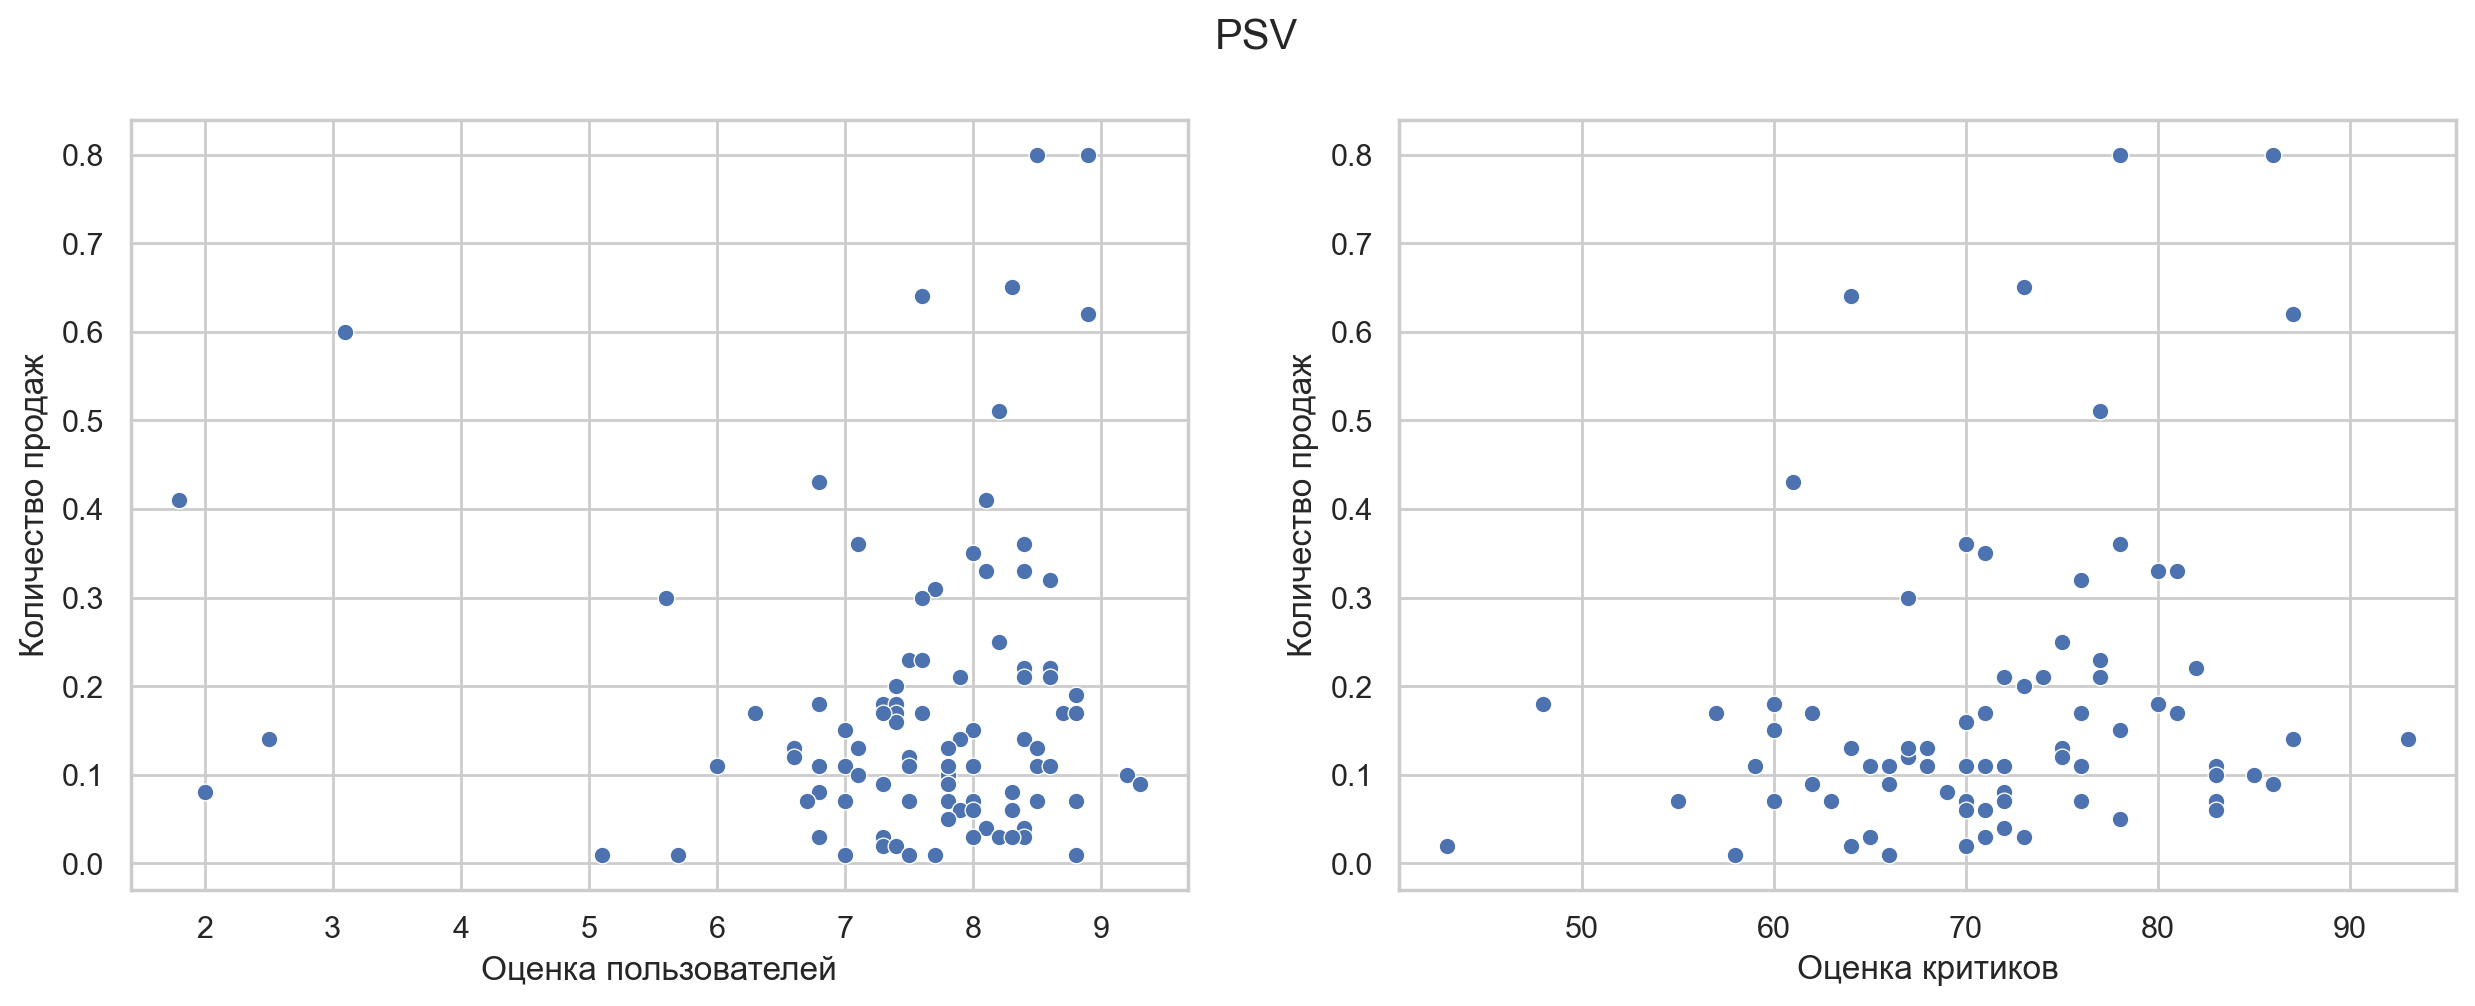

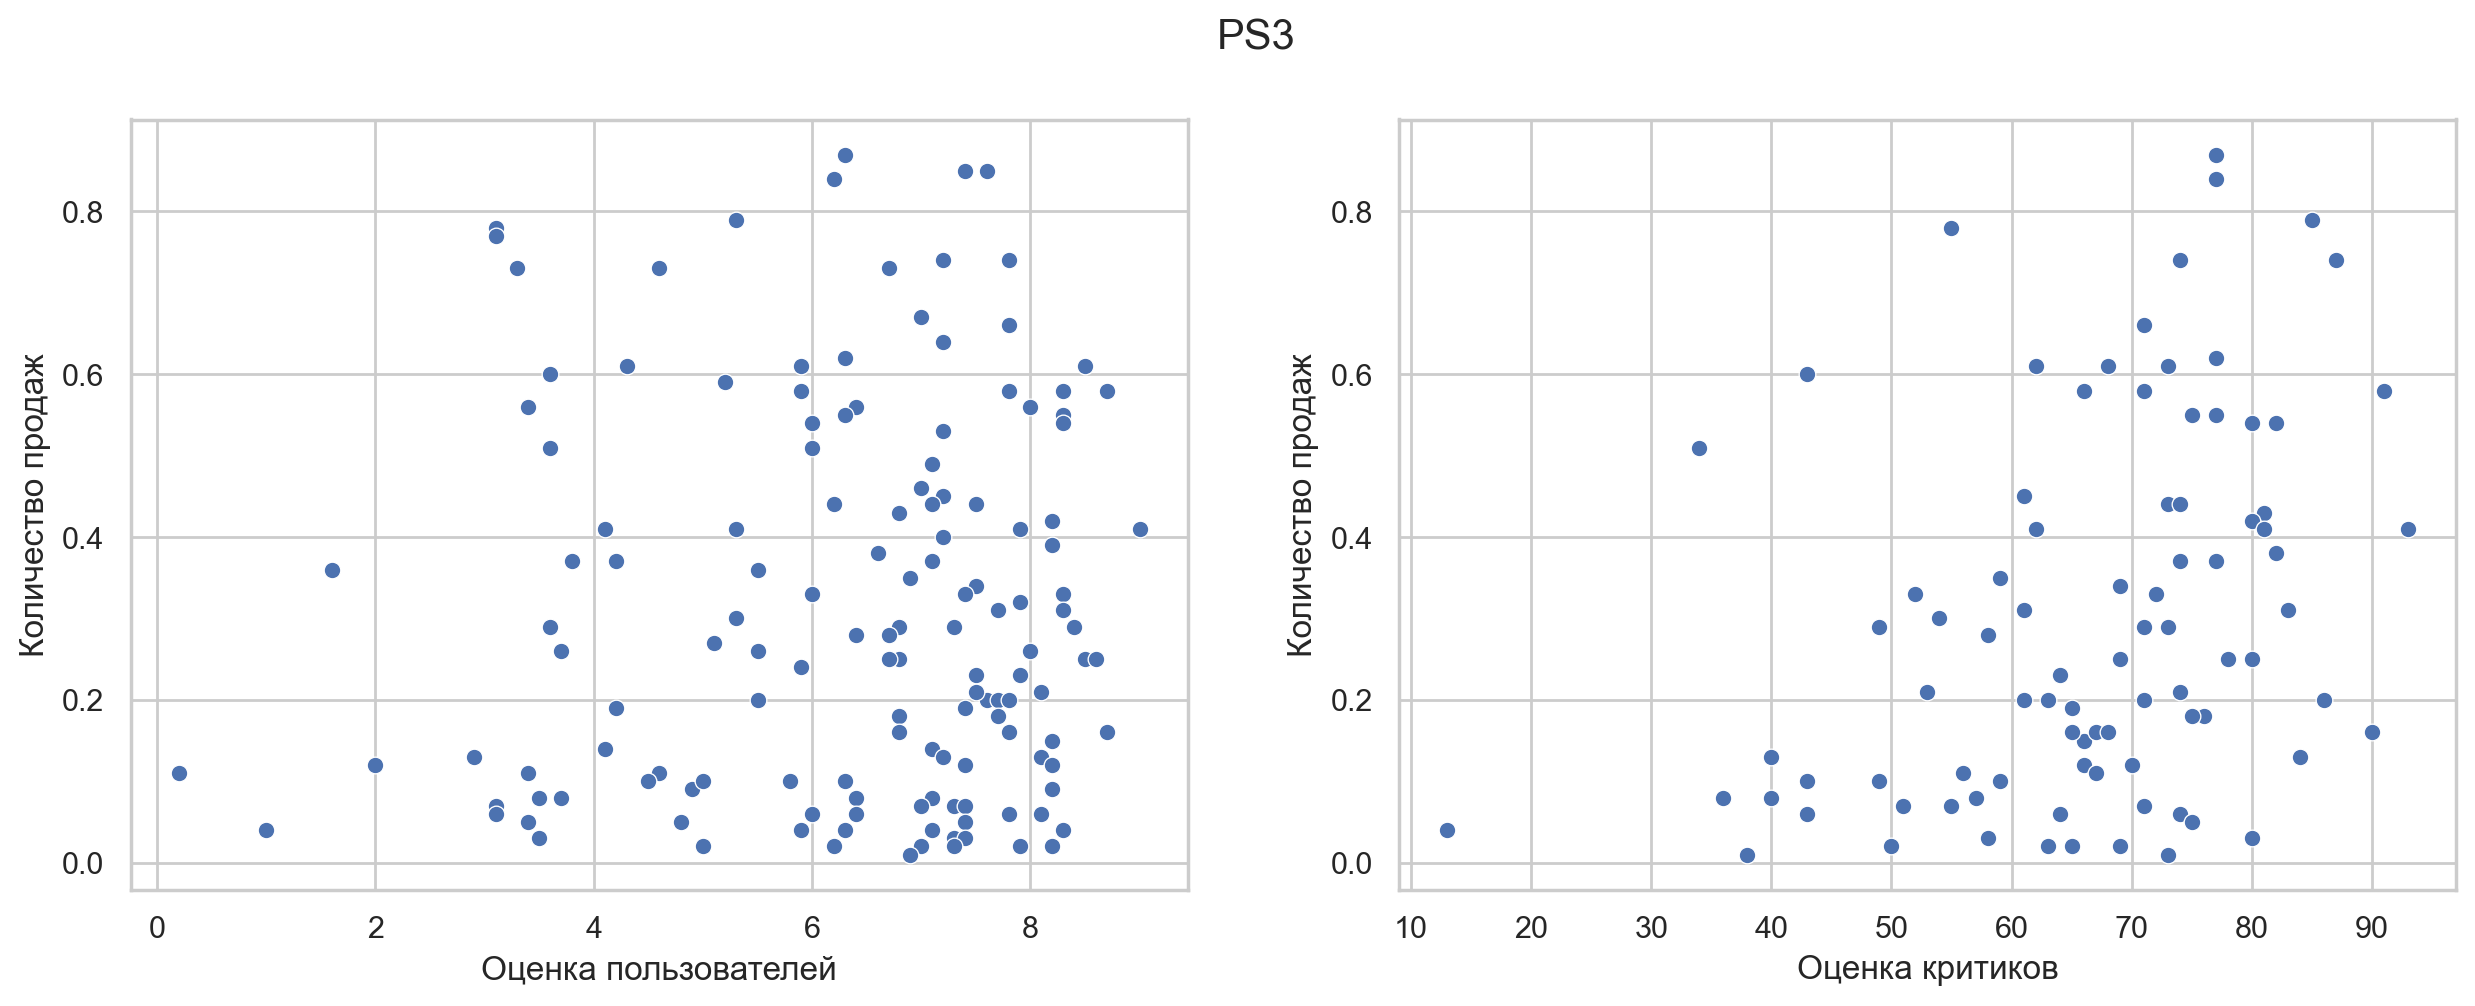

In [59]:
# с помощью цикла выведем все 7 графиков
for platform in list_of_top_7:
    platform_scatterplot(platform)

**Вывод:**

- На других платформах также наблюдаем умеренную связь между оценками критиков и продажами;
- Связь между оценками пользователей и продажами слабая у всех платформ;
- Исключением является WiiU, где корреляция между отзывами пользователей и продажами - умеренная;
- Возможно, покупатели прислушиваются больше к критикам, чем к оценкам других пользователей. Но это не распространяется на платформу WiiU.

### Оценка общего распределения игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [60]:
# создадим сводную таблицу продаж с группировкой по жанрам для актуальных платформ
data_top_7_platforms_genre = data_top_7_platforms.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc='sum').sort_values(by='total_sales', ascending=False)

data_top_7_platforms_genre = data_top_7_platforms_genre.reset_index().rename_axis(None, axis=1)
data_top_7_platforms_genre

genre  total_sales
0         Action       100.83
1   Role-Playing        42.57
2         Sports        33.85
3        Shooter        30.88
4           Misc        22.48
5      Adventure        14.25
6       Platform        10.06
7         Racing         9.49
8       Fighting         8.96
9       Strategy         6.73
10    Simulation         6.59
11        Puzzle         1.98

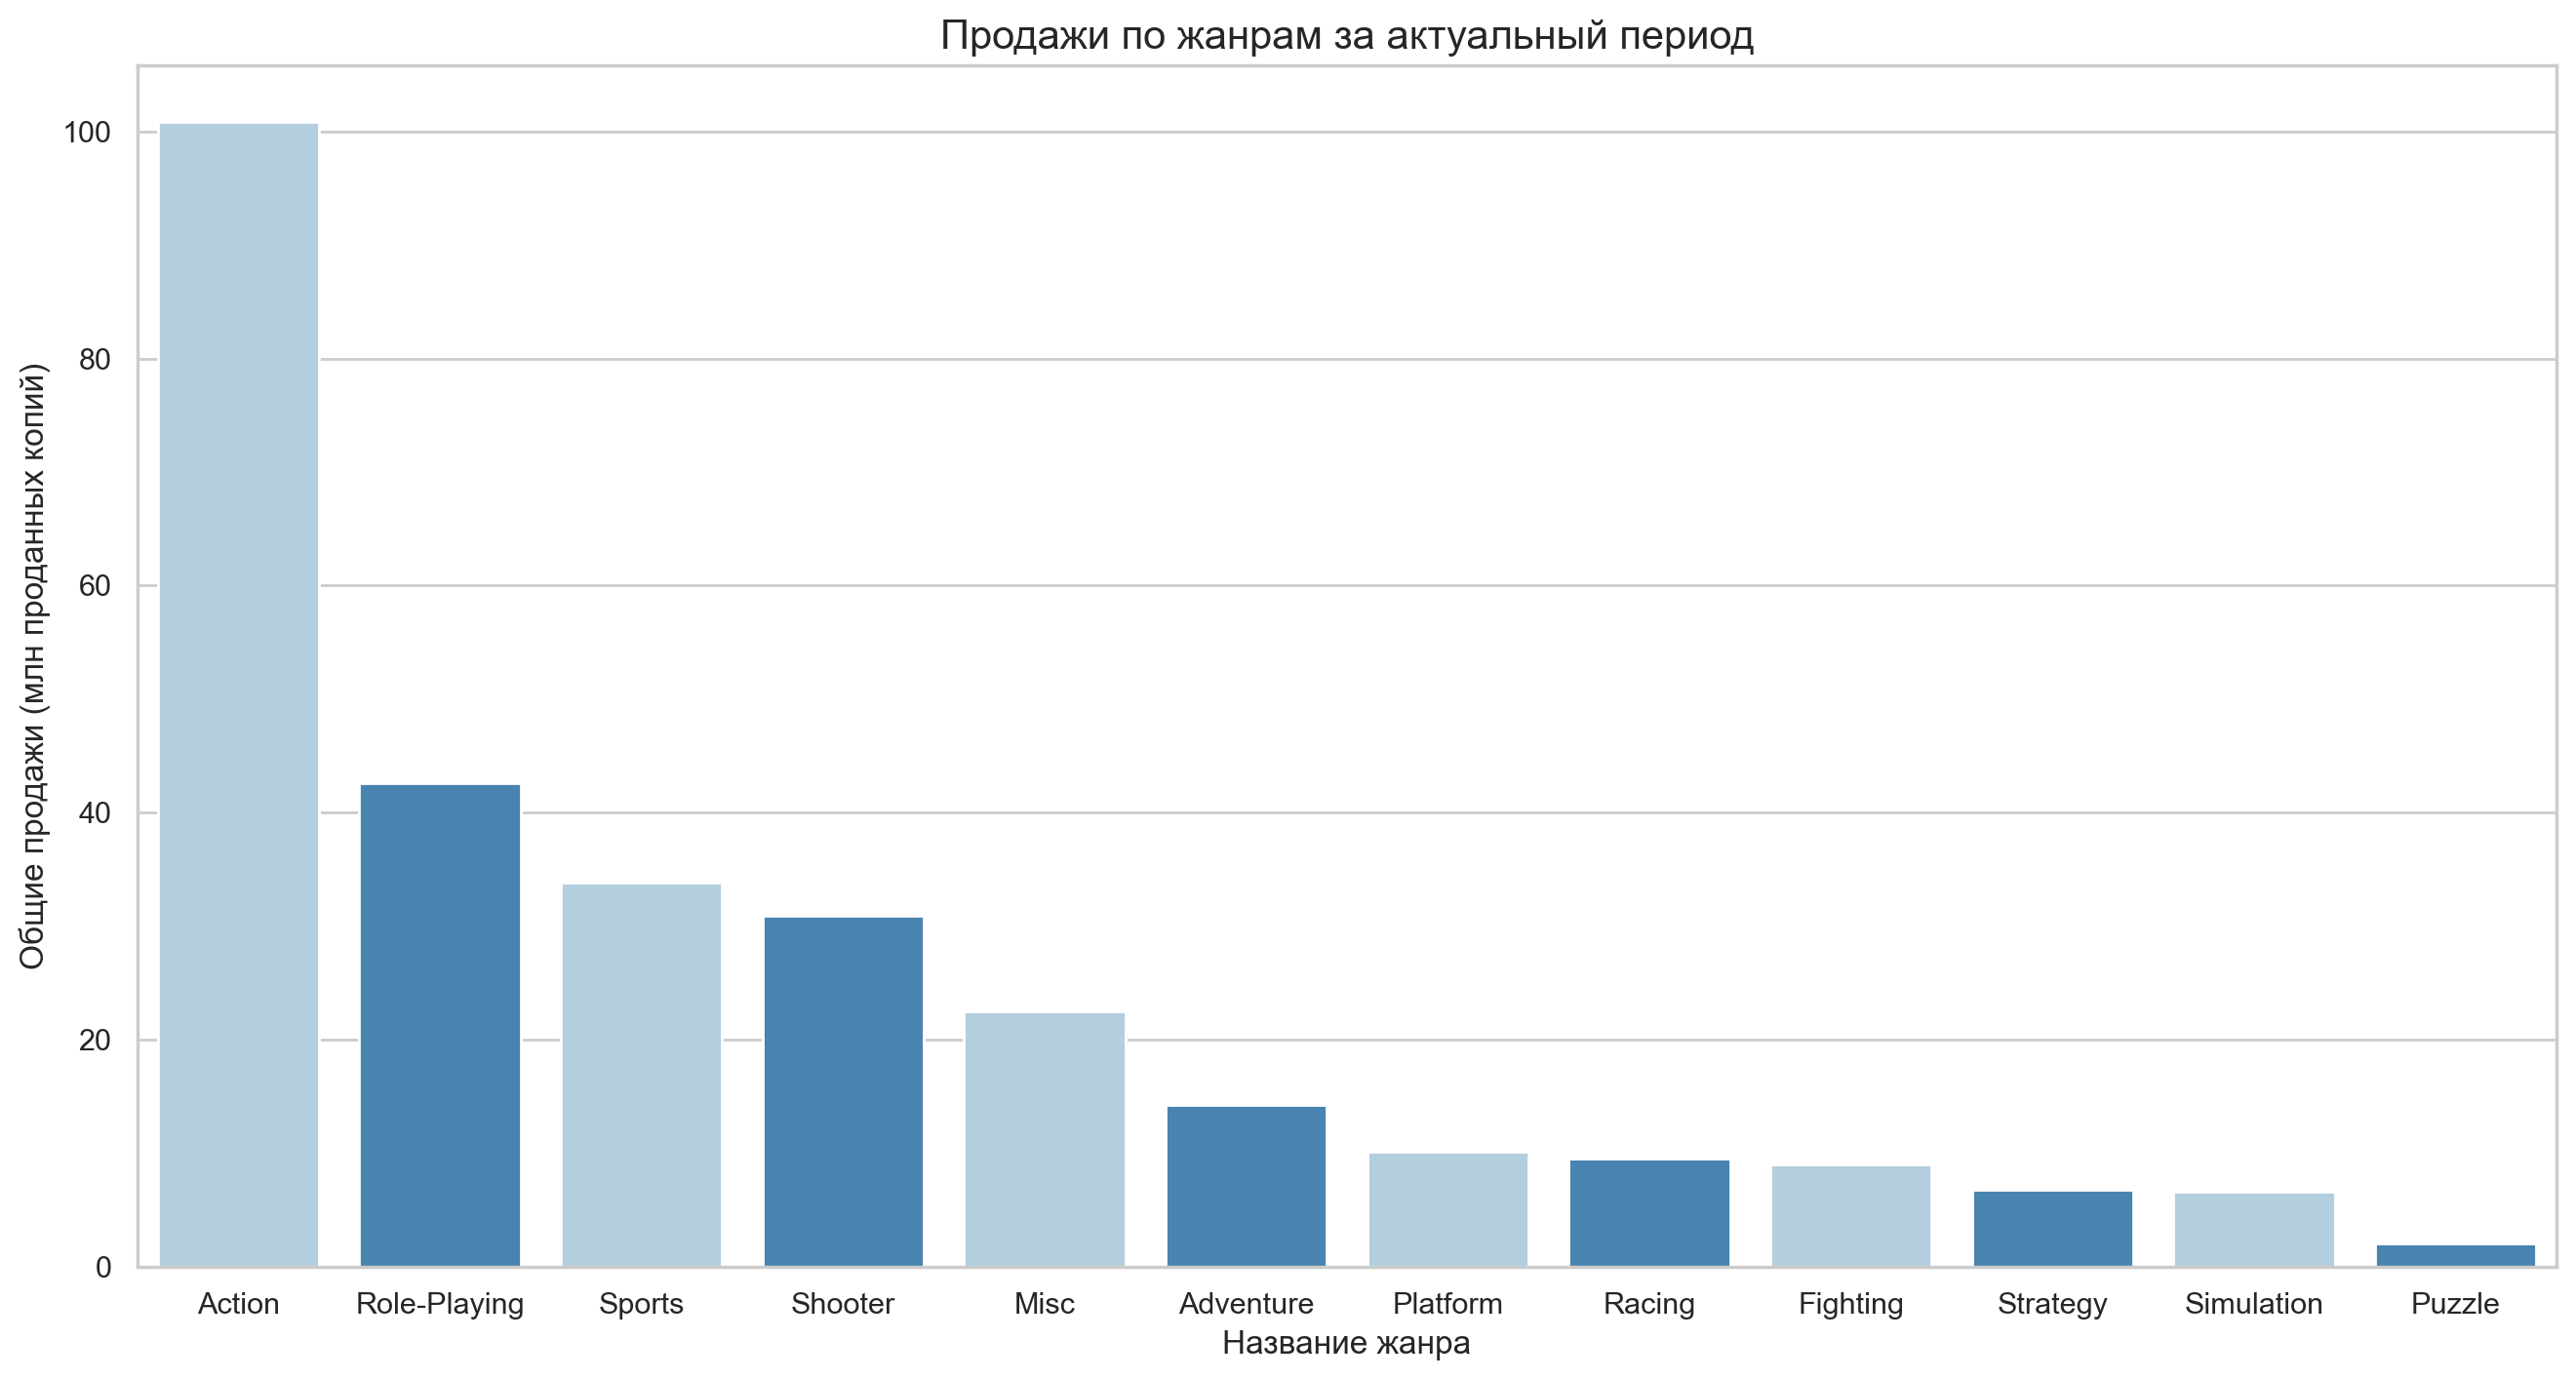

In [61]:
# построим распределение
plt.figure(figsize=(16, 8))

sns.barplot(x=data_top_7_platforms_genre['genre'], y=data_top_7_platforms_genre['total_sales'], palette = 
            sns.color_palette('Blues', 2))

# добавим заголовок и подписи осей
plt.title("Продажи по жанрам за актуальный период", fontsize=15)
plt.xlabel("Название жанра", fontsize=12)
plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)
plt.show()

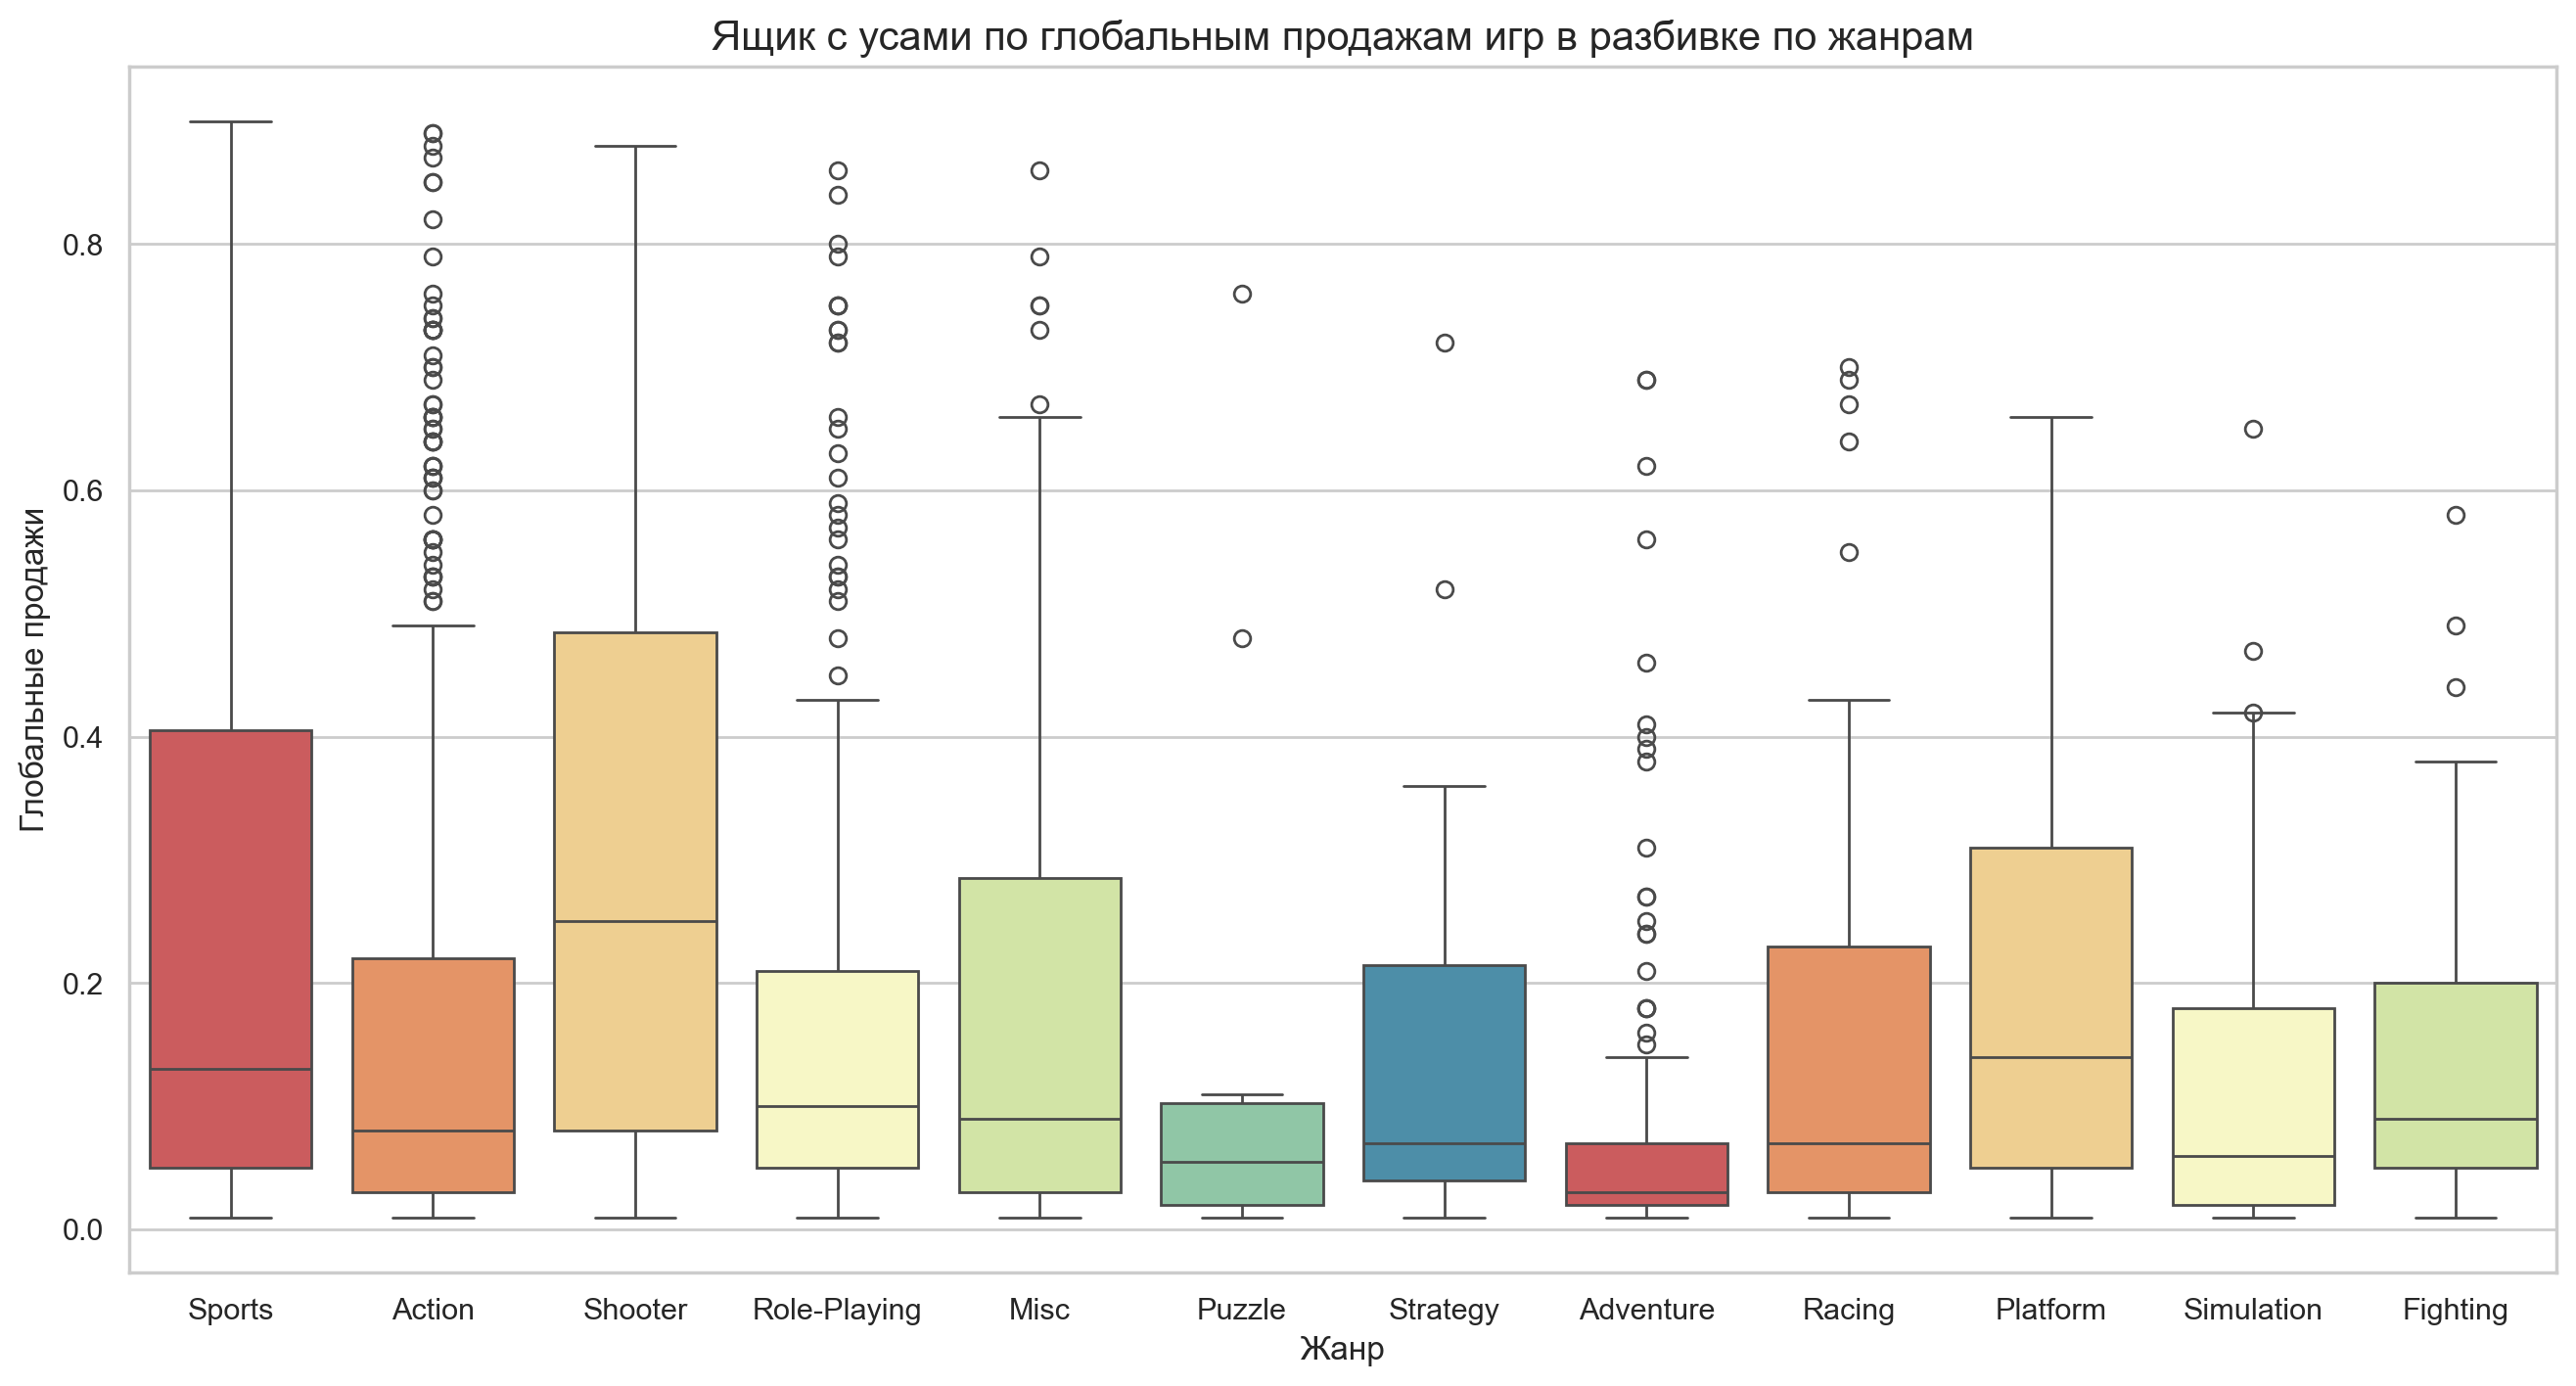

In [62]:
# построим график
plt.figure(figsize=(16, 8))

sns.boxplot(data=data_top_7_platforms, x='genre', y='total_sales', palette = sns.color_palette('Spectral', 7))

# добавим заголовок и подписи осей
plt.title('Ящик с усами по глобальным продажам игр в разбивке по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

**Вывод:**

- Из графика видим, что стабильно высокие продажи приносят игры жанров 'Shooter', 'Platform' и 'Sports'. Хуже всего продаются игры жанра 'Adventure'. 
- Судя по общему количеству проданных копий, лидирующим является жанр 'Action'. Вероятно, это связано с множеством мелких игр с низкими продажами.

### Вывод "Исследовательский анализ данных": 

1. Количество выпущенных игр набирает рост в 90-е годы. С начала 2000-х рост заметно усиливается и достигает максимума в 2008 году. После чего наался спад количества консольных игр, именно тогда мобильные платформы получили свое развитие.

2. Самые популярные платформы за весь период: PlayStation 2, XBOX 360, PlayStation 3, Nintendo Wii, DS и PlayStation.

3. Игровые платформы существуют около 10 лет. Все лидирующие платформы к 2016 году потеряли свою актуальность. Из платформ, которые к 2016 году остались на плаву, можно отметить: PlayStation 4, XBOX One, Nintendo 3DS, PC, Nintendo Wii U, PlayStation Vita, PlayStation 3.

4. У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.

5. Стабильно высокие продажи приносят игры жанров 'Shooter', 'Platform' и 'Sports'. Хуже всего продаются игры жанра 'Adventure'.

## Анализ портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5)
2. Самые популярные жанры (топ-5)
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определение популярных платформ для пользователей каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [63]:
# создадим сводную таблицу суммарного числа проданных копий для каждого региона в разбивке по платформам
data_by_region = actual_data.pivot_table(
    index='platform', 
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').sort_values(by='na_sales', ascending=False)

data_by_region = data_by_region[
    (data_by_region['na_sales'] > 10) | 
    (data_by_region['eu_sales'] > 10) |
    (data_by_region['jp_sales'] > 10)].reset_index().rename_axis(None, axis=1)

data_by_region.head()

platform  eu_sales  jp_sales  na_sales
0      PS4    141.09     15.96    108.74
1     XOne     51.59      0.34     93.12
2     X360     42.52      0.51     81.66
3      PS3     67.81     23.35     63.50
4      3DS     30.96     67.81     38.20

<Figure size 3200x1600 with 0 Axes>

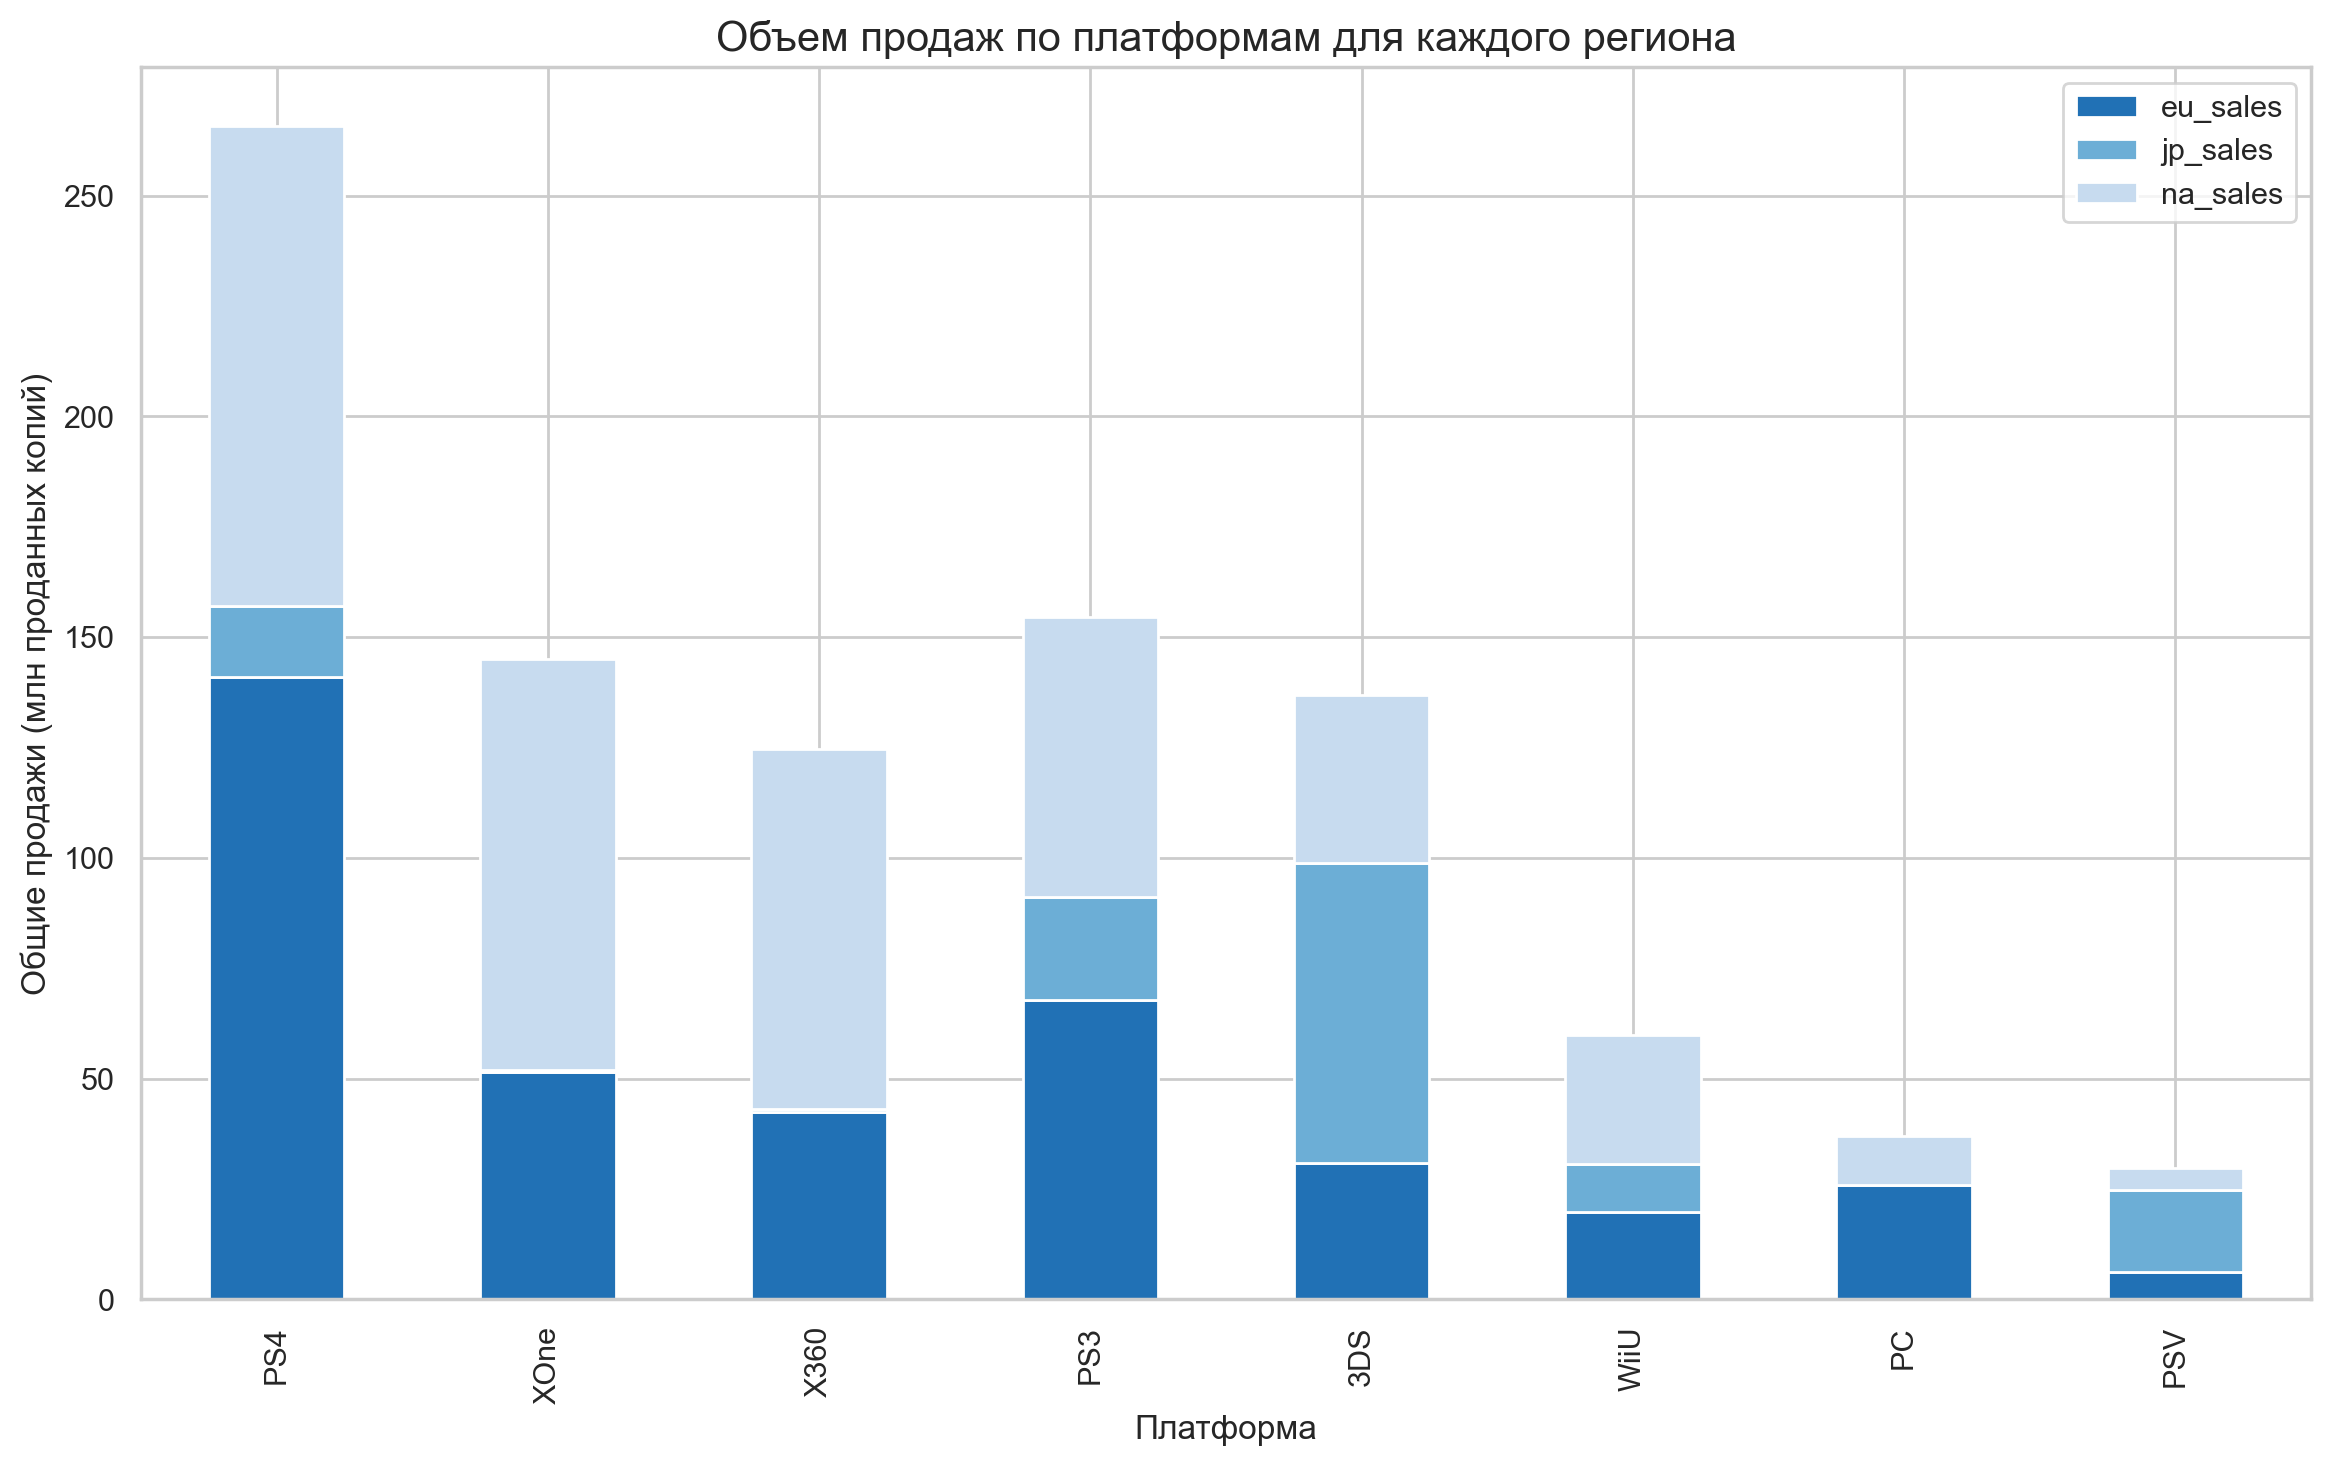

In [64]:
# построим распределение объема продаж по платформам для каждого региона
plt.figure(figsize=(16, 8))

data_by_region.plot(kind='bar', x='platform', stacked=True, figsize=(14,8), 
                        color = sns.color_palette('Blues_r', 3))

# добавим заголовок и подписи осей
plt.title("Объем продаж по платформам для каждого региона", fontsize=15)
plt.xlabel("Платформа", fontsize=12)
plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)
plt.show()

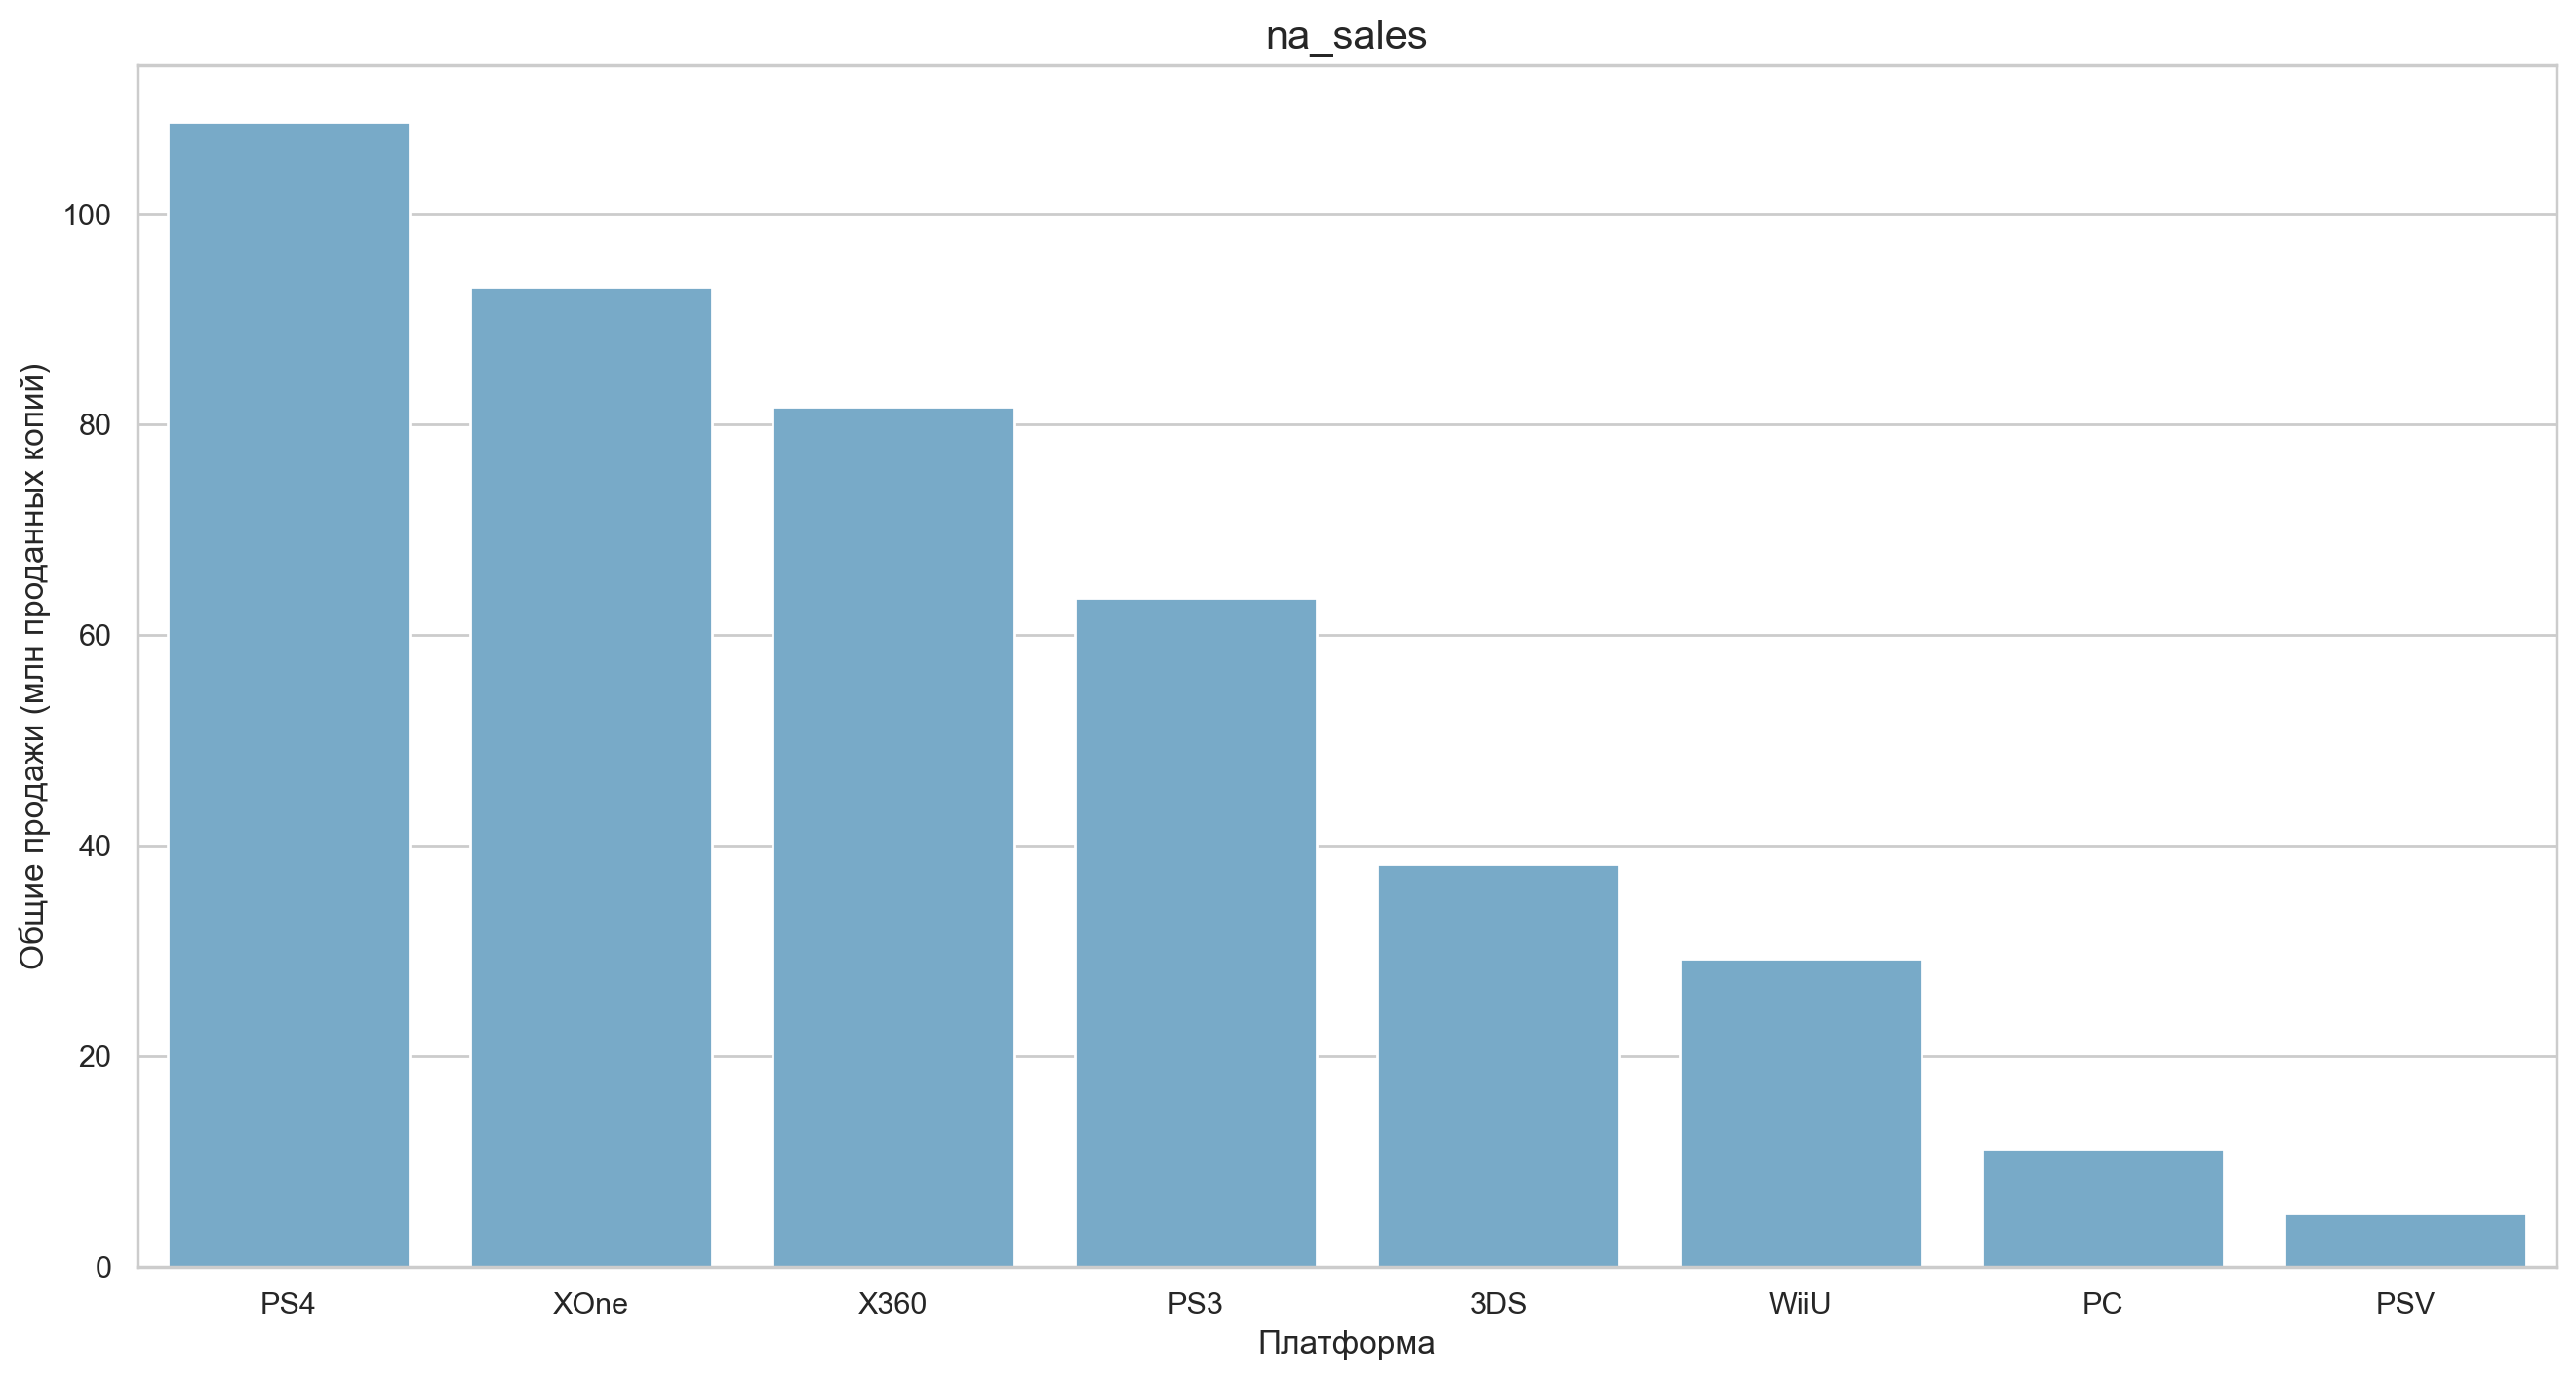

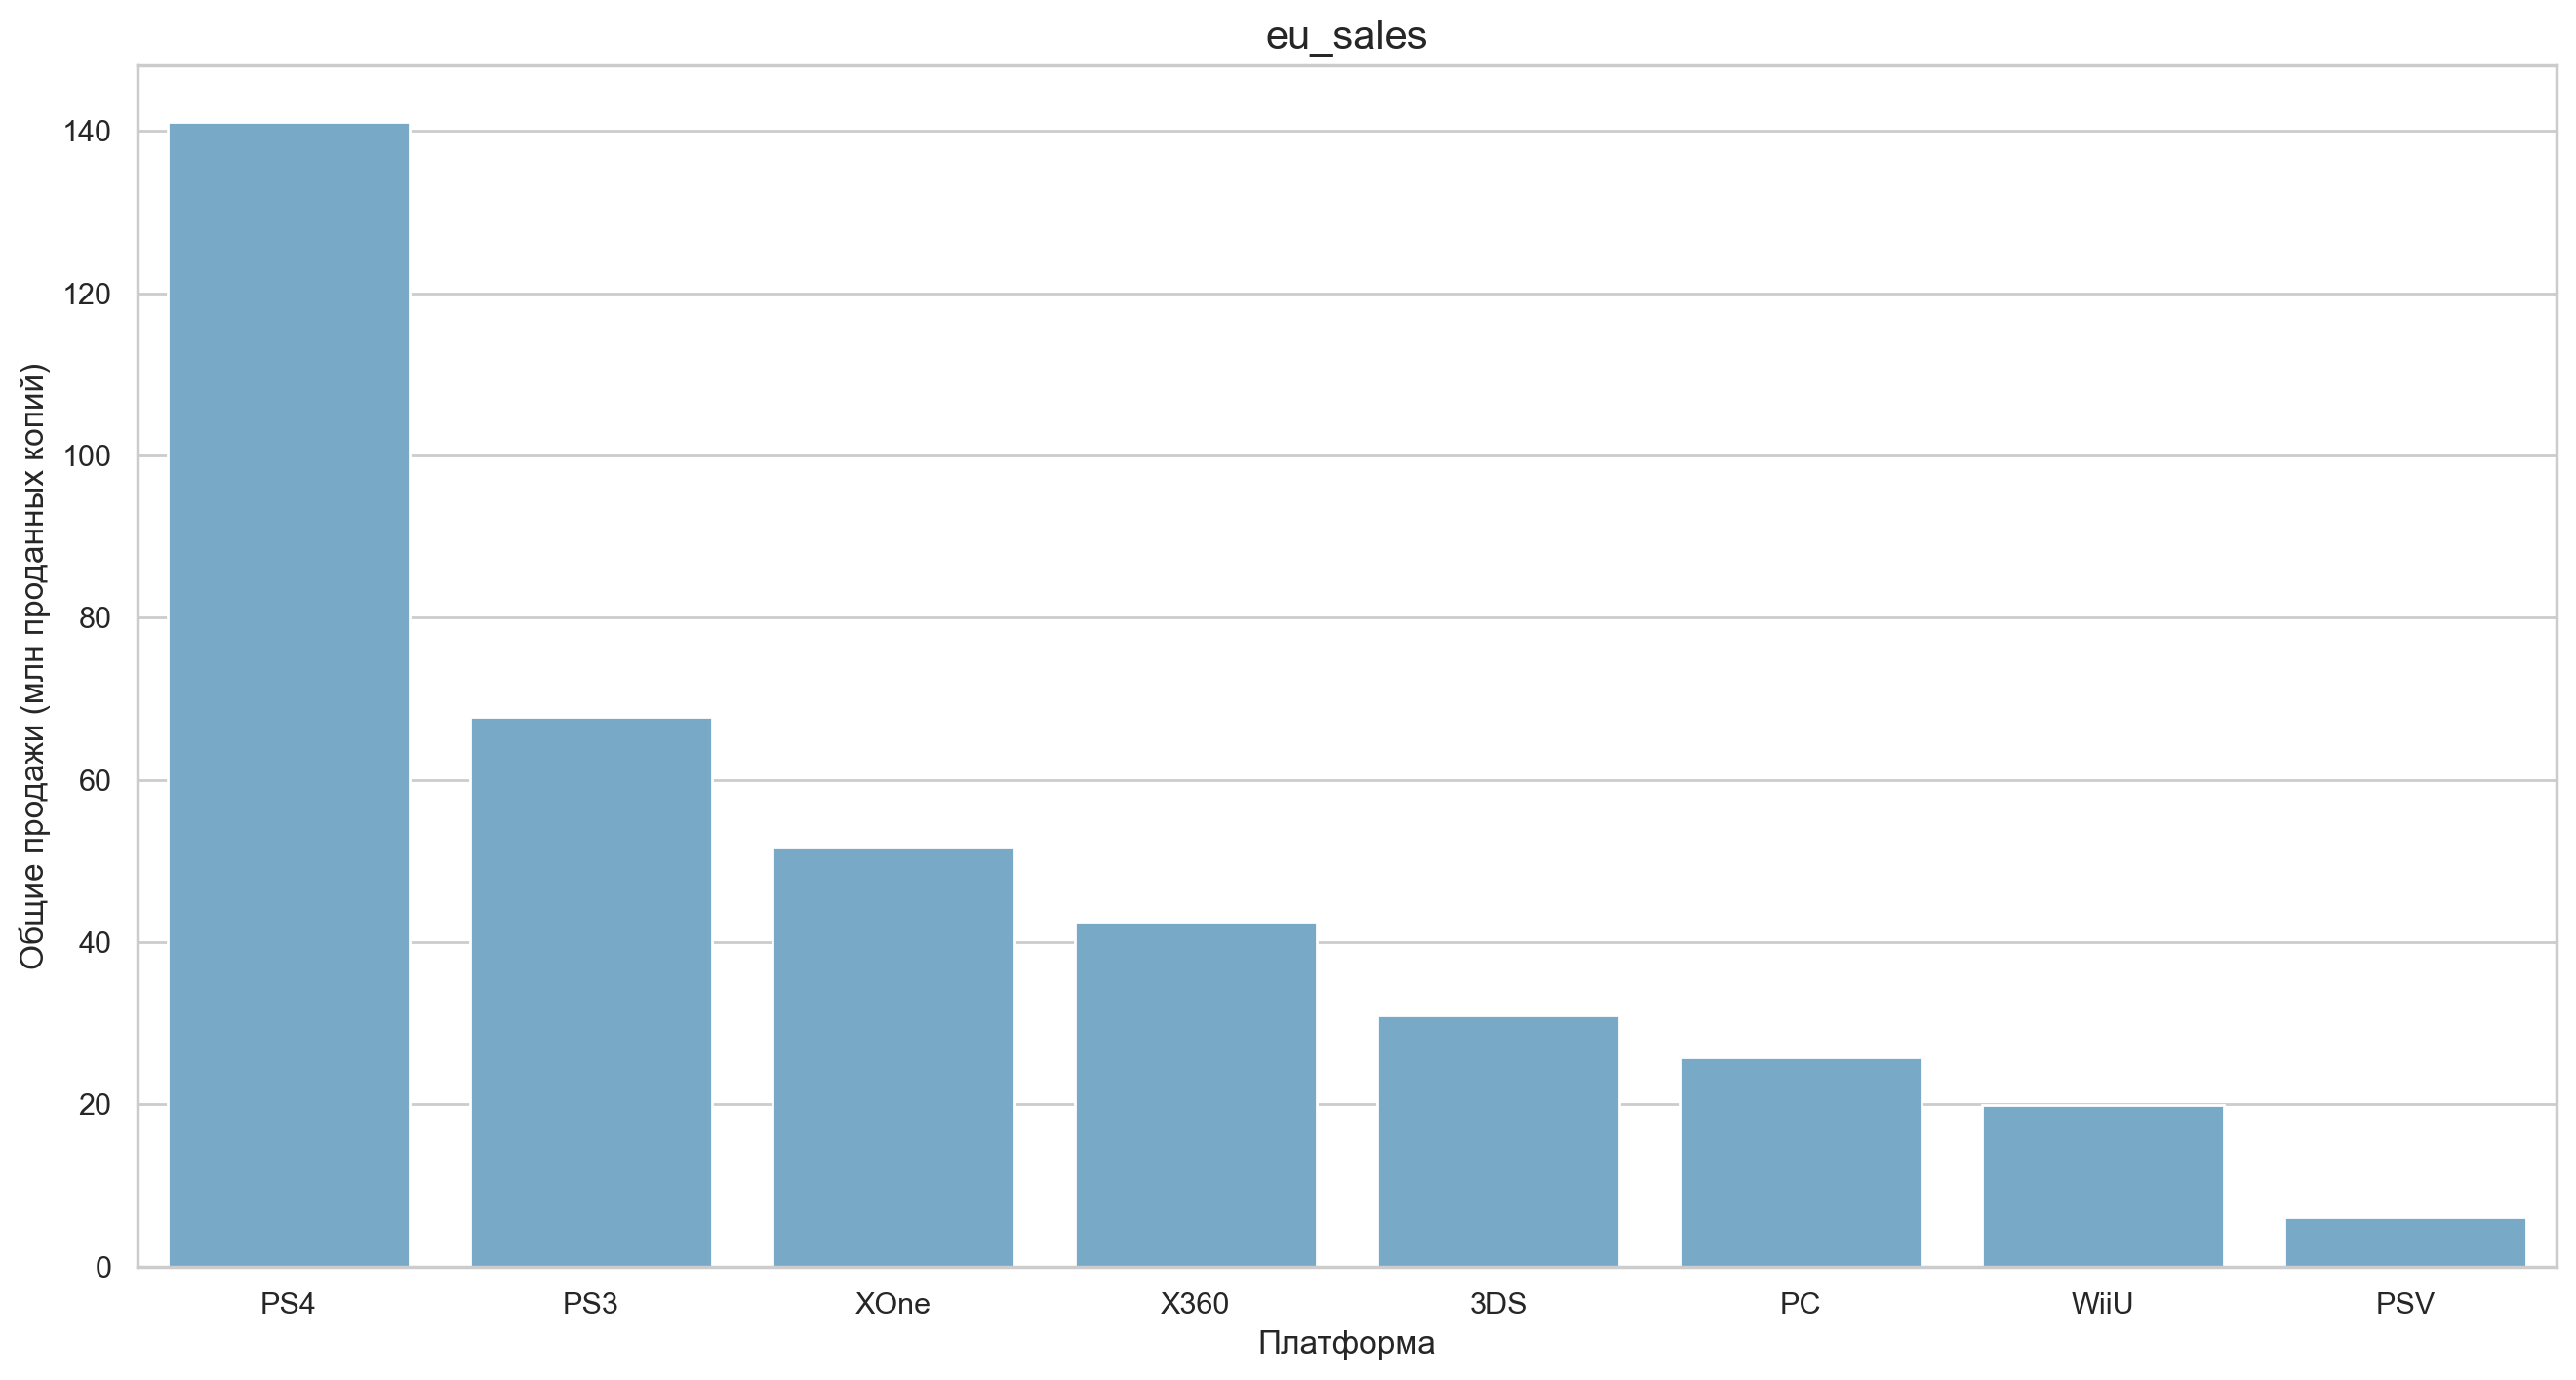

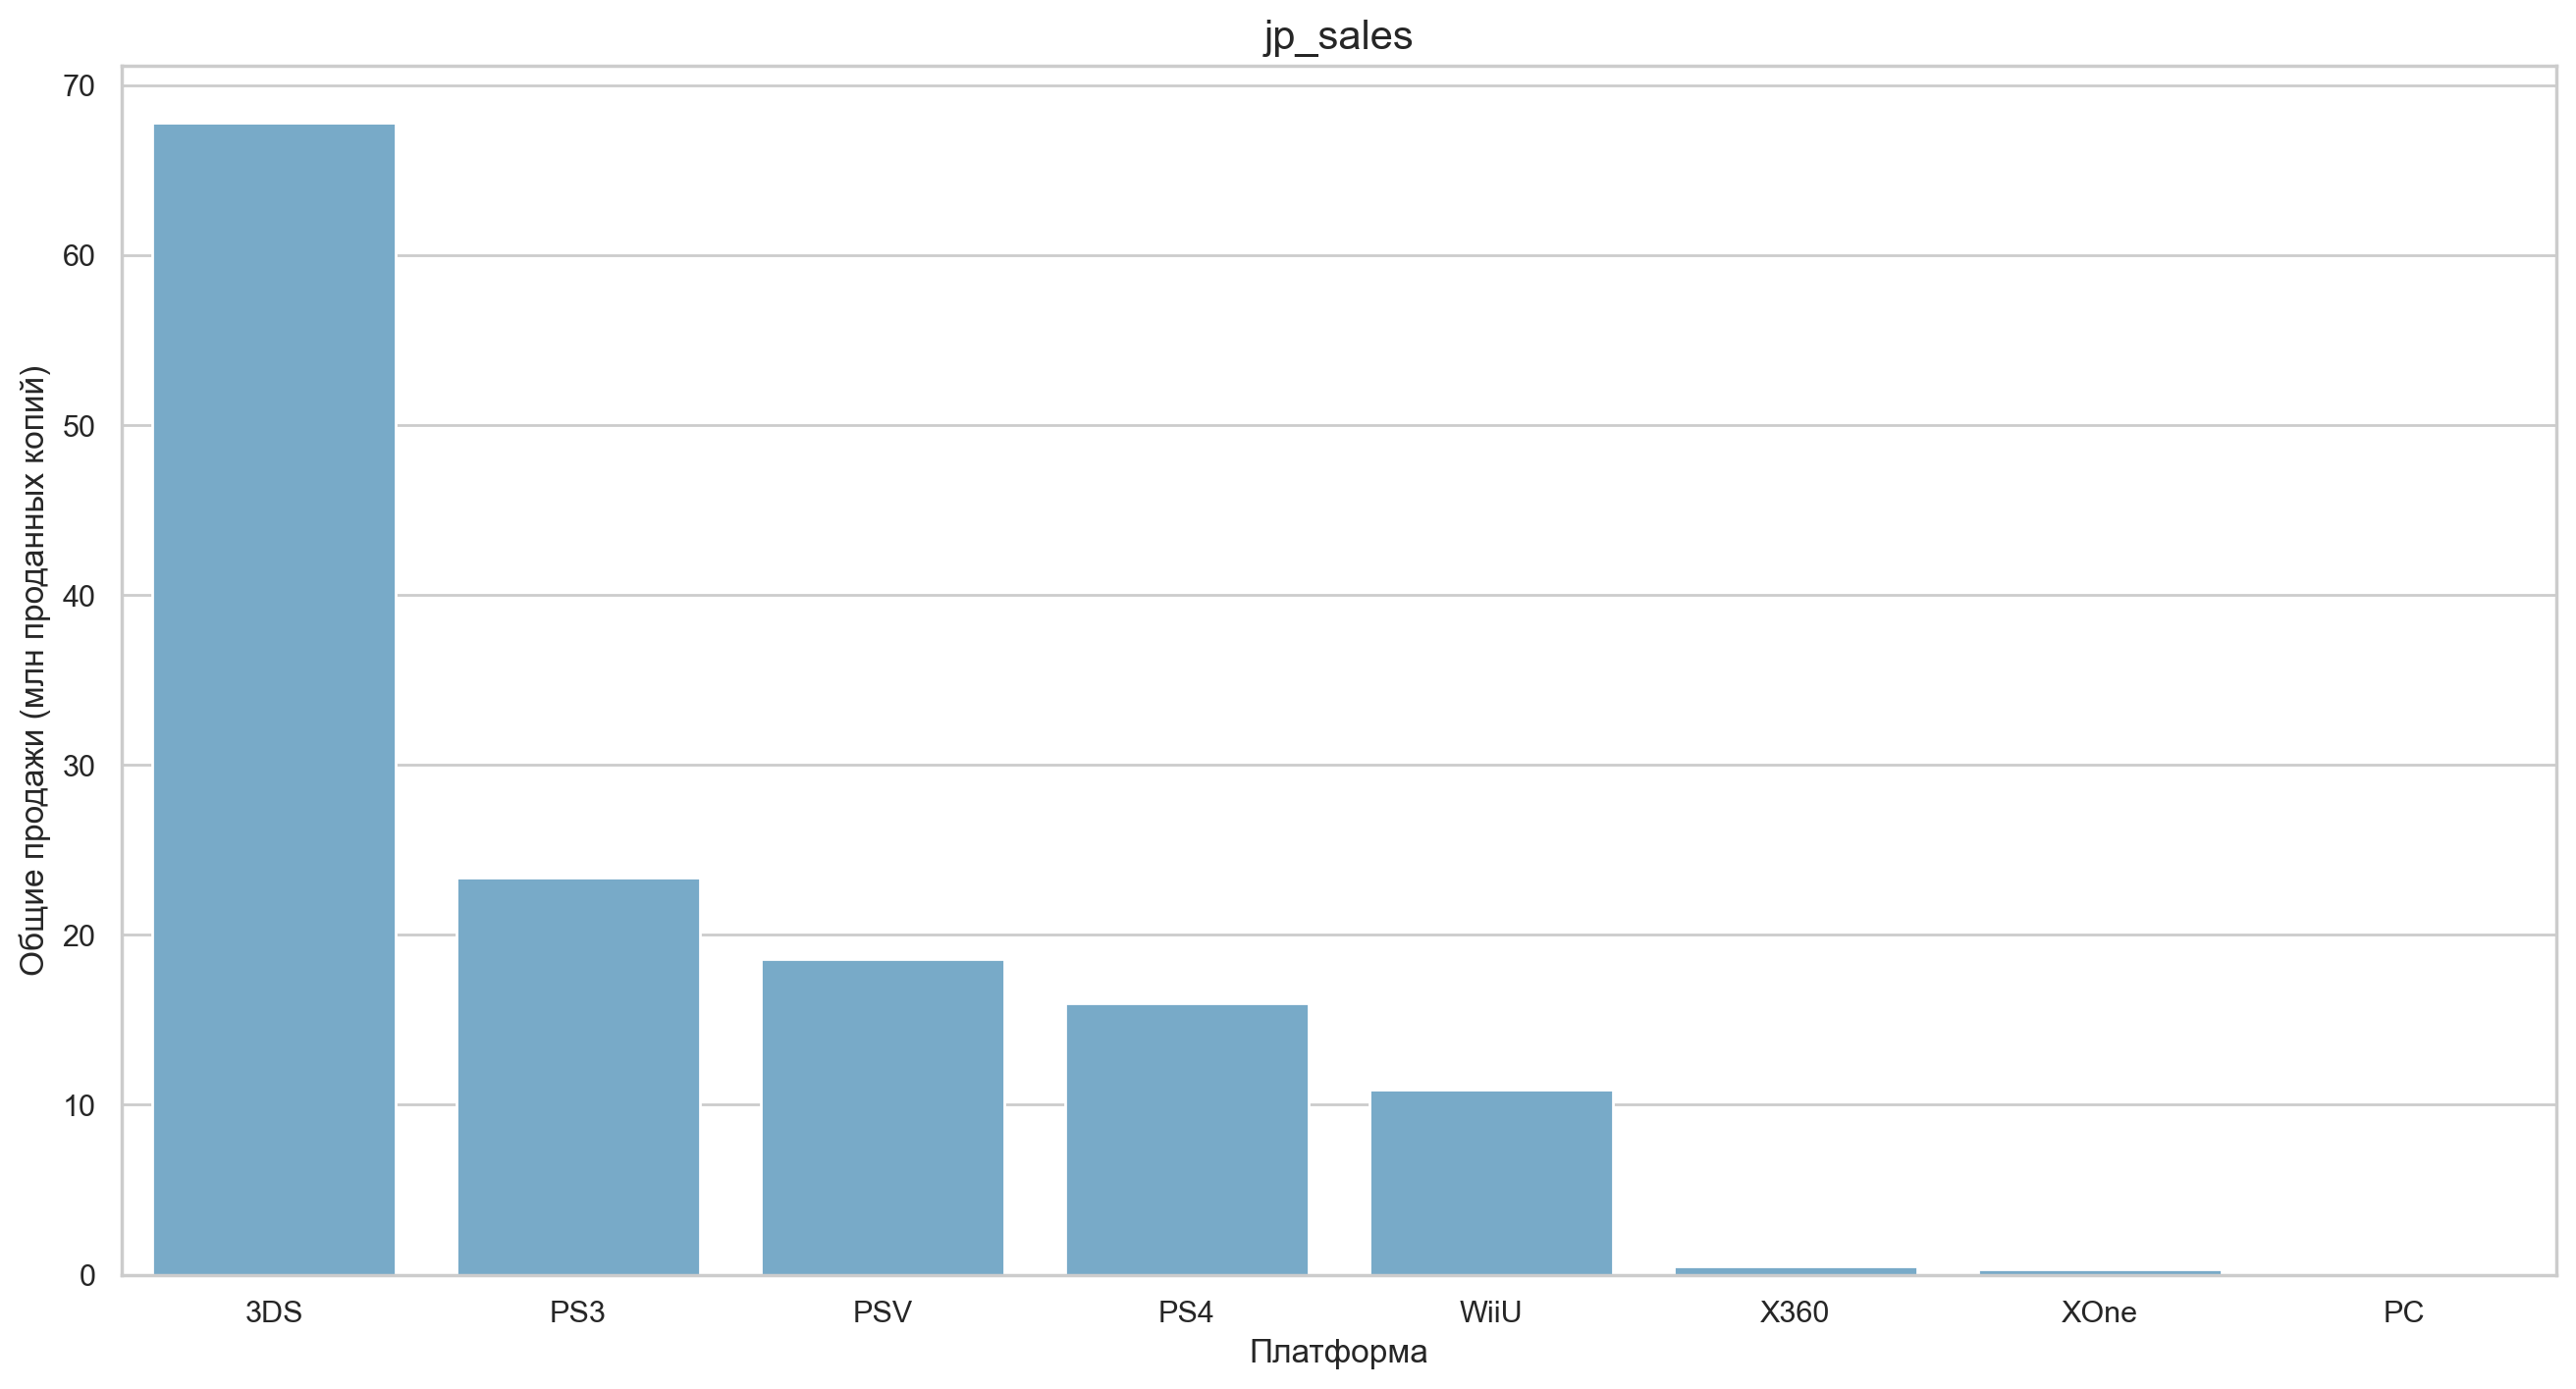

In [65]:
# построим отдельные распределения
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    plt.figure(figsize=(16, 8))
    data_by_region = data_by_region.sort_values(by=region, ascending=False)
    sns.barplot(x=data_by_region['platform'], y=data_by_region[region], 
                palette = sns.color_palette('Blues', 1))
    plt.title(f"{region}", fontsize=15)
    plt.xlabel("Платформа", fontsize=12)
    plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)
    plt.show()

**Вывод:**

1. Топ-5 популярных платформ для пользователей `Северной Америки`:
 - PlayStation 4;
 - Xbox One;
 - Xbox 360;
 - PlayStation 3;
 - Nintendo 3DS.
 

2. Топ-5 популярных платформ для пользователей `Европы`:
 - PlayStation 4;
 - PlayStation 3;
 - Xbox One;
 - Xbox 360;
 - 3DS.


3. Топ-5 популярных платформ для пользователей `Японии`:
 - Nintendo 3DS;
 - PlayStation 3;
 - PlayStation Vita;
 - PlayStation 4;
 - WiiU.

Предпочтения по платформам для пользователей Северной Америки и Европы схожи. Азиатский регион больше играет на Nintendo 3DS, и мало использует платформы Xbox.

### Оценка популярных жанров для пользователей каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.

In [66]:
# создадим сводную таблицу по жанрам для пользователей каждого региона
data_by_region_genre = actual_data.pivot_table(
    index='genre', 
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').sort_values(by='na_sales', ascending=False)

data_by_region_genre = data_by_region_genre[
    (data_by_region_genre['na_sales'] > 10) | 
    (data_by_region_genre['eu_sales'] > 10) |
    (data_by_region_genre['jp_sales'] > 10)].reset_index().rename_axis(None, axis=1)

data_by_region_genre.head()

genre  eu_sales  jp_sales  na_sales
0        Action    118.61     40.49    126.13
1       Shooter     87.86      6.61    109.74
2        Sports     60.52      5.41     65.27
3  Role-Playing     36.97     51.04     46.40
4          Misc     20.04      9.44     27.49

<Figure size 3200x1600 with 0 Axes>

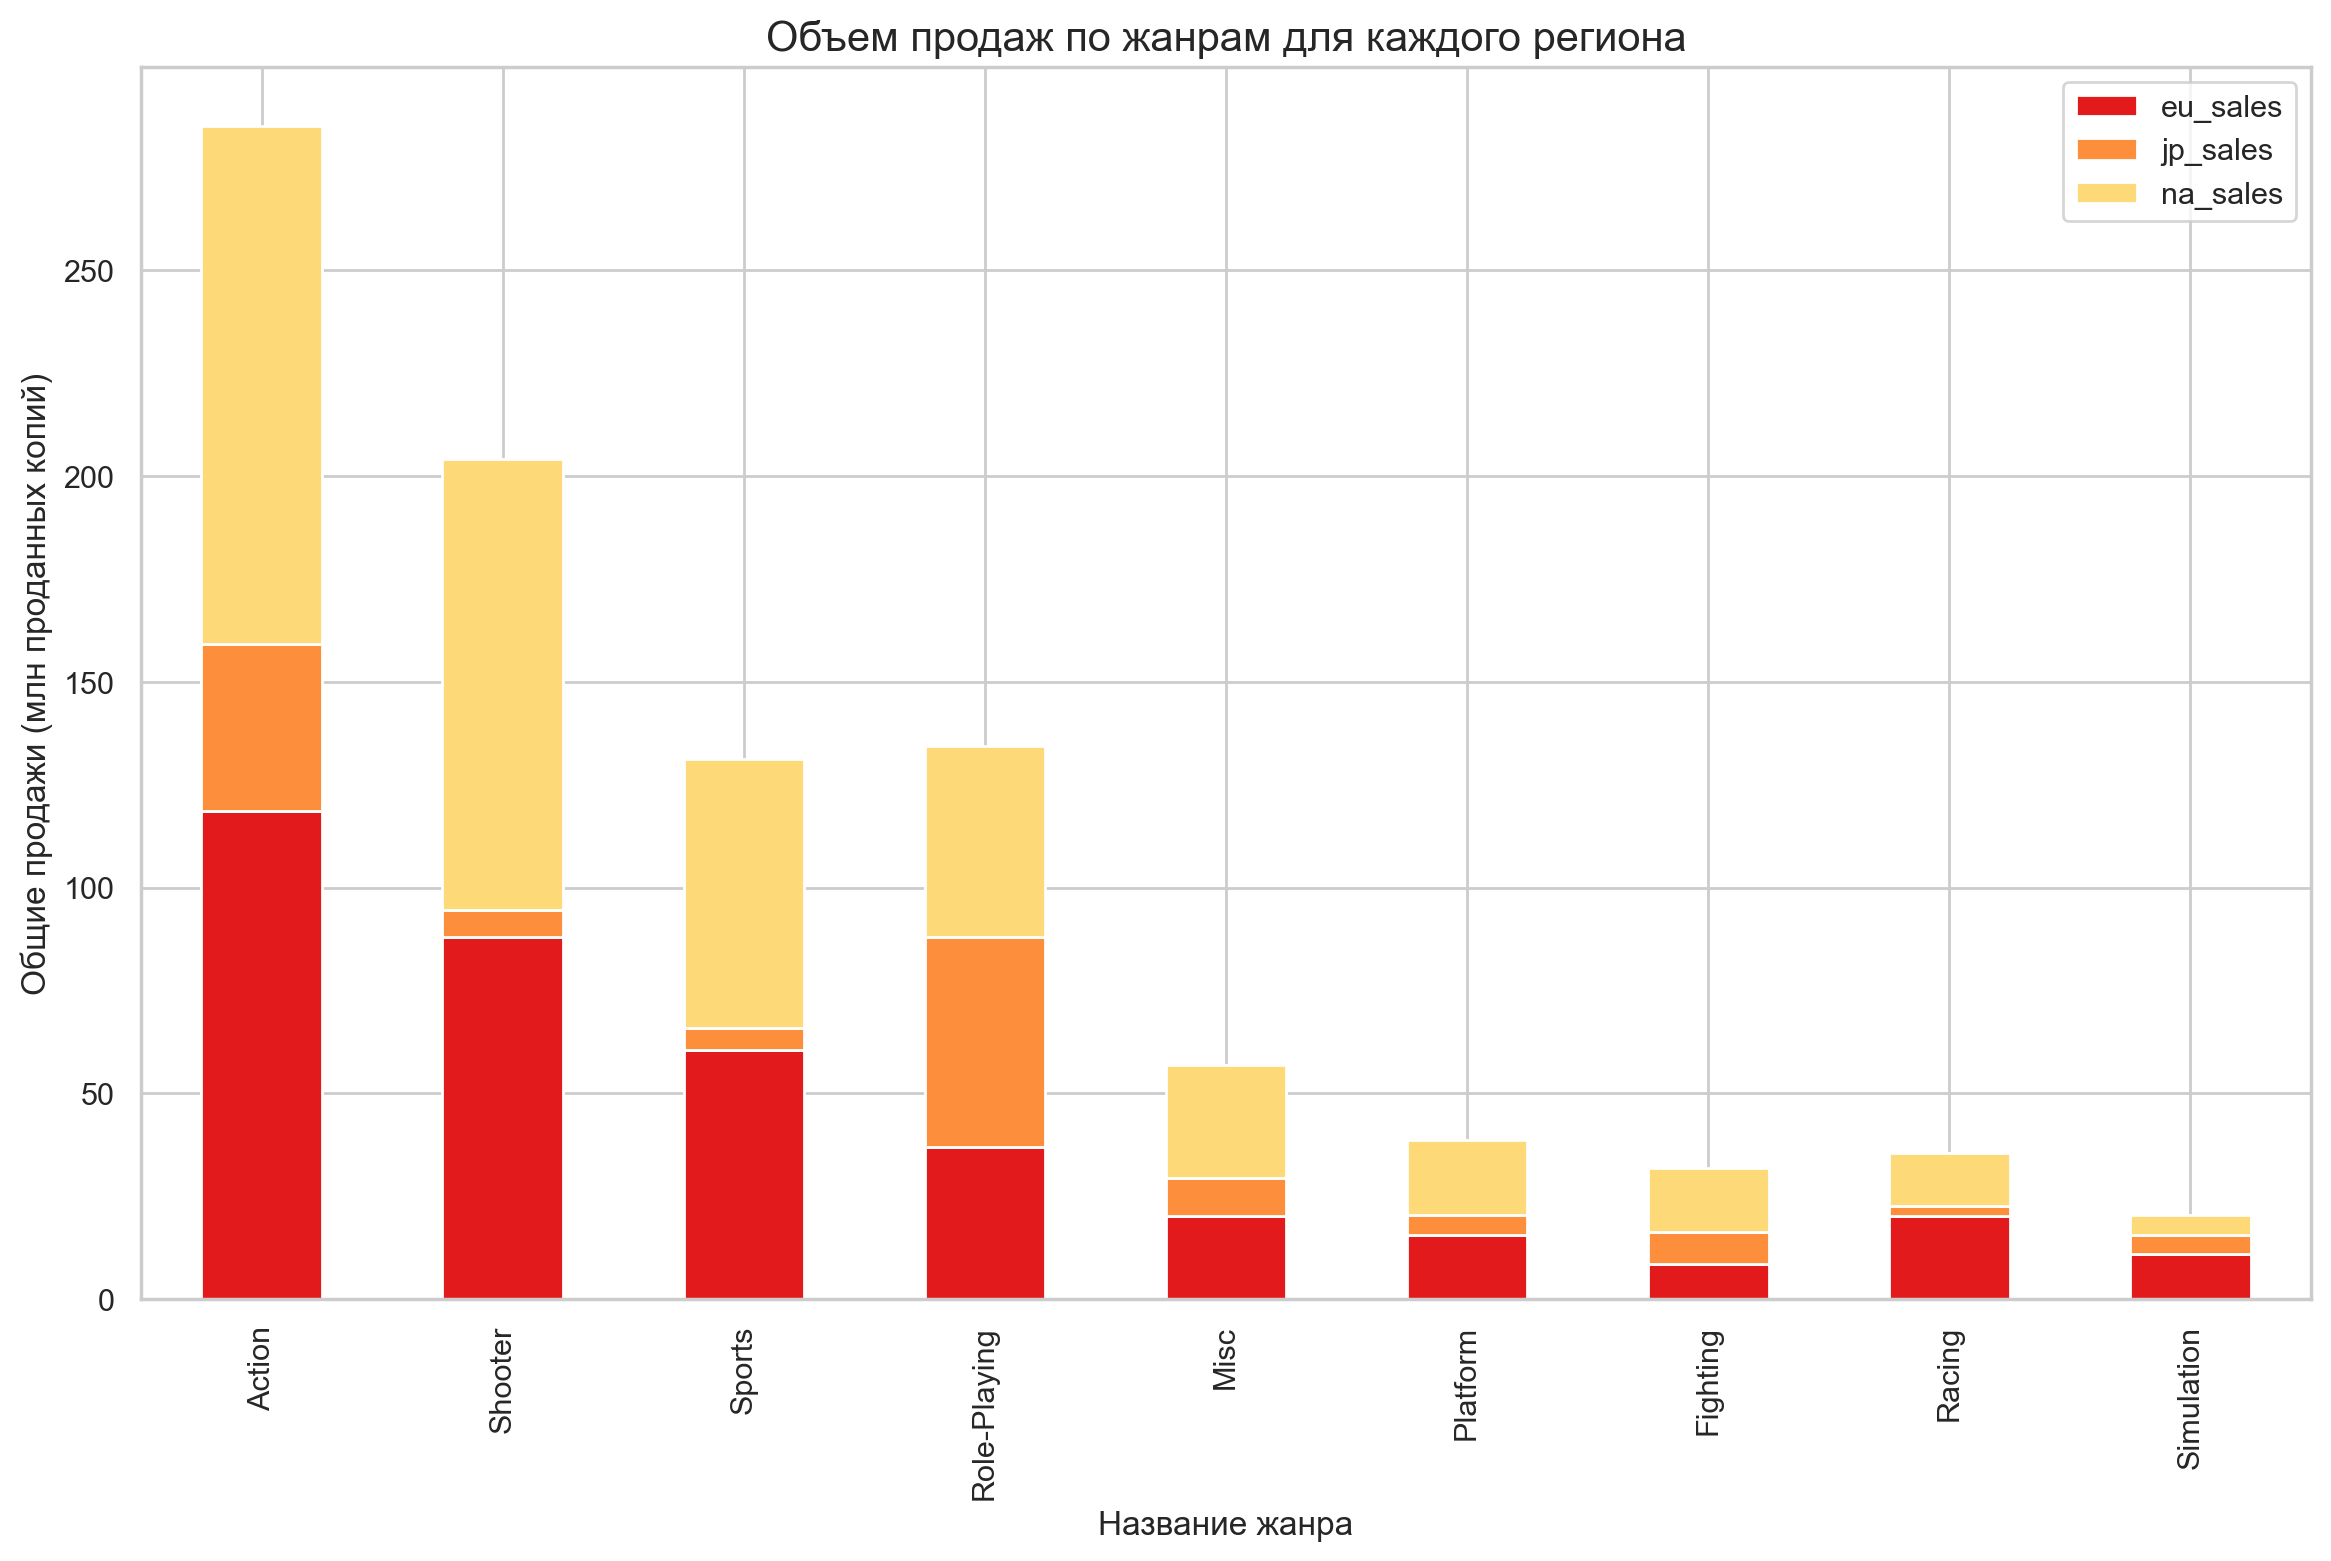

In [67]:
# построим распределение объема продаж каждого жанра по регионам
plt.figure(figsize=(16, 8))

data_by_region_genre.plot(kind='bar', x='genre', stacked=True, figsize=(14,8), 
                        color = sns.color_palette('YlOrRd_r', 3))

# добавим заголовок и подписи осей
plt.title("Объем продаж по жанрам для каждого региона", fontsize=15)
plt.xlabel("Название жанра", fontsize=12)
plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)
plt.show()

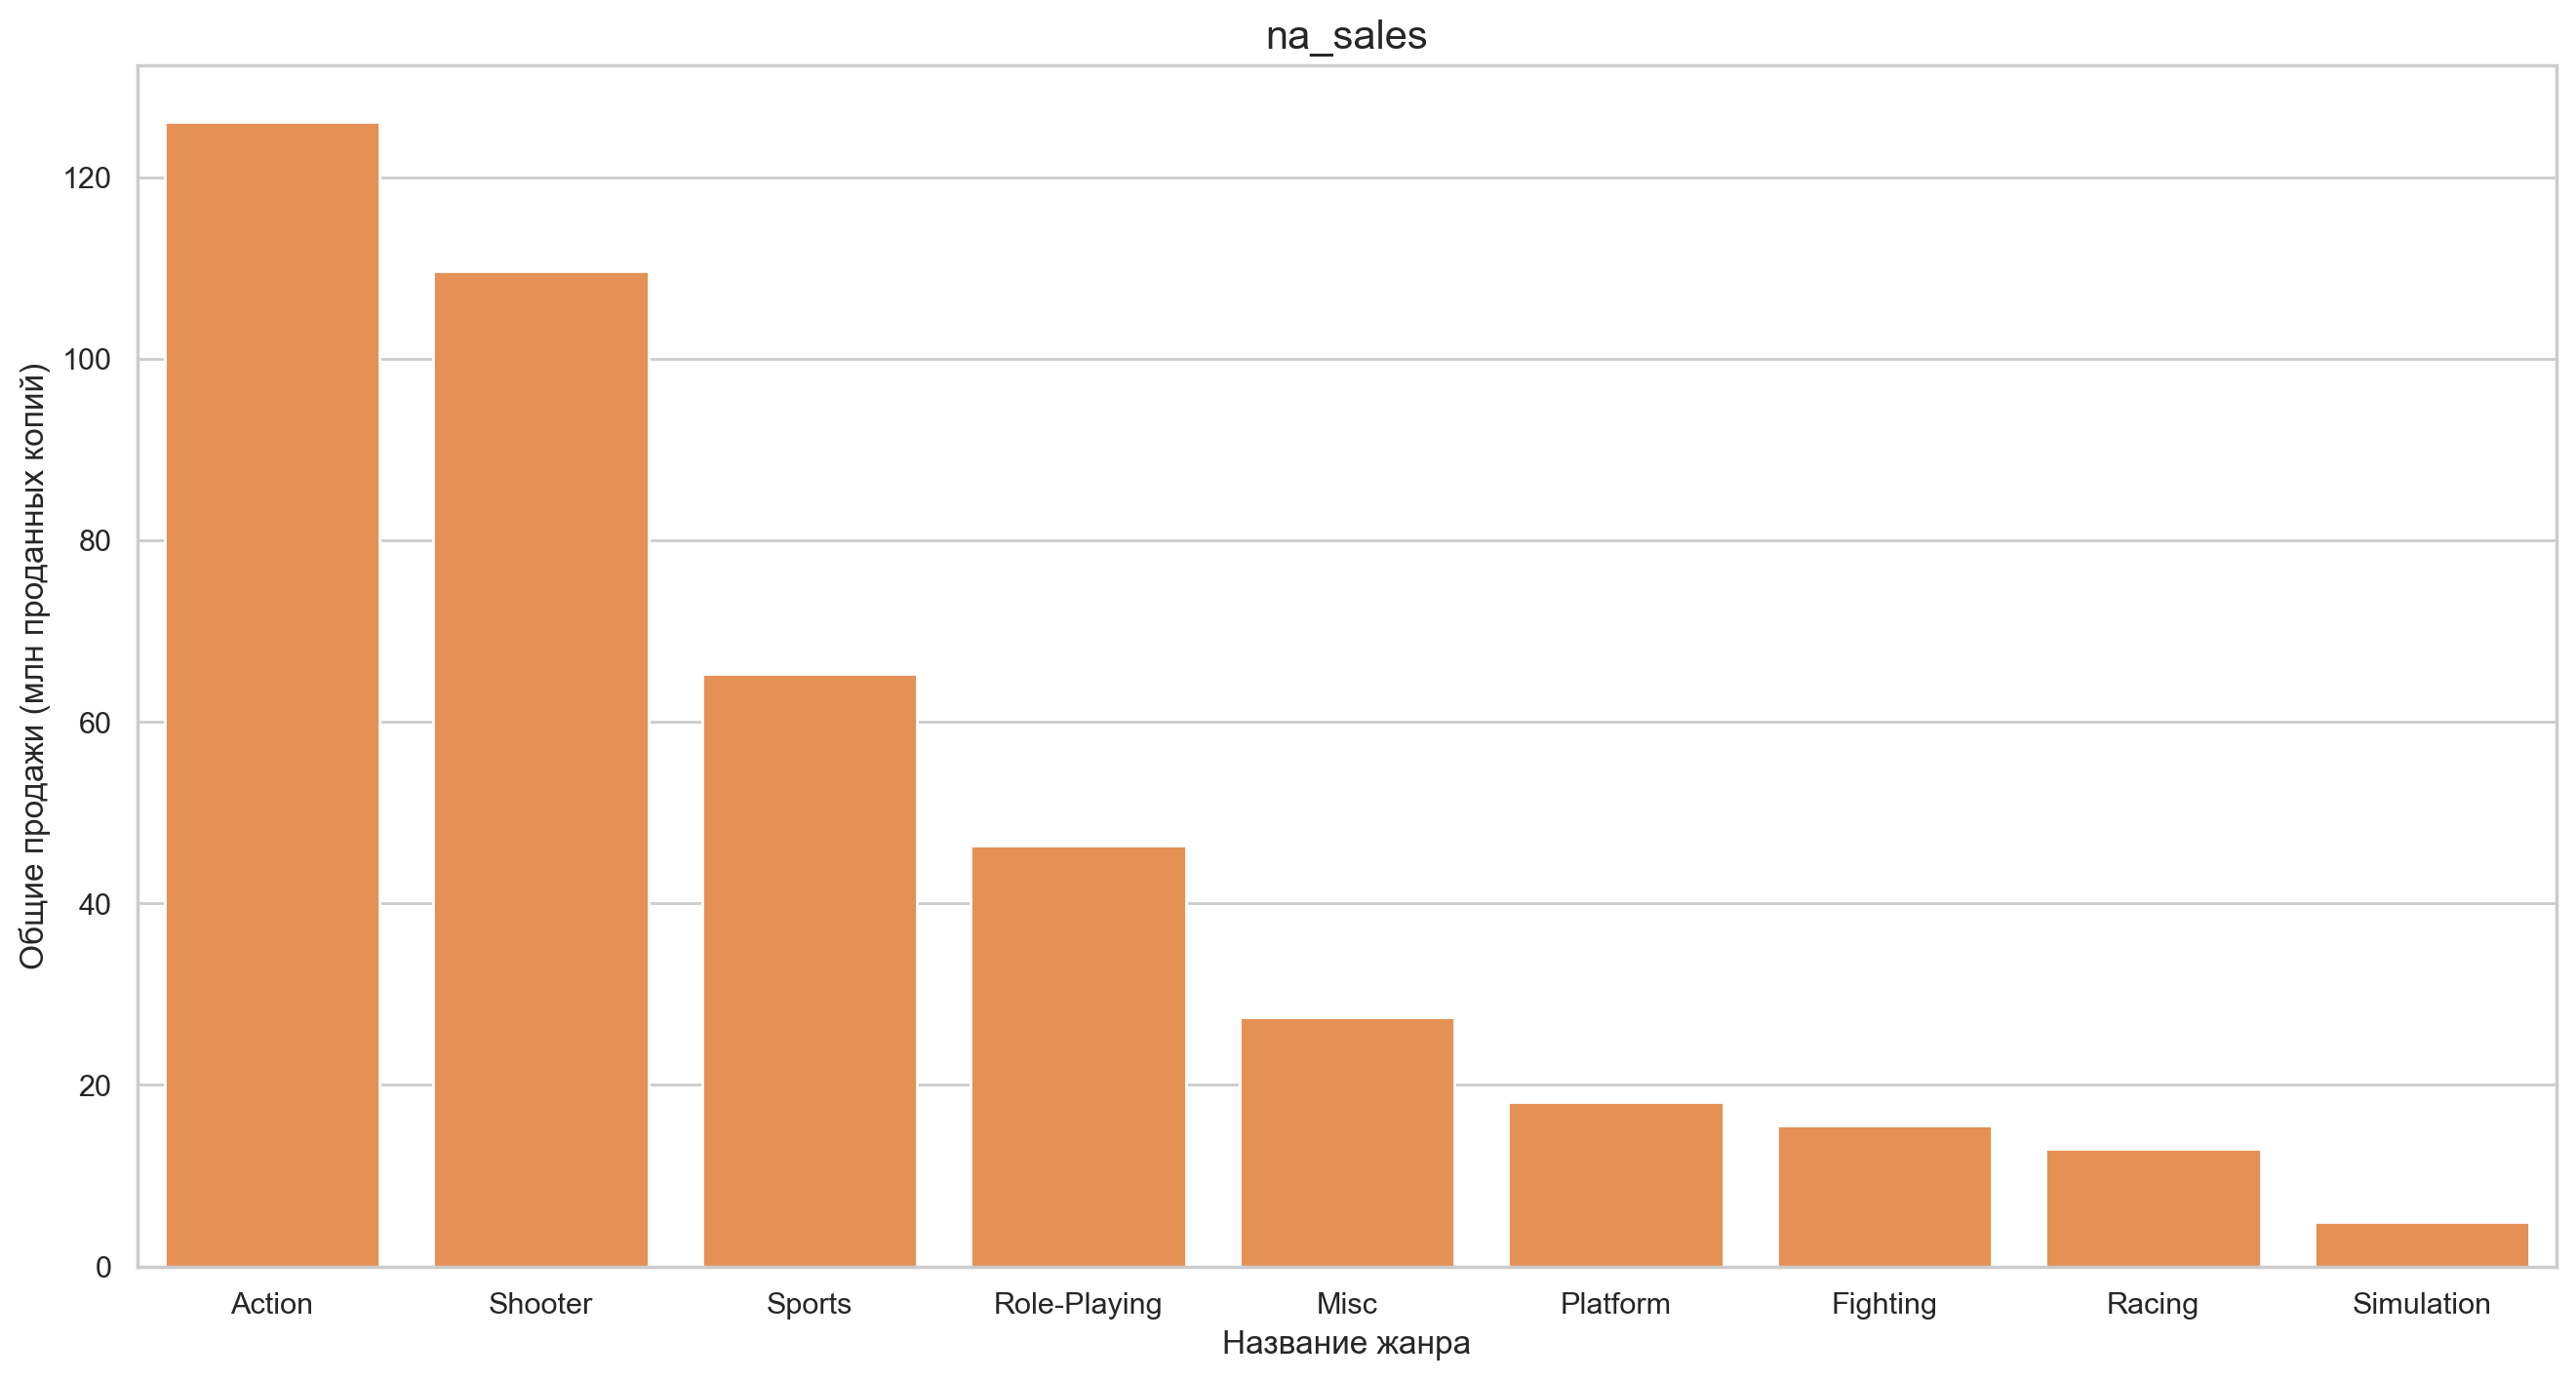

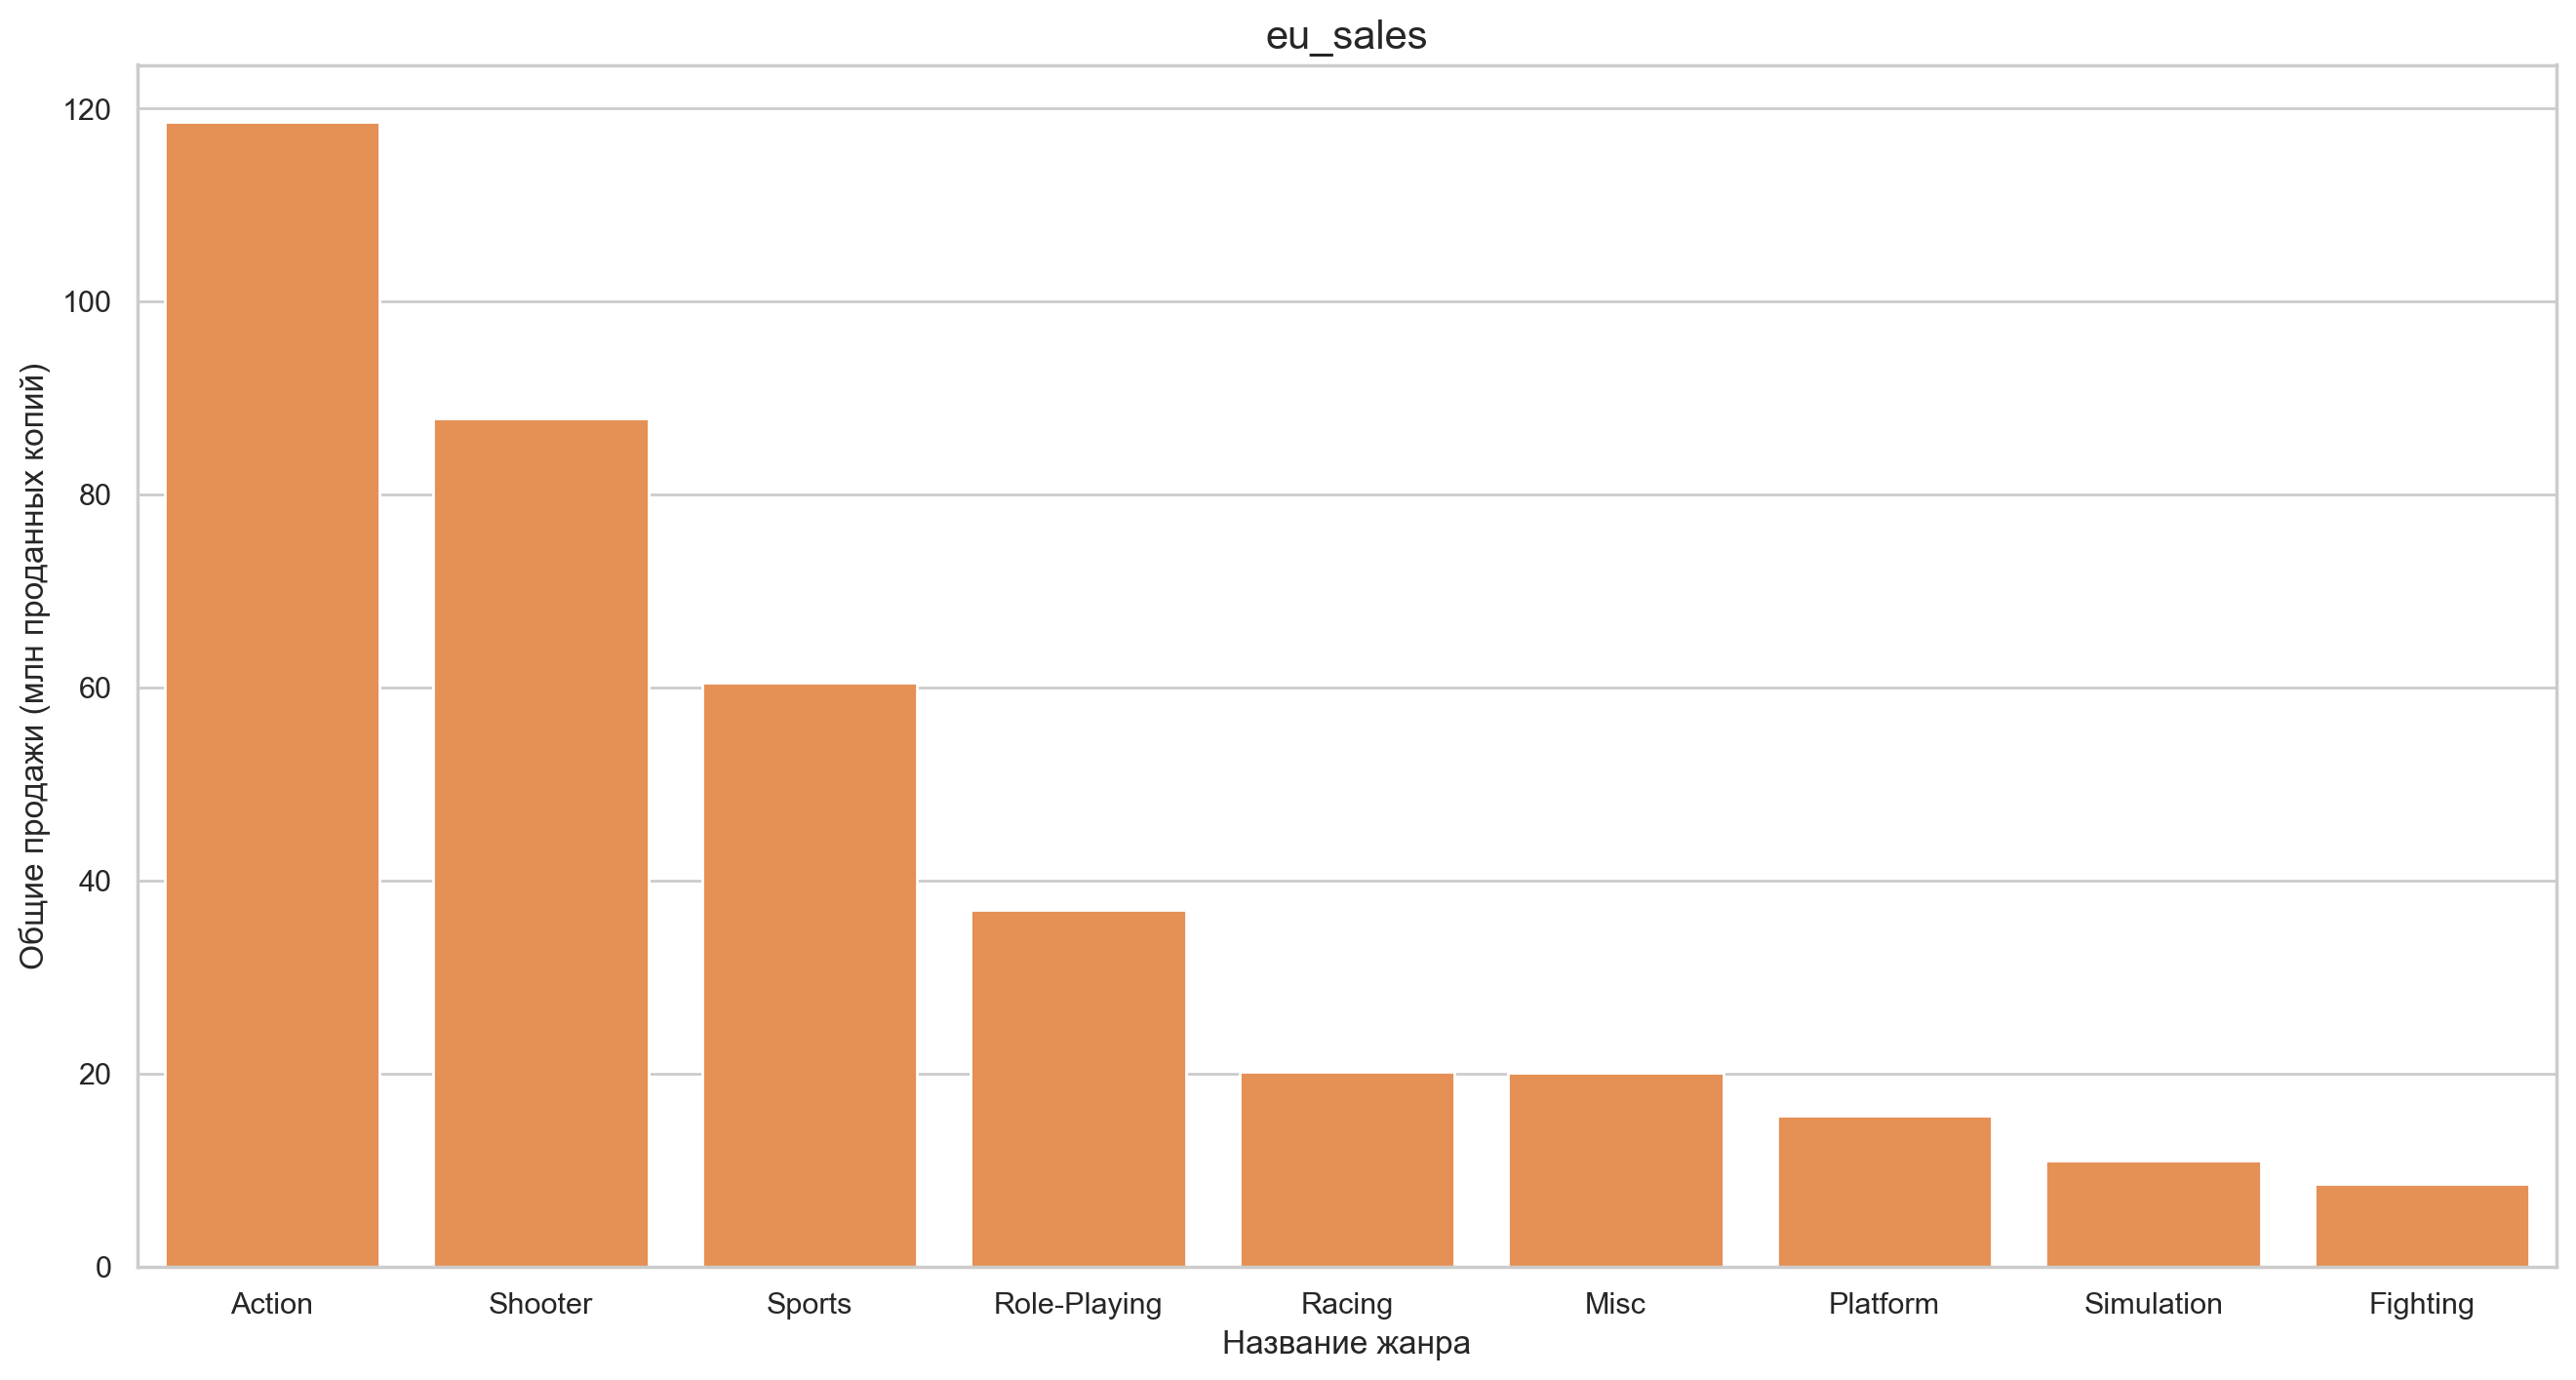

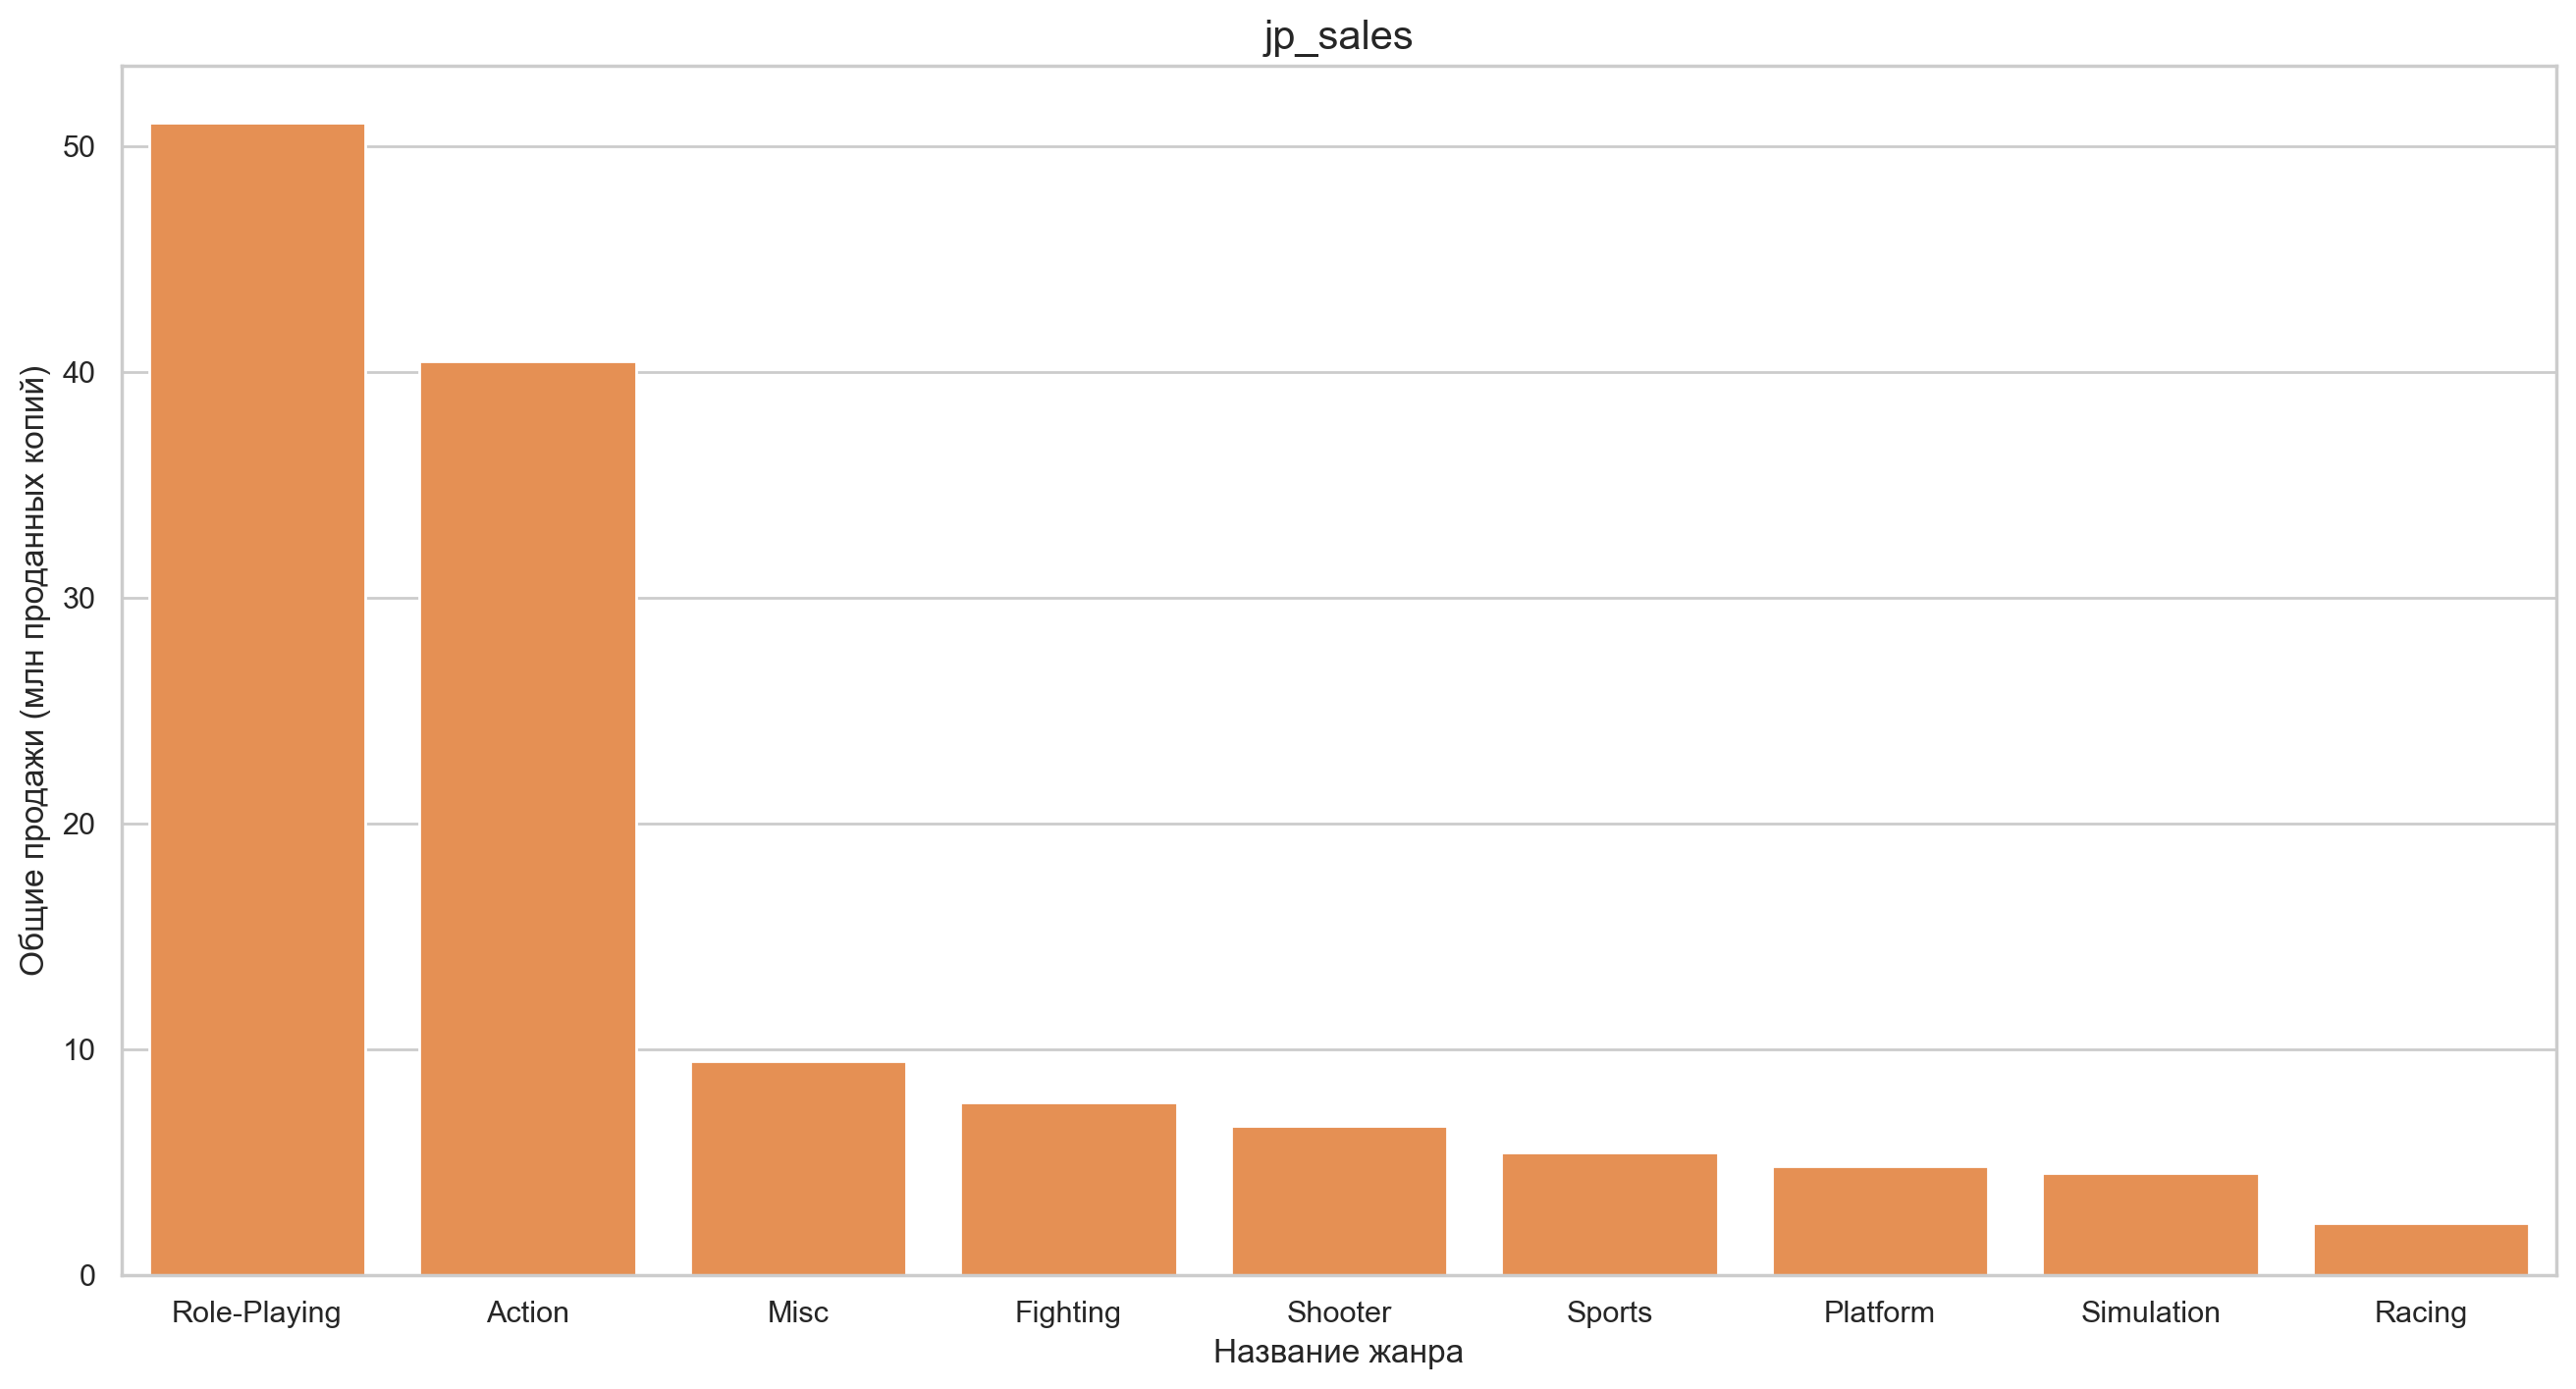

In [68]:
# построим отдельные распределения
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    plt.figure(figsize=(16, 8))
    data_by_region_genre = data_by_region_genre.sort_values(by=region, ascending=False)
    sns.barplot(x=data_by_region_genre['genre'], y=data_by_region_genre[region], 
                palette = sns.color_palette('YlOrRd', 1))
    plt.title(f"{region}", fontsize=15)
    plt.xlabel("Название жанра")
    plt.ylabel("Общие продажи (млн проданных копий)")
    plt.show()

**Вывод:**

1. Топ-5 популярных жанров для пользователей `Северной Америки`:
 - Action;
 - Shooter;
 - Sports;
 - Role-Playing;
 - Misc.


2. Топ-5 популярных жанров для пользователей `Европы`:
 - Action;
 - Shooter;
 - Sports;
 - Role-Playing;
 - Racing.


3. Топ-5 популярных жанров для пользователей `Японии`:
 - Role-Playing;
 - Action;
 - Misc;
 - Fighting;
 - Shooter.

Предпочтения по жанрам для пользователей Северной Америки и Европы снова схожи. Если Европа и Америка предпочитает экшены и шутеры, то Япония отдает меньшее предпочтение первому, а второму в разы меньше. Тем временем в РПГ игры японцы играют гораздо чаще, чем европейцы или американцы.

### Анализ влияния рейтинга  ESRB на продажи в отдельном регионе

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [70]:
# посмотрим какие уникальные значения рейтинга есть
data['rating'].unique().tolist()

['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

In [71]:
# добавим колонку с пояснением рейтинга
ESRB_dict = {'E': 'Для всех',
             'EC': '> 6 лет', 
             'E10+': '> 10 лет', 
             'M': '> 17 лет', 
             'T': '> 13 лет', 
             'AO': 'Для взрослых', 
             'RP': 'Рейтинг обсуждается', 
             'undefined': 'Не определен'}
actual_data['esrb_description'] = actual_data['rating'].map(ESRB_dict)
actual_data.sample(5)

name platform  \
3072                       Ratchet & Clank: Into the Nexus      PS3   
9803                      One Piece: Super Grand Battle! X      3DS   
10120                            Valkyrie Drive: Bhikkhuni      PSV   
1238                                      Puzzle & Dragons      3DS   
9464   Assassination Classroom: Grand Siege on Kuro-sensei      3DS   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
3072              2013       Shooter      0.30      0.25      0.00   
9803              2014      Fighting      0.00      0.00      0.12   
10120             2015        Action      0.00      0.03      0.07   
1238              2013  Role-Playing      0.00      0.00      1.51   
9464              2015        Action      0.00      0.00      0.13   

       other_sales  critic_score  user_score     rating  total_sales  \
3072          0.10           NaN         NaN  undefined         0.65   
9803          0.00           NaN         NaN  undefined         0.12   
10120         0.01         72.00        8.50          M         0.11   
1238          0.00           NaN         NaN  undefined         1.51   
9464          0.00           NaN         NaN  undefined         0.13   

      esrb_description  
3072      Не определен  
9803      Не определен  
10120         > 17 лет  
1238      Не определен  
9464      Не определен

In [72]:
# создадим сводную таблицу по рейтингу для пользователей каждого региона
data_by_region_esrb = actual_data.pivot_table(
    index='esrb_description', 
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').sort_values(by='na_sales', ascending=False)

data_by_region_esrb = data_by_region_esrb.reset_index().rename_axis(None, axis=1)

data_by_region_esrb.head()

esrb_description  eu_sales  jp_sales  na_sales
0         > 17 лет    145.80     14.11    165.29
1     Не определен     78.91     85.29     89.42
2         Для всех     83.36     15.14     79.05
3         > 10 лет     42.69      5.89     54.24
4         > 13 лет     41.95     20.59     49.79

<Figure size 3200x1600 with 0 Axes>

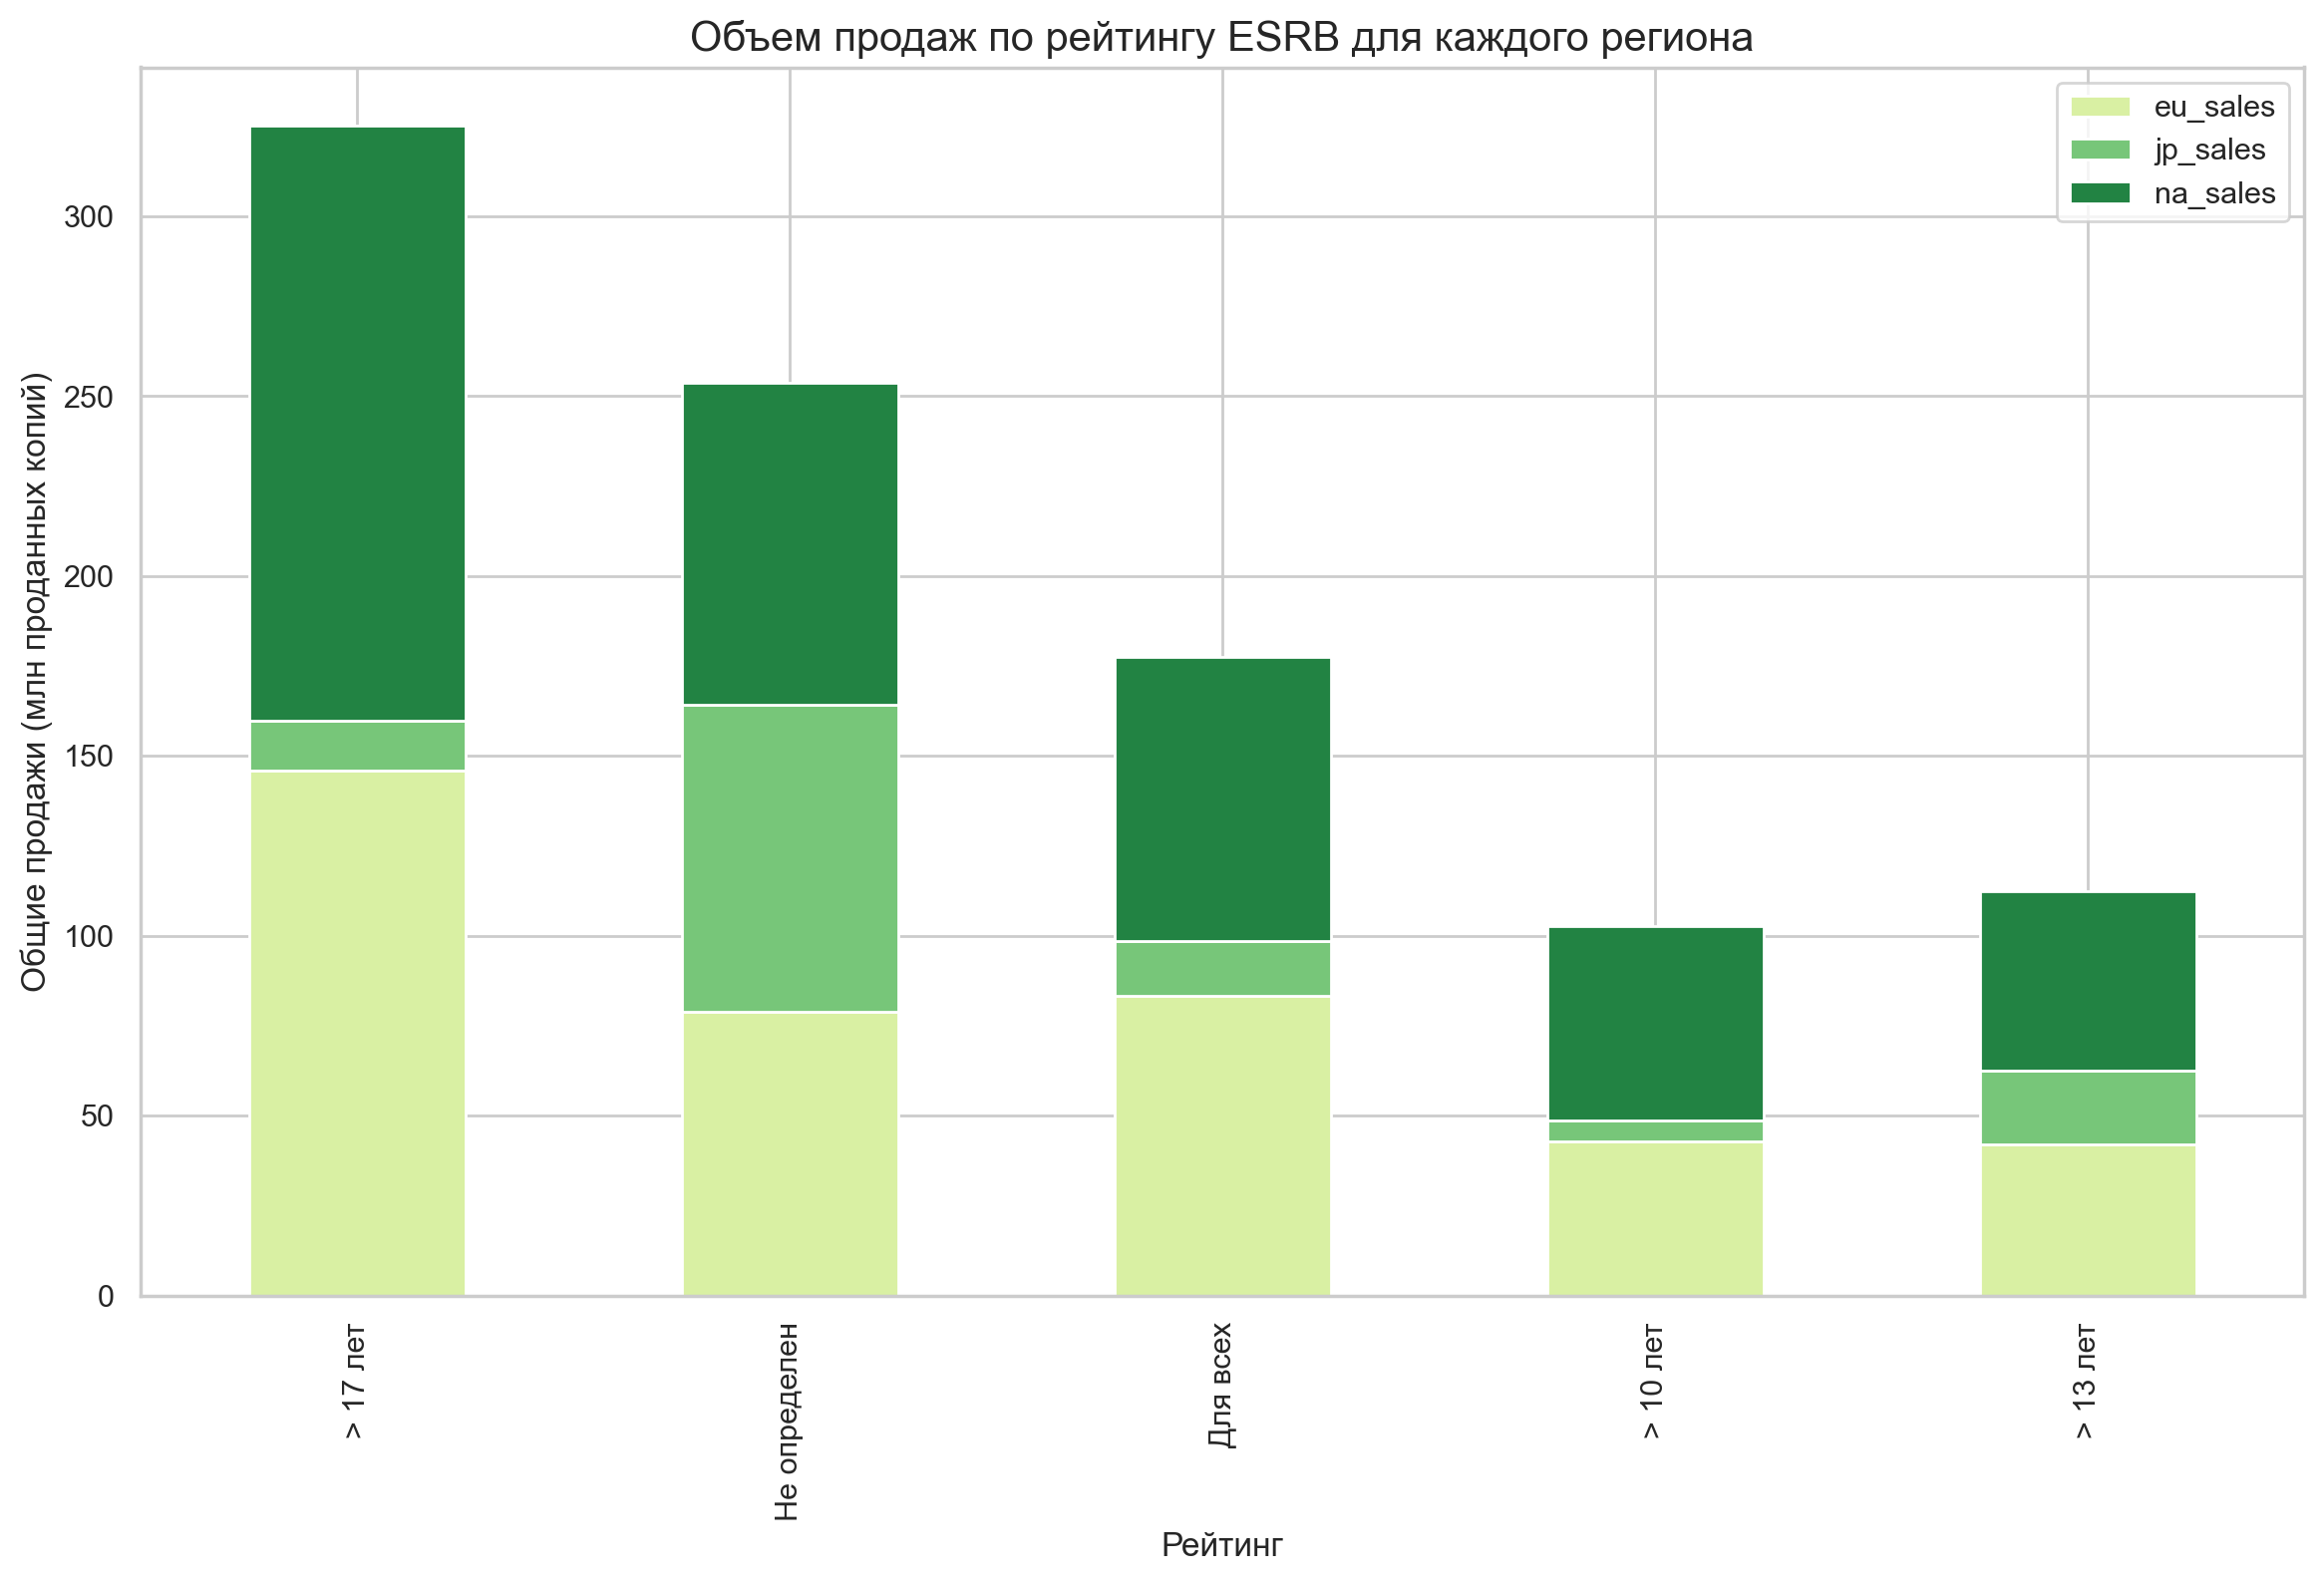

In [73]:
# построим распределение объема продаж каждого рейтинга по регионам
plt.figure(figsize=(16, 8))

data_by_region_esrb.plot(kind='bar', x='esrb_description', stacked=True, figsize=(14,8), 
                        color = sns.color_palette('YlGn', 3))

# добавим заголовок и подписи осей
plt.title("Объем продаж по рейтингу ESRB для каждого региона", fontsize=15)
plt.xlabel("Рейтинг", fontsize=12)
plt.ylabel("Общие продажи (млн проданных копий)", fontsize=12)
plt.show()

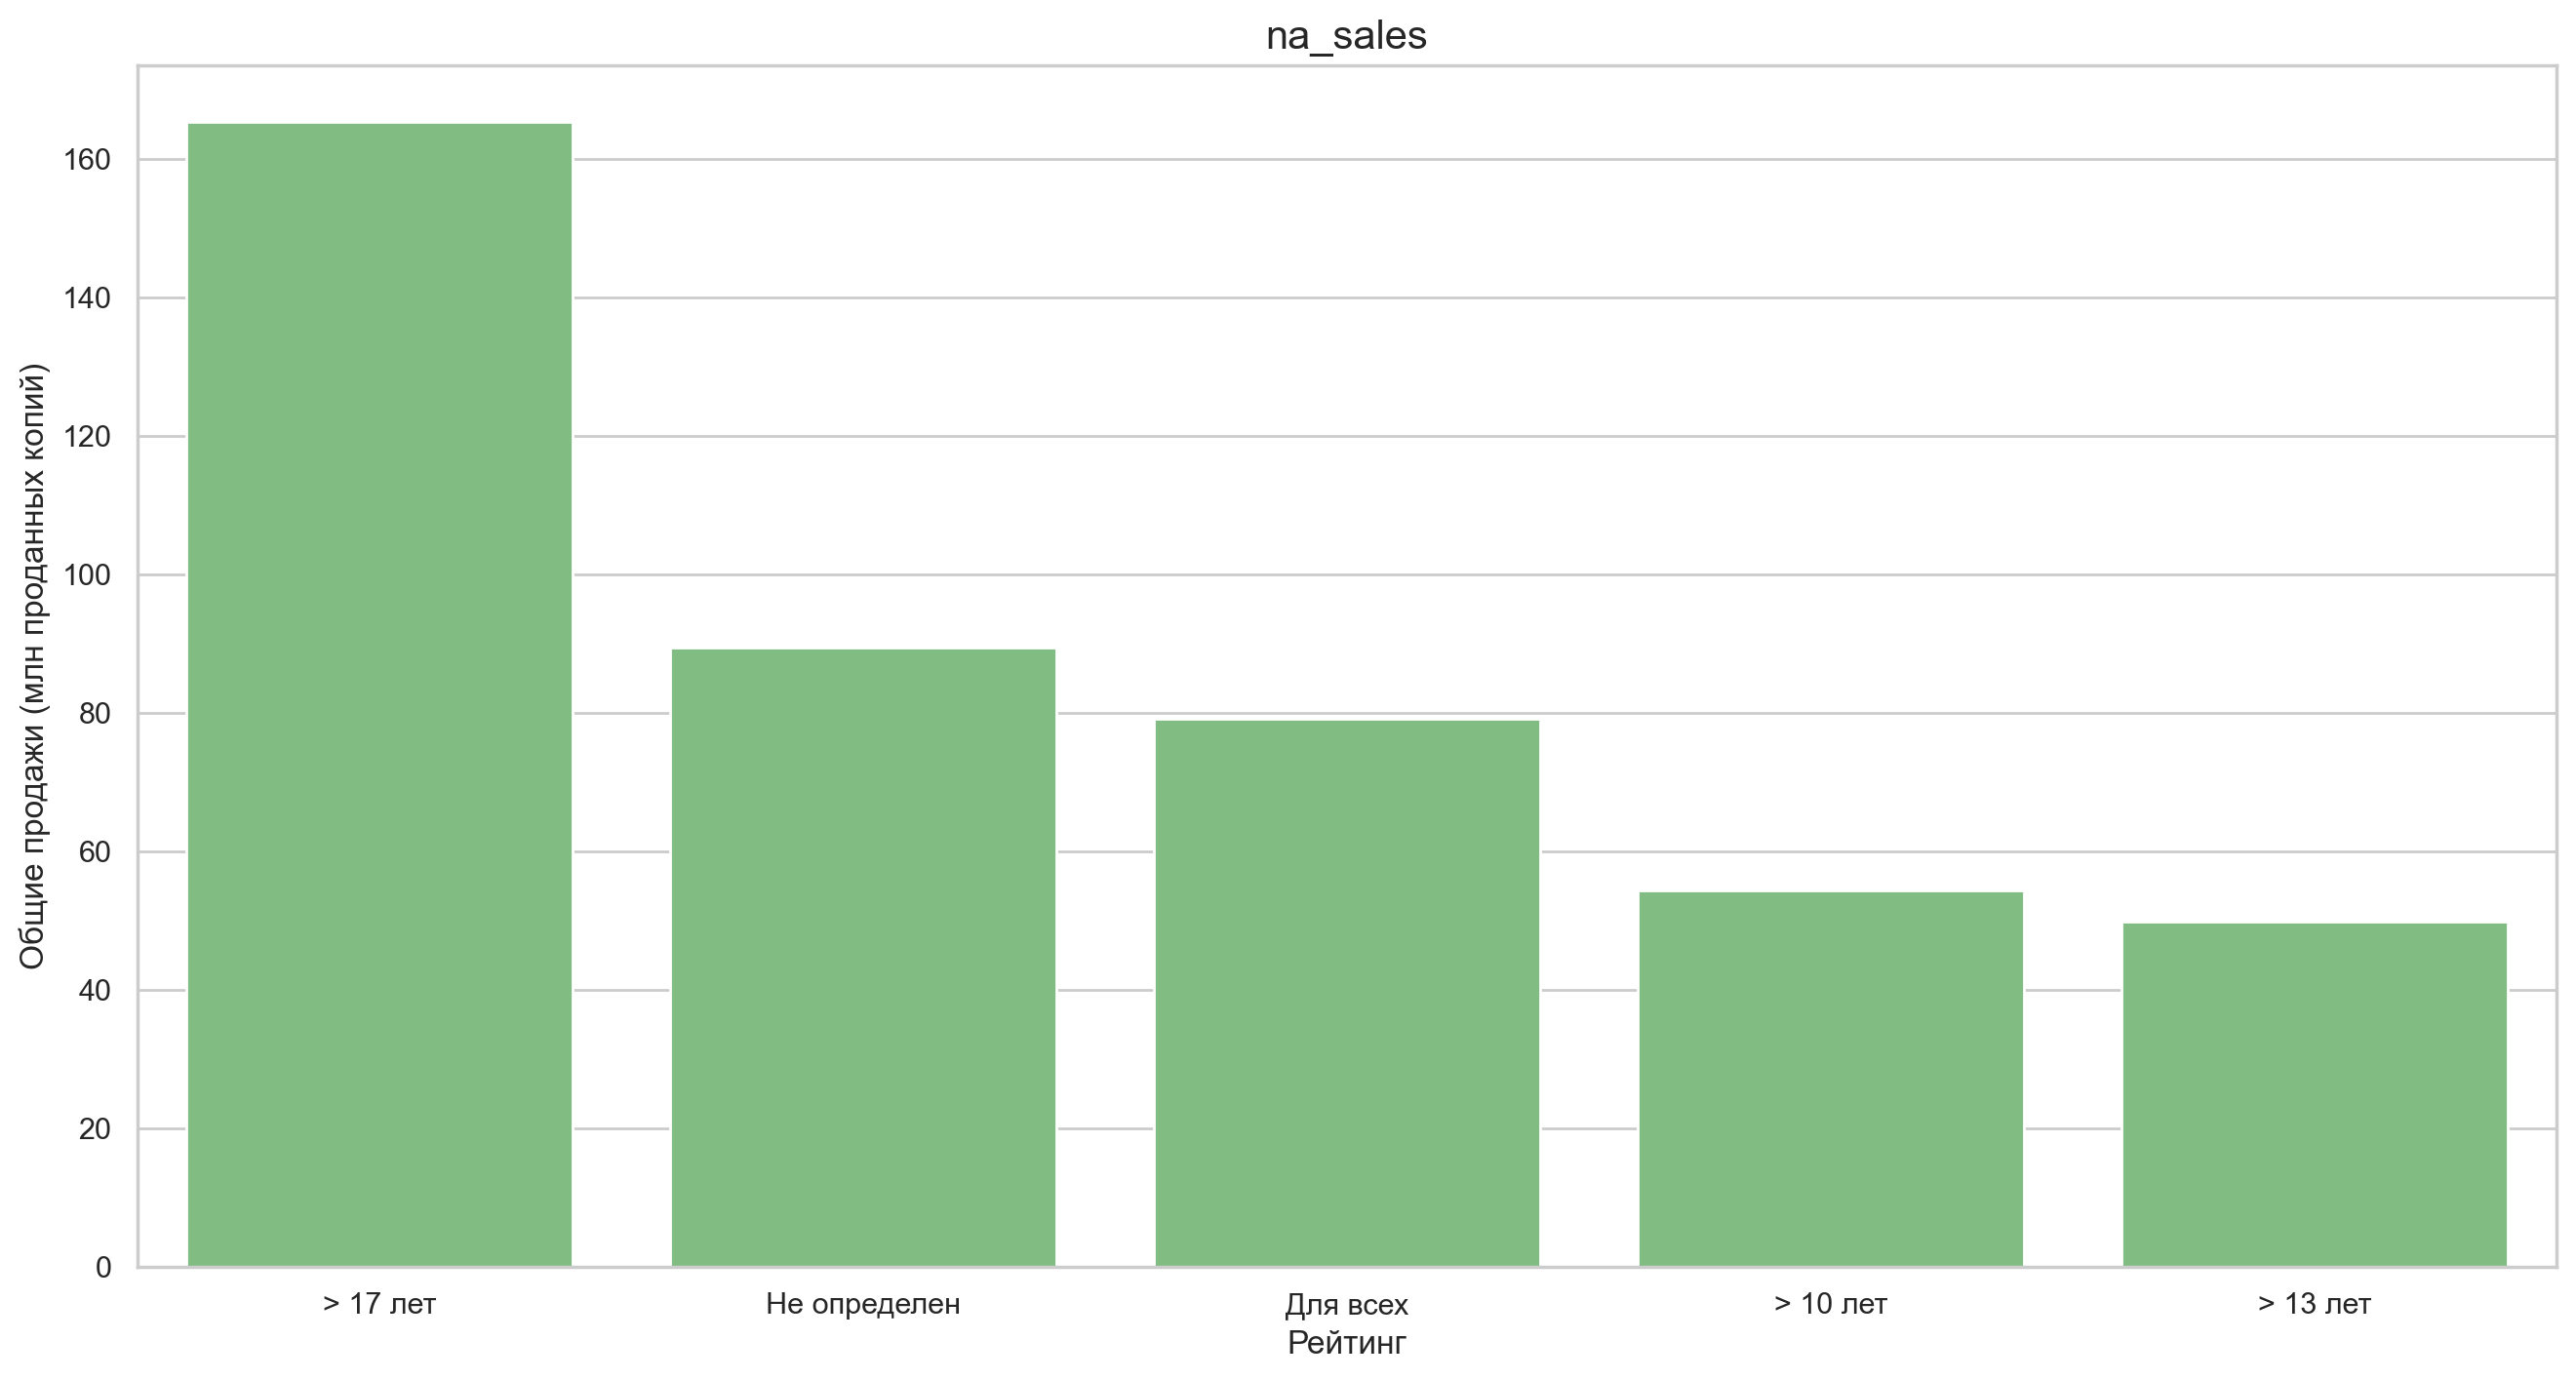

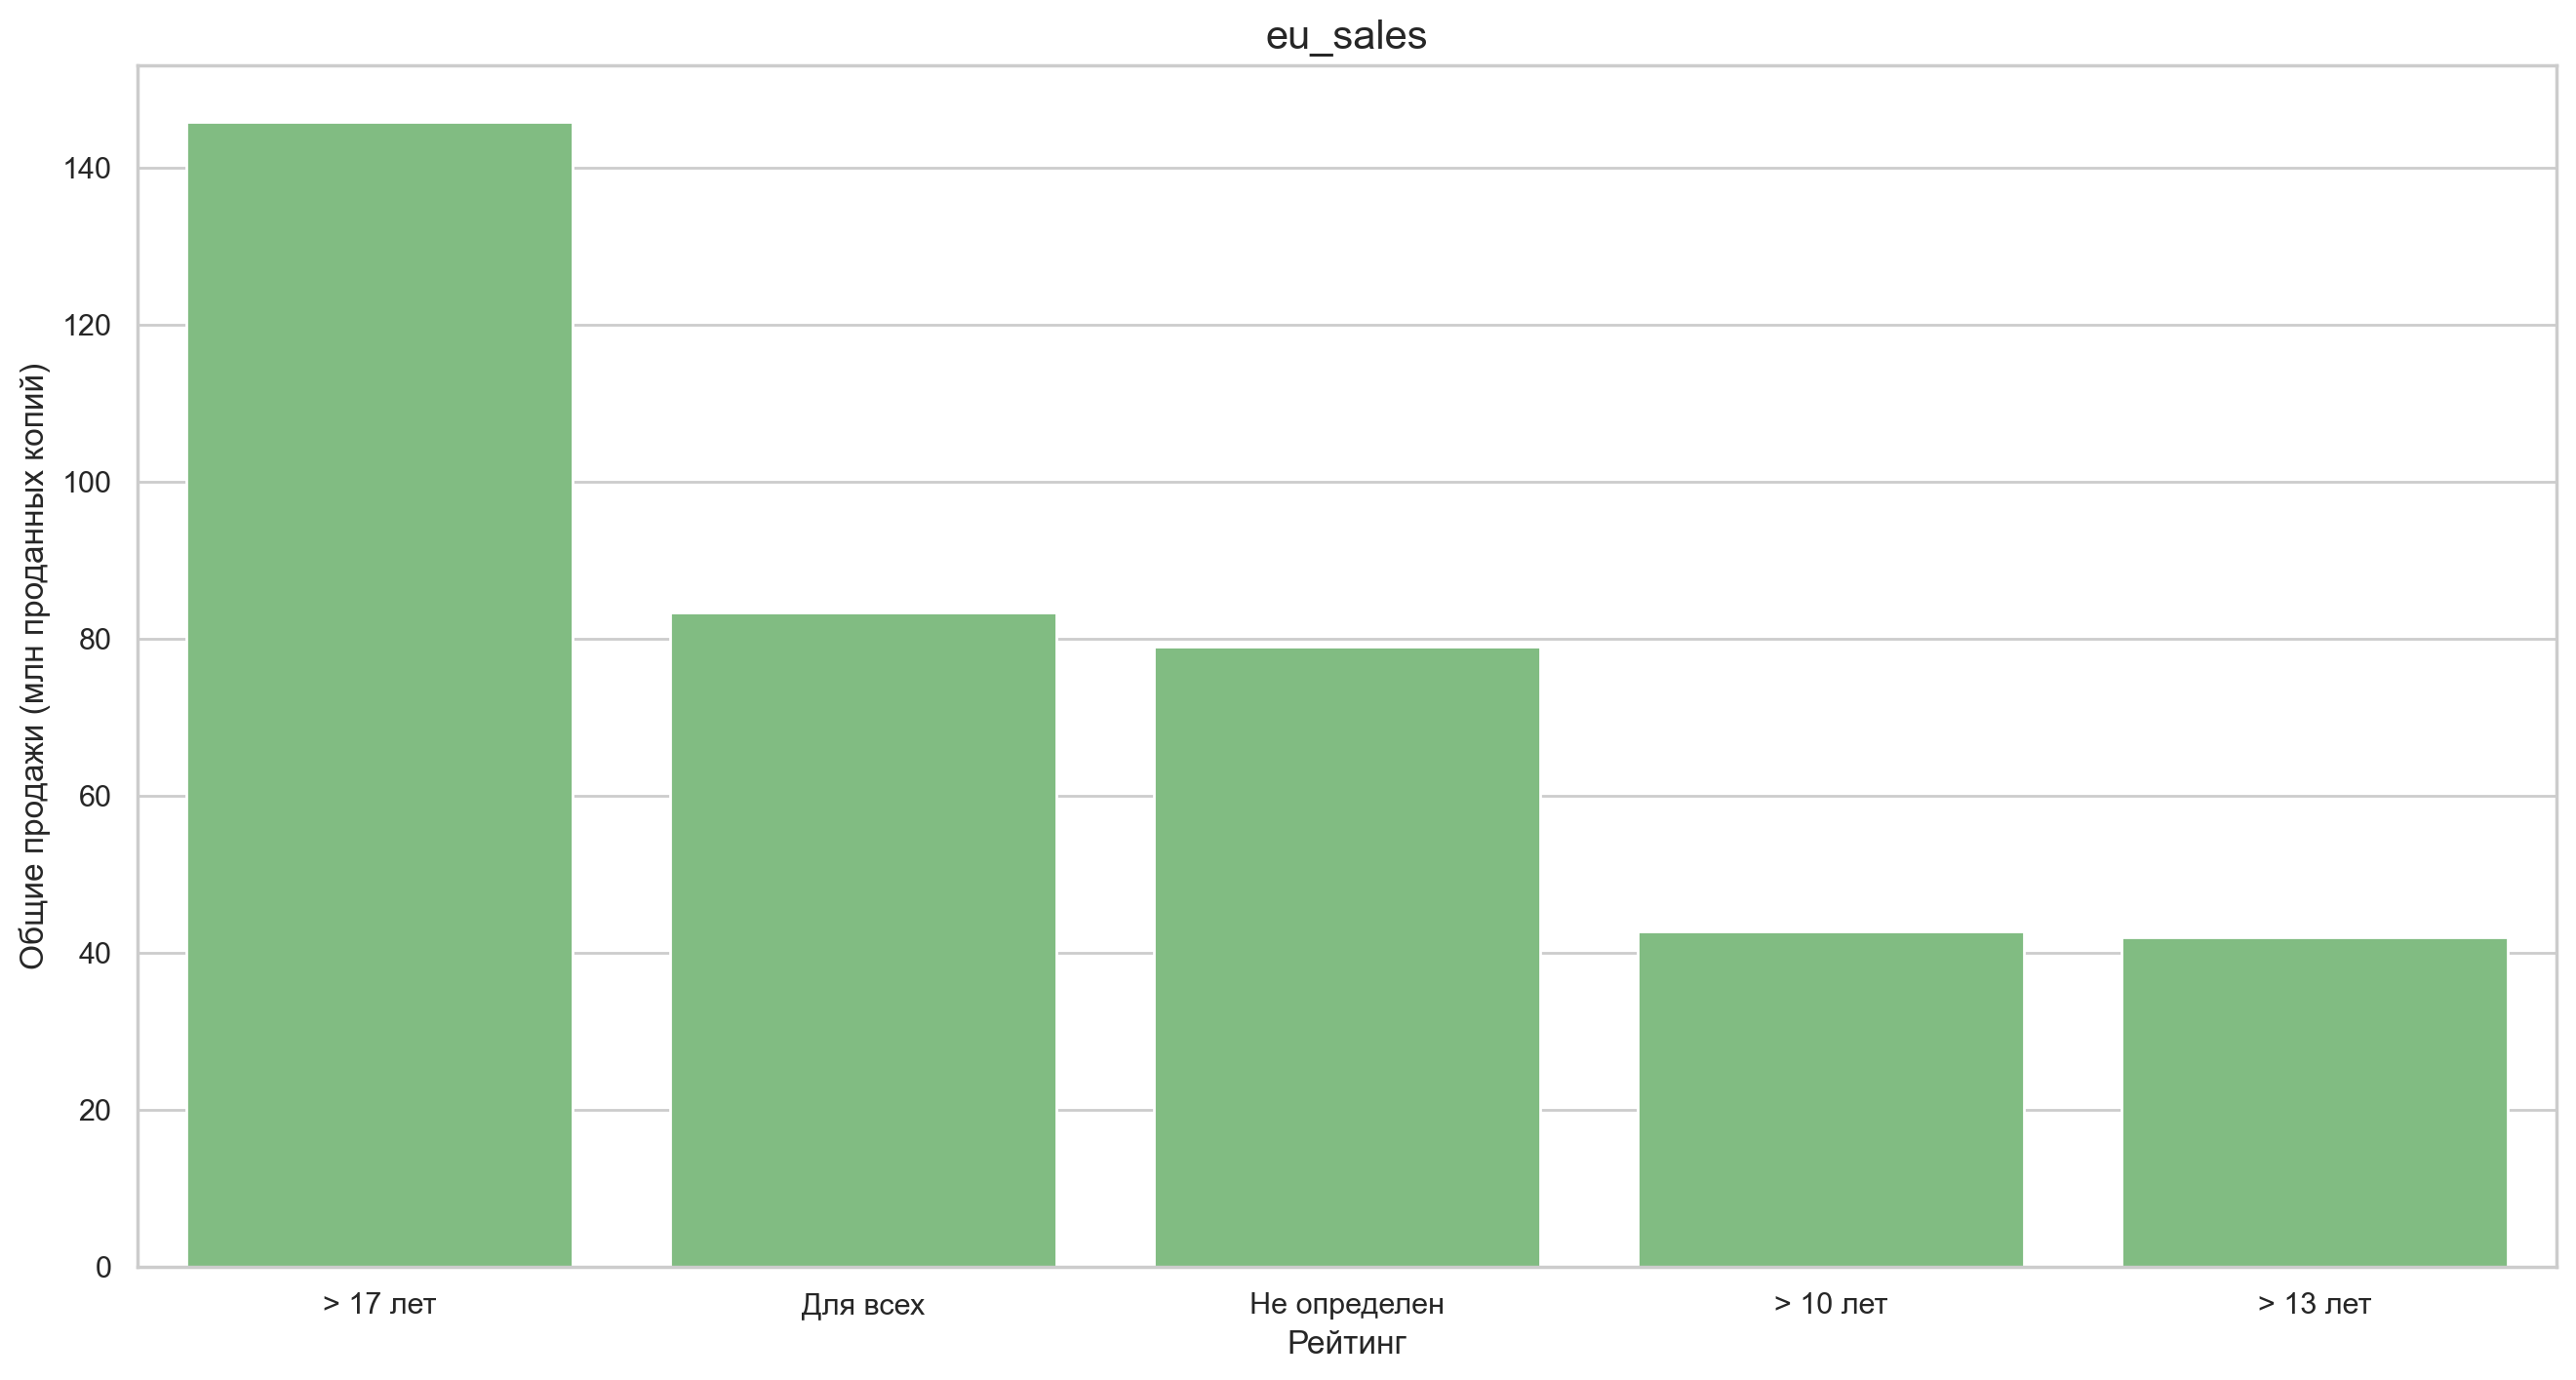

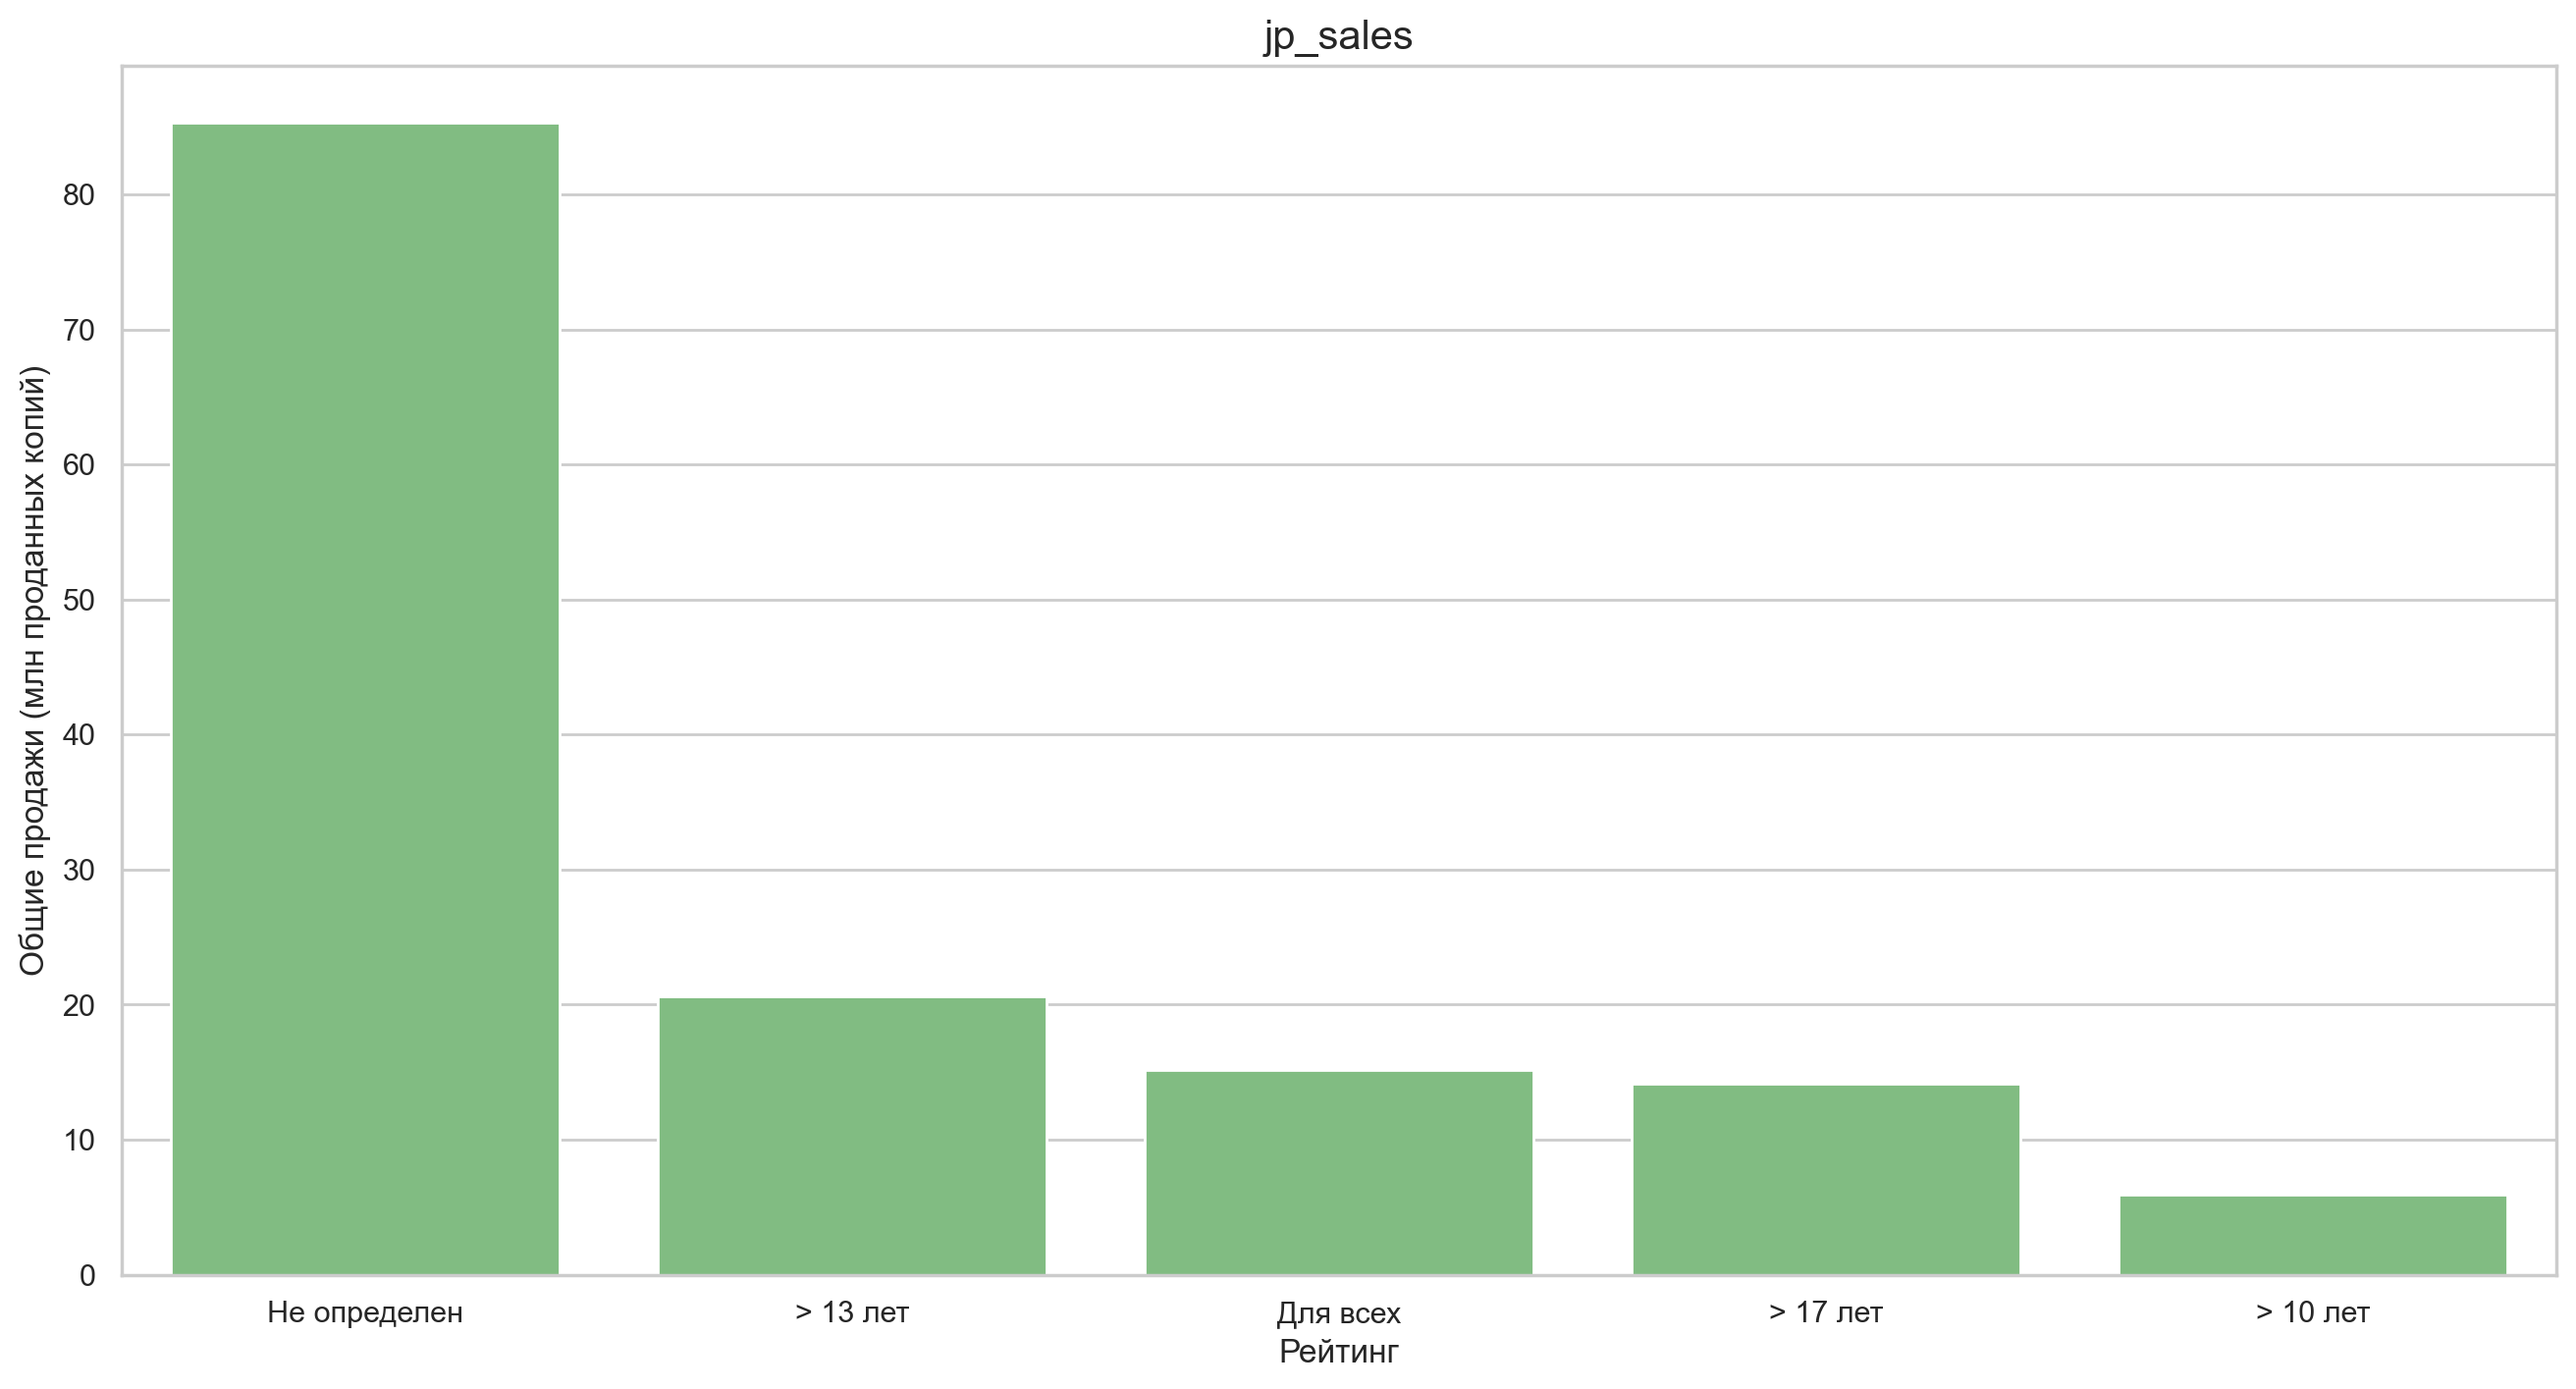

In [74]:
# построим отдельные распределения
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    plt.figure(figsize=(16, 8))
    data_by_region_esrb = data_by_region_esrb.sort_values(by=region, ascending=False)
    sns.barplot(x=data_by_region_esrb['esrb_description'], y=data_by_region_esrb[region], 
                palette = sns.color_palette('YlGn', 1))
    plt.title(f"{region}", fontsize=15)
    plt.xlabel("Рейтинг")
    plt.ylabel("Общие продажи (млн проданных копий)")
    plt.show()

**Вывод:**

- Учитывая информацию о том, что рейтинг ESRB предназначен для маркировки игр, выпущенных в США и Канаде, по региону "Япония" можно сказать, что игроки предпочитают играть в игры, произведенные не в США или Канаде, а скорее всего выпущенные в самой Японии. Данные выводы основаны на том, что "undefined" значения преобладают на остальными. Из определённых категорий преобладает "Подросткам от 13 лет". Наименее популярной категорией из топа для Японии становятся игры, маркированные рейтингом "e10+" - Для всех старше 10 лет.


- Аудитория игроков из регионов Европы и Северной Америки предпочитают играть в более взрослые игры, нежели в Японии. Преобладающее большинство проектов в данных регионах выпускается с рейтингом "m" - От 17 лет. Также в отличии от азиатского региона, категория "t" - Подросткам 13—19 лет является наименее популярной в Европе и Северной Америке, если мы говорим о топ-5.


- В остальном картина в Европейском и Североамериканском регионах похожа, за исключением, что в Европе больше немного больше проектов с рейтингом "e" - Для всех, а в Америке - с неопределённым рейтингом, но разница между данными категориями небольшая, если смотреть по графикам.

### Вывод "Анализ портрета пользователя каждого региона":

На этапе анализа портрета пользователя каждого региона по данным за последние 4 года было выявлено:


1. **Северная Америка:** Самые популярные игровые платформы в Северной Америке это: PlayStation 4, Xbox One, Xbox 360, PlayStation 3 и Nintendo 3DS. Самые популярные жанры : Action, Shooter, Sports, Role-Playing, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "От 17 и выше", на втором месте игры с рейтингом "Не определен" и на третьем месте игры с рейтингом "Для всех".


2. **Европа:** Самые популярные игровые платформы в Европе это: PlayStation 4, PlayStation 3, Xbox One, Xbox 360 и Nintendo 3DS. Топ 5 жанров в Европе : Action, Shooter, Sports, Role-Playing, Racing. По рейтингам видно, что больше всего продаж у игр с рейтингом "От 17 и выше", на втором месте игры с рейтингом "Для всех" и на третьем месте игры с рейтингом "Не определен".


3. **Япония:** Самые популярные игровые платформы в Японии это: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4 и WiiU. Топ 5 жанров в Японии : Role-Playing, Action, Misc, Fighting, Shooter. По рейтингам видно, что больше всего продаж у игр с рейтингом "Не определен", на втором месте игры с рейтингом "От 13 и выше" и на третьем месте игры с рейтингом "Для всех".


4. Для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PlayStation 4 и с рейтингом от 17 и выше.


## Проверка гипотез 

Проверим две гипотезы:

1. Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные.

### Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [76]:
# сохраним в переменных xbox и pc соответствующие данные (актуальные данные за последние 4 года)
xone = actual_data[actual_data['platform']=='XOne']['user_score']
pc = actual_data[actual_data['platform']=='PC']['user_score']

In [77]:
# посчитаем средний рейтинг пользователя для xbox и PC платформ
print('Средняя оценка пользователя для платформы Xbox One', xone.mean());
print('Средняя оценка пользователя для платформы PC', pc.mean());

Средняя оценка пользователя для платформы Xbox One 6.521428571428572
Средняя оценка пользователя для платформы PC 6.280379746835442


In [78]:
# посчитаем дисперсии выборок
print('Дисперсия выборки пользователя для xbox платформ', np.var(xone))
print('Дисперсия выборки пользователя для pc платформ', np.var(pc))

Дисперсия выборки пользователя для xbox платформ 1.8965188383045533
Дисперсия выборки пользователя для pc платформ 2.9913239064252517


In [79]:
# применим двусторонний t-тест Стьюдента
alpha = .01
results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

- Значение p-value равно чуть больше 16%. Таким образом, не получилось опровергнуть Нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One.

### Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ жанров Action и Sports различаются.

In [80]:
# сохраним в переменных action и sports соответствующие данные (актуальные данные за последние 4 года)
action = actual_data[actual_data['genre']=='Action']['user_score']
sports = actual_data[actual_data['genre']=='Sports']['user_score']

In [81]:
# посчитаем средний рейтинг пользователя для двух жанров
print('Средняя оценка пользователя для жанра Action', action.mean());
print('Средняя оценка пользователя для жанра Sports', sports.mean());

Средняя оценка пользователя для жанра Action 6.8374999999999995
Средняя оценка пользователя для жанра Sports 5.238124999999999


In [82]:
# посчитаем дисперсии выборок
print('Дисперсия выборки пользователя для xbox платформ', np.var(action))
print('Дисперсия выборки пользователя для pc платформ', np.var(sports))

Дисперсия выборки пользователя для xbox платформ 1.761935586734693
Дисперсия выборки пользователя для pc платформ 3.1607339843749975


In [83]:
# применим двусторонний t-тест Стьюдента
alpha = .01
results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


**Вывод:**

- Получив p-value, отвергаем Нулевую гипотезу в пользу альтернативной. Вероятность получить одинаковые средние рейнтинги по двум жанрам слишком мала.

### Вывод "Проверка гипотез": 

На этапе проверки гипотез по данным за последние 4 года был использован двусторонний t-тест Стьюдента:

- Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports.

## Общий вывод 

Цель настоящего исследования - **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Заказчик — интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Входные данные от магазина — исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

1. В нашем распоряжении были данные по 16715 игр, каждая из которых описывается 11 признаками (6 количественных, 4 категориальных и 1 временной).Данные с 1980 по 2015 год.


2. Перед началом исследования данные были подготовлены:
    - преобразованы типы некоторых данных;
    - обработаны пропущенные значения;
    - добавлен признак суммарных продаж игр во всех регионах.


3. На этапе исследовательского анализа данных было выявлено:

    - Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года включительно. С 2008 года, после массового создания мобильных приложений и мобильных игр, произошел резкий спад разработок консольных игр.
    - За весь период консольных приставок самые популярные оказались: PlayStation 2, XBOX 360, PlayStation 3, Nintendo Wii, DS и PlayStation. 
    - Средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. 
    - У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. 
    - Стабильно высокие продажи приносят игры жанров 'Shooter', 'Platform' и 'Sports'. Хуже всего продаются игры жанра 'Adventure'.


4. Для каждого региона был составлен портрет потенциального пользователя за актуальный период (последние 4 года):

    - Северная Америка: Самые популярные игровые платформы в Северной Америке это: PlayStation 4, Xbox One, Xbox 360, PlayStation 3 и Nintendo 3DS. Самые популярные жанры : Action, Shooter, Sports, Role-Playing, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "От 17 и выше", на втором месте игры с рейтингом "Не определен" и на третьем месте игры с рейтингом "Для всех".
    - Европа: Самые популярные игровые платформы в Европе это: PlayStation 4, PlayStation 3, Xbox One, Xbox 360 и Nintendo 3DS. Топ 5 жанров в Европе : Action, Shooter, Sports, Role-Playing, Racing. По рейтингам видно, что больше всего продаж у игр с рейтингом "От 17 и выше", на втором месте игры с рейтингом "Для всех" и на третьем месте игры с рейтингом "Не определен".
    - Япония: Самые популярные игровые платформы в Японии это: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4 и WiiU. Топ 5 жанров в Японии : Role-Playing, Action, Misc, Fighting, Shooter. По рейтингам видно, что больше всего продаж у игр с рейтингом "Не определен", на втором месте игры с рейтингом "От 13 и выше" и на третьем месте игры с рейтингом "Для всех".


5. Для прогноза будущих продаж лучше брать данные за последние 4 года, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года:

    - Большую часть прибыли будут приносить игры жанра Shooter, для платформ PlayStation 4 и Xbox One с рейтингом от 17 и выше в Европе и Северной Америке.
    - Также игры жанра Sports будут приносить высокую прибыль, учитывая платформу PlayStation 4 и рейтинг "Для всех".

**Таким образом предлагается использовать бюджет на рекламу платформы PlayStation 4 в жанрах Shooter и Sports, а также на рекламы платформы Xbox One в жанре Shooter. Из регионов стоит рассматривать Европу и Северную Америку.**